<br>

<br>
<center><font size='10' style="color:orange"><b> Customer Transaction Prediction </b> </font>

<br>

<br>
<center><font size='5' style="color:black"><b> Proyecto Final - Coder House </b> </font>

<br>
<br>

<center><font size='5' style="color:black"><b> Notebook Denise Navarro Quantín </b> </font>

<br>

<br>

<br>

<br>

<font size='6' style="color:orange"><b> Content </b> </font>
<a name="content"></a>
<br>


1. [Introduction](#introduction) 
<br>

2. [Import Libraries](#libraries) 
<br>

3. [Dataset](#Dataset) 
<br>

4. [Models - Default Parameters](#default)

    4.1 [Logistic Regression](#lgr_default)
    
    4.2 [GaussianNB](#gbn_default)
    
    4.3 [Random Forest Classifier](#rfc_default)
    
    4.4 [K Neighbors Classifier](#knc_default)

    4.5 [XGBoost Classifier](#xgb_default)

    4.6 [Catboost Classifier](#cb_default)

    4.7 [MLP Classifier](#mlp_default)

    4.8 [Linear Discriminant Analysis](#lda_default)

    4.9 [Calibrated Classifier with GaussianNB](#cccv_default)

    4.10 [SGD Classifier](#sgdc_default)
    
    4.11 [Bagging Classifier](#bgc_default)
    
    4.12 [Models with default parameters - Summary](#summary_default)

<br>

5. [Models - PCA](#PCA)

    5.1 [Logistic Regression - PCA](#lgr_pca)
    
    5.2 [K Neighbors Classifier - PCA](#knc_pca)

<br>

6. [Optuna](#optuna)

    6.1 [Logistic Regression - Optuna](#lgr_opt)
    
    6.1.1 [Logistic Regression - PCA 100](#lgr_opt_100)
    
    6.1.2 [Logistic Regression - PCA 175](#lgr_opt_175)
    
    6.1.3 [Logistic Regression - Full Dataset](#lgr_opt_full)
    
    6.2 [K Neighbors Classifier - Optuna](#knc_opt)

    6.1.2 [K Neighbors Classifier - PCA 175](#knc_opt_175)

<br>

7. [Model Stacking](#stacking)
    
    7.1 [GaussianNB x 3](#ensemble_2)
    
    7.2 [GaussianNB x 6](#ensemble_3)
    
    7.3 [GaussianNB x 12](#ensemble_4)
    
    7.4 [GaussianNB x 24](#ensemble_5)
    
    7.5 [GaussianNB + Logistic Regression (Final GaussianNB)](#ensemble_6)
    
    7.6 [Logistic Regression + GaussianNB (Final Logistic Regression)](#ensemble_7)
    
    7.7 [Logistic Regression + Catboost Classifier (Final Catboost Classifier)](#ensemble_8)
    
    7.8 [Logistic Regression + Catboost Classifier + GaussianNB (Final GaussianNB)](#ensemble_9)
  
    7.9 [Logistic Regression + Catboost Classifier (opt) + GaussianNB + K Neighbors Classifier (opt) (Final GaussianNB)](#ensemble_10)
    
    7.10 [GaussianNB + Logistict Regression + Calibrated Classifier CV (Final GaussianNB)](#ensemble_11)
    
    7.11 [GaussianNB + Linear Discriminant Analysis (Final GaussianNB)](#ensemble_12)
    
    7.12 [GaussianNB + Logistict Regression + Linear Discriminant Analysis (Final GaussianNB)](#ensemble_13)
    
    7.13 [GaussianNB + XGBoost Classifier + Logistic Regression (Final GaussianNB)](#ensemble_14)
    
    7.14 [GaussianNB X 6 + Linear Discriminant Analysis (Final GaussianNB)](#ensemble_15)
    
    7.15 [Model Stacking - Summary](#summary_stacking)



<br>

<br>

<br>

<br>

<font size='6' style="color:orange">  <b> Introduction </b> </font>
<a name="introduction"></a>

[[ Back to Top ]](#content)

<p style='text-align: justify;'> 
Para realizar el Proyecto hemos dividido el trabajo en una fase individual y otra grupal. El objetivo de la fase de trabajo individual es explorar los distintos modelos, de forma tal que podamos ver cuáles son los que tienen mejor rendimiento. Luego continuaremos el trabajo grupal en una notebook común, donde solamente se encontrarán los modelos más relevantes para el Proyecto. 

<p style='text-align: justify;'> 
En lo que respecta a la fase de trabajo individual, el primer paso será analizar distintos modelos de clasificación con los hiperparámetros que vienen por default, de forma tal que podamos ver cuáles son los que brindan mejores métricas, siempre teniendo en cuenta que a su vez mantengan un equilibrio con el costo del modelo. 
<p style='text-align: justify;'>     
Luego realizaremos una reducción de dimensionalidad utilizando PCA en algunos modelos. El PCA resulta de mucha utilidad en la presencia de modelos con gran cantidad de variables como este ya que permitiría disminuir el costo de los mismos. Es por ello que resulta interesante observar de qué manera se comportan algunos modelos ante la reducción de dimensionalidad.
<p style='text-align: justify;'> 
Posteriormente se utilizará la librería Optuna para hallar los hiperparámetros de los modelos que nos permitan obtener mejores resultados. Debido a que el dataset con el que trabajamos resulta muy grande, trabajaremos en Optuna con reducción de dimensionalidad (utilizando PCA), de forma tal que podamos disminuir los tiempos de ejecución de la optimización. Luego analizaremos si resulta viable extrapolar los hiperparámetros optimizados al full dataset.
<p style='text-align: justify;'> 
Finalmente haremos stacking de modelos de forma tal que podamos obtener como resultado un modelo superior, buscando el que permita obtener la mejor relación entre el recall y el costo. En esta etapa resulta importante comparar los resultados de los modelos de ensamble con los de los modelos simples.
    
</p>

<br>

<br>

<br>

<br>

<font size='6' style="color:orange">  <b> Import Libraries </b> </font>
<a name="libraries"></a>

[[ Back to Top ]](#content)

In [3]:
# Numeric, scientific and data science libraries
import pandas as pd
import numpy as np
from scipy.stats import gmean
from statistics import geometric_mean
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

# Data preparation for training - Sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

# Evaluation metrics and visualization - Sklearn
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 

# Models from Sklearn, XGBOOST and Catboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier

# Feature Importance
from sklearn.inspection import permutation_importance

# Bayesian Optimization
import optuna

# Others
import joblib
import time
from numpy import load
from numpy import save
from typing import List
from scipy.stats import gmean

<br>

<br>

<br>

<br>

<font size='6' style="color:orange">  <b> Dataset </b> </font>
<a name="Dataset"></a>

[[ Back to Top ]](#content)

In [4]:
# Se abre el archivo

df = pd.read_pickle("trainDownCast.pkl")
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
# Se revisa de manera general la forma en la que se comportan todas las variables del dataset
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


<br>

<font size='4' style="color:orange">  <b> Definition of X and y </b> </font>

In [5]:
# Se separa en X e y
X = df.drop("target", axis=1) # Se elimina del dataset la variable a predecir
y = df.target # Se define el Target 

In [6]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
train_199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
train_199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995


In [7]:
y

ID_code
train_0         0
train_1         0
train_2         0
train_3         0
train_4         0
               ..
train_199995    0
train_199996    0
train_199997    0
train_199998    0
train_199999    0
Name: target, Length: 200000, dtype: int64

<br>

<br>

<br>

<br>

<font size='6' style="color:orange">  <b> Models - Default Parameters </b> </font>
<a name="default"></a>

[[ Back to Top ]](#content)

En este apartado se buscarán algunos modelos de clasificación con los parámetros default, de forma tal que podamos ver cuáles nos serán más útiles para utilizar en el futuro. Los modelos empleados son los siguientes:

- Logistic Regression
- GaussianNB
- Random forest
- K Neighbors Classifier
- XGBoost Classifier
- Catboost Classifier 
- MLP Classifier 
- Linear Discriminant Analysis 
- Calibrated Classifier with GaussianNB 
- SGD Classifier
- Bagging Classifier 


<br>

<br>

<font size='5' style="color:orange">  <b> Logistic Regression - Default </b> </font>
<a name="lgr_default"></a>

[[ Back to Top ]](#content)

In [25]:
# Logistic Regression - Full dataset

# Cabe aclarar que en la regresión logística no se utilizó el parámetro max_iter default ya que arrojaba un error.
# Es por ello que se ha definido el max_iter = 7000. Sin embargo, no se realizó una optimización de hiperparámetros para 
# elegir este max_iter.

lgr = LogisticRegression(max_iter = 7000)


skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_full_results    = []
lgr_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_full_results.append(list_results)
    lgr_full_results_cm.append(list_cm)

In [28]:
filas    = ['LogisticRegression_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_full,0.68548,0.269483,0.386856


In [32]:
# Tiempo expresado en segundos
resultados['TIEMPO']= 1081
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_full,0.68548,0.269483,0.386856,1081


In [260]:
resultados.to_pickle("resultados_lgr_full.pkl")

In [34]:
resultados_cm = gmean(lgr_full_results_cm)
resultados_cm 

array([[[17741.69449217,   248.10252564],
        [ 1467.9280316 ,   541.60745703]]])

In [42]:
 with open('resultados_lgr_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

In [632]:
with open('resultados_lgr_full_cm.pkl','rb') as f:
        resultados_cm = pickle.load(f)

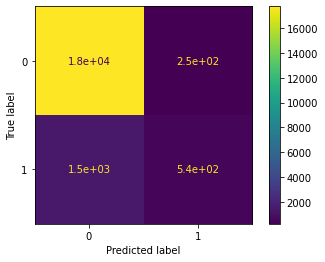

In [631]:
cm_display_lgr_full = ConfusionMatrixDisplay(confusion_matrix = resultados_cm.reshape(2,2), display_labels = [0, 1])
cm_display_lgr_full.plot()
plt.show()

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB - Default </b> </font>
<a name="gbn_default"></a>

[[ Back to Top ]](#content)

In [46]:
# GaussianNB - Full dataset

gnb = GaussianNB()

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

gnb_full_results    = []
gnb_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gnb.fit(X_train, y_train)
    
    y_pred = gnb.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    gnb_full_results.append(list_results)
    gnb_full_results_cm.append(list_cm)

In [49]:
filas    = ['GaussianNB_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(gnb_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
GaussianNB_full,0.647487,0.403787,0.497367


In [51]:
# Tiempo expresado en segundos
resultados['TIEMPO']= 6.07
resultados

,PRECISION,RECALL,F1,TIEMPO
GaussianNB_full,0.647487,0.403787,0.497367,6.07


In [52]:
resultados.to_pickle("resultados_gnb_full.pkl")

In [53]:
resultados_cm= gmean(gnb_full_results_cm)
resultados_cm 

array([[[17548.37388377,   440.75391567],
        [ 1197.81284369,   811.53110098]]])

In [54]:
 with open('resultados_gnb_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

In [648]:
with open('resultados_gnb_full_cm.pkl','rb') as f:
        resultados_cm = pickle.load(f)

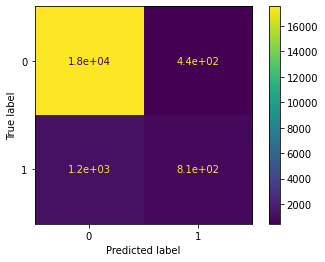

In [649]:
cm_display_lgr_full = ConfusionMatrixDisplay(confusion_matrix = resultados_cm.reshape(2,2), display_labels = [0, 1])
cm_display_lgr_full.plot()
plt.show()

<br>

<br>

<font size='5' style="color:orange">  <b> Random Forest Classifier - Default </b> </font>
<a name="rfc_default"></a>

[[ Back to Top ]](#content)

In [57]:
# RandomForestClassifier - Full dataset

rfc = RandomForestClassifier()

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

rfc_full_results    = []
rfc_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    results_list    = [precision, recall, f1]
    cm_list = [cm]
    rfc_full_results.append(results_list)
    rfc_full_results_cm.append(cm_list)

C:\Users\denun\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\denun\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\denun\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\denun\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precis

In [60]:
filas    = ['RandomForestClassifier_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(rfc_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
RandomForestClassifier_full,0.0,0.0,0.0


In [62]:
# Tiempo expresado en segundos
resultados['TIEMPO']= 5978
resultados

,PRECISION,RECALL,F1,TIEMPO
RandomForestClassifier_full,0.0,0.0,0.0,5978


In [63]:
resultados.to_pickle("resultados_rfc_full.pkl")

In [64]:
resultados_cm = gmean(rfc_full_results_cm)
resultados_cm 

C:\Users\denun\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:279: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


array([[[17990.19999555,     0.        ],
        [ 2009.69994775,     0.        ]]])

In [65]:
 with open('resultados_rfc_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> K Neighbors Classifier - Default </b> </font>
<a name="knc_default"></a>

[[ Back to Top ]](#content)

In [247]:
# KNeighborsClassifier - Full dataset

knc = KNeighborsClassifier()
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

knc_full_results    = []
knc_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knc.fit(X_train, y_train)
    
    y_pred = knc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    knc_full_results.append(list_results)
    knc_full_results_cm.append(list_cm)

In [250]:
filas    = ['KNeighborsClassifier_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(knc_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
KNeighborsClassifier_full,0.223142,0.003169,0.006247


In [252]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 781
resultados

,PRECISION,RECALL,F1,TIEMPO
KNeighborsClassifier_full,0.223142,0.003169,0.006247,781


In [253]:
resultados.to_pickle("resultados_knc_full.pkl")

In [254]:
resultados_cm = gmean(knc_full_results_cm)
resultados_cm 

array([[[1.79686995e+04, 2.10021668e+01],
        [2.00229720e+03, 6.36867140e+00]]])

In [255]:
 with open('resultados_knc_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> XGBoost Classifier - Default </b> </font>
<a name="xgb_default"></a>

[[ Back to Top ]](#content)

In [219]:
# XGB Classifier - Full dataset

xgb = XGBClassifier()
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

xgb_full_results    = []
xgb_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    xgb_full_results.append(list_results)
    xgb_full_results_cm.append(list_cm)

In [222]:
filas    = ['XGBoost_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(xgb_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
XGBoost_full,0.693811,0.247841,0.365173


In [224]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 1493
resultados

,PRECISION,RECALL,F1,TIEMPO
XGBoost_full,0.693811,0.247841,0.365173,1493


In [225]:
resultados.to_pickle("resultados_xgb_full.pkl")

In [226]:
resultados_cm = gmean(xgb_full_results_cm)
resultados_cm 

array([[[17770.3980353 ,   219.63054203],
        [ 1511.03421725,   498.11093953]]])

In [227]:
 with open('resultados_xgb_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Catboost Classifier - Default </b> </font>
<a name="cb_default"></a>

[[ Back to Top ]](#content)

In [256]:
# Catboost Classifier - Full dataset

cb = CatBoostClassifier()
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

cb_full_results    = []
cb_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    cb.fit(X_train, y_train)
    
    y_pred = cb.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    cb_full_results.append(list_results)
    cb_full_results_cm.append(list_cm)


Learning rate set to 0.09461
0:	learn: 0.6142038	total: 221ms	remaining: 3m 41s
1:	learn: 0.5502873	total: 287ms	remaining: 2m 23s
2:	learn: 0.5015346	total: 357ms	remaining: 1m 58s
3:	learn: 0.4635310	total: 421ms	remaining: 1m 44s
4:	learn: 0.4322948	total: 493ms	remaining: 1m 38s
5:	learn: 0.4070403	total: 550ms	remaining: 1m 31s
6:	learn: 0.3867937	total: 606ms	remaining: 1m 25s
7:	learn: 0.3706352	total: 661ms	remaining: 1m 21s
8:	learn: 0.3580597	total: 723ms	remaining: 1m 19s
9:	learn: 0.3479389	total: 783ms	remaining: 1m 17s
10:	learn: 0.3398434	total: 837ms	remaining: 1m 15s
11:	learn: 0.3322477	total: 890ms	remaining: 1m 13s
12:	learn: 0.3264440	total: 941ms	remaining: 1m 11s
13:	learn: 0.3212962	total: 1s	remaining: 1m 10s
14:	learn: 0.3171745	total: 1.05s	remaining: 1m 9s
15:	learn: 0.3136426	total: 1.1s	remaining: 1m 7s
16:	learn: 0.3104751	total: 1.15s	remaining: 1m 6s
17:	learn: 0.3078731	total: 1.2s	remaining: 1m 5s
18:	learn: 0.3055370	total: 1.25s	remaining: 1m 4s
19:

163:	learn: 0.2308516	total: 9.7s	remaining: 49.4s
164:	learn: 0.2306189	total: 9.75s	remaining: 49.4s
165:	learn: 0.2303548	total: 9.81s	remaining: 49.3s
166:	learn: 0.2301090	total: 9.86s	remaining: 49.2s
167:	learn: 0.2298659	total: 9.92s	remaining: 49.1s
168:	learn: 0.2296394	total: 9.97s	remaining: 49s
169:	learn: 0.2294082	total: 10s	remaining: 48.9s
170:	learn: 0.2291841	total: 10.1s	remaining: 48.9s
171:	learn: 0.2289364	total: 10.1s	remaining: 48.8s
172:	learn: 0.2287056	total: 10.2s	remaining: 48.7s
173:	learn: 0.2284449	total: 10.2s	remaining: 48.6s
174:	learn: 0.2282165	total: 10.3s	remaining: 48.5s
175:	learn: 0.2280002	total: 10.3s	remaining: 48.4s
176:	learn: 0.2277399	total: 10.4s	remaining: 48.4s
177:	learn: 0.2275053	total: 10.5s	remaining: 48.4s
178:	learn: 0.2272979	total: 10.5s	remaining: 48.3s
179:	learn: 0.2270767	total: 10.6s	remaining: 48.2s
180:	learn: 0.2268469	total: 10.6s	remaining: 48.1s
181:	learn: 0.2266316	total: 10.7s	remaining: 48s
182:	learn: 0.22640

324:	learn: 0.2032764	total: 18.8s	remaining: 39.1s
325:	learn: 0.2031677	total: 18.9s	remaining: 39s
326:	learn: 0.2030588	total: 18.9s	remaining: 39s
327:	learn: 0.2029347	total: 19s	remaining: 38.9s
328:	learn: 0.2028085	total: 19s	remaining: 38.8s
329:	learn: 0.2026965	total: 19.1s	remaining: 38.8s
330:	learn: 0.2025661	total: 19.1s	remaining: 38.7s
331:	learn: 0.2024338	total: 19.2s	remaining: 38.6s
332:	learn: 0.2023132	total: 19.3s	remaining: 38.6s
333:	learn: 0.2022004	total: 19.3s	remaining: 38.5s
334:	learn: 0.2020762	total: 19.4s	remaining: 38.4s
335:	learn: 0.2019654	total: 19.4s	remaining: 38.4s
336:	learn: 0.2018397	total: 19.5s	remaining: 38.3s
337:	learn: 0.2017325	total: 19.5s	remaining: 38.2s
338:	learn: 0.2016174	total: 19.6s	remaining: 38.2s
339:	learn: 0.2014878	total: 19.6s	remaining: 38.1s
340:	learn: 0.2013604	total: 19.7s	remaining: 38.1s
341:	learn: 0.2012432	total: 19.7s	remaining: 38s
342:	learn: 0.2011109	total: 19.8s	remaining: 37.9s
343:	learn: 0.2009930	

484:	learn: 0.1867607	total: 28.3s	remaining: 30.1s
485:	learn: 0.1866770	total: 28.4s	remaining: 30s
486:	learn: 0.1865926	total: 28.4s	remaining: 30s
487:	learn: 0.1865167	total: 28.5s	remaining: 29.9s
488:	learn: 0.1864231	total: 28.6s	remaining: 29.9s
489:	learn: 0.1863288	total: 28.6s	remaining: 29.8s
490:	learn: 0.1862551	total: 28.7s	remaining: 29.7s
491:	learn: 0.1861638	total: 28.8s	remaining: 29.7s
492:	learn: 0.1860791	total: 28.8s	remaining: 29.6s
493:	learn: 0.1859942	total: 28.9s	remaining: 29.6s
494:	learn: 0.1859187	total: 28.9s	remaining: 29.5s
495:	learn: 0.1858380	total: 29s	remaining: 29.5s
496:	learn: 0.1857576	total: 29.1s	remaining: 29.4s
497:	learn: 0.1856768	total: 29.1s	remaining: 29.4s
498:	learn: 0.1855888	total: 29.2s	remaining: 29.3s
499:	learn: 0.1855075	total: 29.3s	remaining: 29.3s
500:	learn: 0.1854214	total: 29.3s	remaining: 29.2s
501:	learn: 0.1853293	total: 29.4s	remaining: 29.1s
502:	learn: 0.1852444	total: 29.4s	remaining: 29.1s
503:	learn: 0.1851

644:	learn: 0.1745316	total: 38.6s	remaining: 21.3s
645:	learn: 0.1744701	total: 38.7s	remaining: 21.2s
646:	learn: 0.1743927	total: 38.8s	remaining: 21.1s
647:	learn: 0.1743089	total: 38.8s	remaining: 21.1s
648:	learn: 0.1742425	total: 38.9s	remaining: 21s
649:	learn: 0.1741921	total: 38.9s	remaining: 21s
650:	learn: 0.1741049	total: 39s	remaining: 20.9s
651:	learn: 0.1740426	total: 39s	remaining: 20.8s
652:	learn: 0.1739703	total: 39.1s	remaining: 20.8s
653:	learn: 0.1739081	total: 39.1s	remaining: 20.7s
654:	learn: 0.1738384	total: 39.2s	remaining: 20.6s
655:	learn: 0.1737571	total: 39.2s	remaining: 20.6s
656:	learn: 0.1736926	total: 39.3s	remaining: 20.5s
657:	learn: 0.1736270	total: 39.3s	remaining: 20.4s
658:	learn: 0.1735605	total: 39.4s	remaining: 20.4s
659:	learn: 0.1734865	total: 39.4s	remaining: 20.3s
660:	learn: 0.1734095	total: 39.5s	remaining: 20.3s
661:	learn: 0.1733406	total: 39.6s	remaining: 20.2s
662:	learn: 0.1732736	total: 39.6s	remaining: 20.1s
663:	learn: 0.173215

804:	learn: 0.1644805	total: 47.3s	remaining: 11.4s
805:	learn: 0.1644272	total: 47.3s	remaining: 11.4s
806:	learn: 0.1643749	total: 47.4s	remaining: 11.3s
807:	learn: 0.1643157	total: 47.4s	remaining: 11.3s
808:	learn: 0.1642647	total: 47.5s	remaining: 11.2s
809:	learn: 0.1642073	total: 47.5s	remaining: 11.2s
810:	learn: 0.1641522	total: 47.6s	remaining: 11.1s
811:	learn: 0.1640929	total: 47.7s	remaining: 11s
812:	learn: 0.1640352	total: 47.7s	remaining: 11s
813:	learn: 0.1639790	total: 47.8s	remaining: 10.9s
814:	learn: 0.1639288	total: 47.8s	remaining: 10.9s
815:	learn: 0.1638703	total: 47.9s	remaining: 10.8s
816:	learn: 0.1638278	total: 47.9s	remaining: 10.7s
817:	learn: 0.1637740	total: 48s	remaining: 10.7s
818:	learn: 0.1637200	total: 48s	remaining: 10.6s
819:	learn: 0.1636733	total: 48.1s	remaining: 10.6s
820:	learn: 0.1636052	total: 48.2s	remaining: 10.5s
821:	learn: 0.1635383	total: 48.2s	remaining: 10.4s
822:	learn: 0.1634809	total: 48.3s	remaining: 10.4s
823:	learn: 0.163429

963:	learn: 0.1559171	total: 56.8s	remaining: 2.12s
964:	learn: 0.1558601	total: 56.9s	remaining: 2.06s
965:	learn: 0.1558119	total: 56.9s	remaining: 2s
966:	learn: 0.1557762	total: 57s	remaining: 1.94s
967:	learn: 0.1557199	total: 57s	remaining: 1.89s
968:	learn: 0.1556710	total: 57.1s	remaining: 1.82s
969:	learn: 0.1556132	total: 57.1s	remaining: 1.77s
970:	learn: 0.1555623	total: 57.2s	remaining: 1.71s
971:	learn: 0.1555170	total: 57.2s	remaining: 1.65s
972:	learn: 0.1554723	total: 57.3s	remaining: 1.59s
973:	learn: 0.1554254	total: 57.4s	remaining: 1.53s
974:	learn: 0.1553786	total: 57.4s	remaining: 1.47s
975:	learn: 0.1553227	total: 57.5s	remaining: 1.41s
976:	learn: 0.1552658	total: 57.5s	remaining: 1.35s
977:	learn: 0.1552054	total: 57.6s	remaining: 1.29s
978:	learn: 0.1551523	total: 57.7s	remaining: 1.24s
979:	learn: 0.1551046	total: 57.7s	remaining: 1.18s
980:	learn: 0.1550522	total: 57.8s	remaining: 1.12s
981:	learn: 0.1550205	total: 57.8s	remaining: 1.06s
982:	learn: 0.15496

123:	learn: 0.2427263	total: 6.81s	remaining: 48.1s
124:	learn: 0.2424247	total: 6.86s	remaining: 48s
125:	learn: 0.2421367	total: 6.91s	remaining: 47.9s
126:	learn: 0.2418456	total: 6.97s	remaining: 47.9s
127:	learn: 0.2415343	total: 7.04s	remaining: 47.9s
128:	learn: 0.2412158	total: 7.1s	remaining: 47.9s
129:	learn: 0.2409249	total: 7.14s	remaining: 47.8s
130:	learn: 0.2406611	total: 7.19s	remaining: 47.7s
131:	learn: 0.2403730	total: 7.25s	remaining: 47.7s
132:	learn: 0.2400949	total: 7.3s	remaining: 47.6s
133:	learn: 0.2398006	total: 7.35s	remaining: 47.5s
134:	learn: 0.2394865	total: 7.4s	remaining: 47.4s
135:	learn: 0.2391999	total: 7.46s	remaining: 47.4s
136:	learn: 0.2389197	total: 7.51s	remaining: 47.3s
137:	learn: 0.2386208	total: 7.56s	remaining: 47.2s
138:	learn: 0.2383470	total: 7.61s	remaining: 47.1s
139:	learn: 0.2380618	total: 7.67s	remaining: 47.1s
140:	learn: 0.2377824	total: 7.73s	remaining: 47.1s
141:	learn: 0.2374985	total: 7.79s	remaining: 47.1s
142:	learn: 0.237

285:	learn: 0.2092061	total: 15.9s	remaining: 39.8s
286:	learn: 0.2090745	total: 16s	remaining: 39.7s
287:	learn: 0.2089421	total: 16.1s	remaining: 39.7s
288:	learn: 0.2087947	total: 16.1s	remaining: 39.7s
289:	learn: 0.2086420	total: 16.2s	remaining: 39.6s
290:	learn: 0.2084879	total: 16.2s	remaining: 39.6s
291:	learn: 0.2083436	total: 16.3s	remaining: 39.5s
292:	learn: 0.2082047	total: 16.4s	remaining: 39.5s
293:	learn: 0.2080699	total: 16.4s	remaining: 39.4s
294:	learn: 0.2079391	total: 16.5s	remaining: 39.4s
295:	learn: 0.2078101	total: 16.5s	remaining: 39.3s
296:	learn: 0.2076733	total: 16.6s	remaining: 39.2s
297:	learn: 0.2075273	total: 16.6s	remaining: 39.2s
298:	learn: 0.2073887	total: 16.7s	remaining: 39.1s
299:	learn: 0.2072521	total: 16.7s	remaining: 39.1s
300:	learn: 0.2071279	total: 16.8s	remaining: 39s
301:	learn: 0.2069864	total: 16.9s	remaining: 39s
302:	learn: 0.2068520	total: 16.9s	remaining: 38.9s
303:	learn: 0.2067215	total: 17s	remaining: 38.9s
304:	learn: 0.206595

445:	learn: 0.1908627	total: 25.3s	remaining: 31.4s
446:	learn: 0.1907573	total: 25.3s	remaining: 31.4s
447:	learn: 0.1906624	total: 25.4s	remaining: 31.3s
448:	learn: 0.1905816	total: 25.4s	remaining: 31.2s
449:	learn: 0.1904980	total: 25.5s	remaining: 31.2s
450:	learn: 0.1904000	total: 25.6s	remaining: 31.1s
451:	learn: 0.1903025	total: 25.6s	remaining: 31.1s
452:	learn: 0.1902050	total: 25.7s	remaining: 31s
453:	learn: 0.1901150	total: 25.7s	remaining: 31s
454:	learn: 0.1900240	total: 25.8s	remaining: 30.9s
455:	learn: 0.1899339	total: 25.9s	remaining: 30.9s
456:	learn: 0.1898435	total: 25.9s	remaining: 30.8s
457:	learn: 0.1897531	total: 26s	remaining: 30.7s
458:	learn: 0.1896677	total: 26s	remaining: 30.7s
459:	learn: 0.1895684	total: 26.1s	remaining: 30.6s
460:	learn: 0.1894790	total: 26.2s	remaining: 30.6s
461:	learn: 0.1893851	total: 26.2s	remaining: 30.5s
462:	learn: 0.1892900	total: 26.3s	remaining: 30.5s
463:	learn: 0.1891981	total: 26.4s	remaining: 30.5s
464:	learn: 0.189130

604:	learn: 0.1779652	total: 34.6s	remaining: 22.6s
605:	learn: 0.1778935	total: 34.6s	remaining: 22.5s
606:	learn: 0.1778235	total: 34.7s	remaining: 22.5s
607:	learn: 0.1777568	total: 34.7s	remaining: 22.4s
608:	learn: 0.1776788	total: 34.8s	remaining: 22.4s
609:	learn: 0.1775837	total: 34.9s	remaining: 22.3s
610:	learn: 0.1775211	total: 34.9s	remaining: 22.2s
611:	learn: 0.1774495	total: 35s	remaining: 22.2s
612:	learn: 0.1773694	total: 35s	remaining: 22.1s
613:	learn: 0.1772896	total: 35.1s	remaining: 22.1s
614:	learn: 0.1772214	total: 35.2s	remaining: 22s
615:	learn: 0.1771489	total: 35.2s	remaining: 22s
616:	learn: 0.1770772	total: 35.3s	remaining: 21.9s
617:	learn: 0.1770085	total: 35.4s	remaining: 21.9s
618:	learn: 0.1769272	total: 35.4s	remaining: 21.8s
619:	learn: 0.1768489	total: 35.5s	remaining: 21.7s
620:	learn: 0.1767766	total: 35.5s	remaining: 21.7s
621:	learn: 0.1767032	total: 35.6s	remaining: 21.6s
622:	learn: 0.1766285	total: 35.7s	remaining: 21.6s
623:	learn: 0.176549

765:	learn: 0.1673819	total: 43.9s	remaining: 13.4s
766:	learn: 0.1673138	total: 43.9s	remaining: 13.3s
767:	learn: 0.1672438	total: 44s	remaining: 13.3s
768:	learn: 0.1671815	total: 44.1s	remaining: 13.2s
769:	learn: 0.1671116	total: 44.1s	remaining: 13.2s
770:	learn: 0.1670529	total: 44.2s	remaining: 13.1s
771:	learn: 0.1669881	total: 44.2s	remaining: 13.1s
772:	learn: 0.1669322	total: 44.3s	remaining: 13s
773:	learn: 0.1668780	total: 44.4s	remaining: 13s
774:	learn: 0.1668131	total: 44.4s	remaining: 12.9s
775:	learn: 0.1667517	total: 44.5s	remaining: 12.8s
776:	learn: 0.1666903	total: 44.6s	remaining: 12.8s
777:	learn: 0.1666358	total: 44.6s	remaining: 12.7s
778:	learn: 0.1665840	total: 44.7s	remaining: 12.7s
779:	learn: 0.1665313	total: 44.7s	remaining: 12.6s
780:	learn: 0.1664693	total: 44.8s	remaining: 12.6s
781:	learn: 0.1664163	total: 44.8s	remaining: 12.5s
782:	learn: 0.1663704	total: 44.9s	remaining: 12.4s
783:	learn: 0.1662985	total: 44.9s	remaining: 12.4s
784:	learn: 0.1662

925:	learn: 0.1583097	total: 53.2s	remaining: 4.25s
926:	learn: 0.1582689	total: 53.3s	remaining: 4.2s
927:	learn: 0.1582258	total: 53.3s	remaining: 4.14s
928:	learn: 0.1581788	total: 53.4s	remaining: 4.08s
929:	learn: 0.1581259	total: 53.5s	remaining: 4.02s
930:	learn: 0.1580674	total: 53.5s	remaining: 3.97s
931:	learn: 0.1580057	total: 53.6s	remaining: 3.91s
932:	learn: 0.1579433	total: 53.7s	remaining: 3.85s
933:	learn: 0.1578881	total: 53.8s	remaining: 3.8s
934:	learn: 0.1578303	total: 53.8s	remaining: 3.74s
935:	learn: 0.1577740	total: 53.9s	remaining: 3.69s
936:	learn: 0.1577183	total: 54s	remaining: 3.63s
937:	learn: 0.1576787	total: 54s	remaining: 3.57s
938:	learn: 0.1576360	total: 54.1s	remaining: 3.51s
939:	learn: 0.1575871	total: 54.1s	remaining: 3.46s
940:	learn: 0.1575281	total: 54.2s	remaining: 3.4s
941:	learn: 0.1574773	total: 54.3s	remaining: 3.34s
942:	learn: 0.1574284	total: 54.3s	remaining: 3.28s
943:	learn: 0.1573883	total: 54.4s	remaining: 3.23s
944:	learn: 0.15733

85:	learn: 0.2554491	total: 4.92s	remaining: 52.3s
86:	learn: 0.2550522	total: 4.97s	remaining: 52.2s
87:	learn: 0.2546785	total: 5.02s	remaining: 52.1s
88:	learn: 0.2542706	total: 5.08s	remaining: 52s
89:	learn: 0.2538921	total: 5.13s	remaining: 51.9s
90:	learn: 0.2534733	total: 5.18s	remaining: 51.8s
91:	learn: 0.2530452	total: 5.25s	remaining: 51.8s
92:	learn: 0.2526353	total: 5.31s	remaining: 51.8s
93:	learn: 0.2522648	total: 5.37s	remaining: 51.8s
94:	learn: 0.2518576	total: 5.42s	remaining: 51.6s
95:	learn: 0.2514745	total: 5.48s	remaining: 51.6s
96:	learn: 0.2511097	total: 5.54s	remaining: 51.6s
97:	learn: 0.2507293	total: 5.61s	remaining: 51.6s
98:	learn: 0.2503806	total: 5.67s	remaining: 51.6s
99:	learn: 0.2499884	total: 5.73s	remaining: 51.6s
100:	learn: 0.2496021	total: 5.78s	remaining: 51.4s
101:	learn: 0.2492797	total: 5.83s	remaining: 51.3s
102:	learn: 0.2489093	total: 5.89s	remaining: 51.3s
103:	learn: 0.2485818	total: 5.95s	remaining: 51.2s
104:	learn: 0.2481992	total: 

246:	learn: 0.2144133	total: 14.4s	remaining: 43.9s
247:	learn: 0.2142410	total: 14.5s	remaining: 43.8s
248:	learn: 0.2140683	total: 14.5s	remaining: 43.8s
249:	learn: 0.2139051	total: 14.6s	remaining: 43.8s
250:	learn: 0.2137498	total: 14.6s	remaining: 43.7s
251:	learn: 0.2135706	total: 14.7s	remaining: 43.7s
252:	learn: 0.2134347	total: 14.8s	remaining: 43.6s
253:	learn: 0.2132644	total: 14.8s	remaining: 43.6s
254:	learn: 0.2130995	total: 14.9s	remaining: 43.5s
255:	learn: 0.2129252	total: 15s	remaining: 43.5s
256:	learn: 0.2127630	total: 15s	remaining: 43.5s
257:	learn: 0.2125987	total: 15.1s	remaining: 43.5s
258:	learn: 0.2124475	total: 15.2s	remaining: 43.4s
259:	learn: 0.2122986	total: 15.2s	remaining: 43.4s
260:	learn: 0.2121455	total: 15.3s	remaining: 43.3s
261:	learn: 0.2120004	total: 15.4s	remaining: 43.3s
262:	learn: 0.2118336	total: 15.4s	remaining: 43.2s
263:	learn: 0.2116753	total: 15.5s	remaining: 43.2s
264:	learn: 0.2115256	total: 15.6s	remaining: 43.2s
265:	learn: 0.21

406:	learn: 0.1939016	total: 24.6s	remaining: 35.8s
407:	learn: 0.1938079	total: 24.6s	remaining: 35.7s
408:	learn: 0.1937102	total: 24.7s	remaining: 35.7s
409:	learn: 0.1936058	total: 24.7s	remaining: 35.6s
410:	learn: 0.1935062	total: 24.8s	remaining: 35.5s
411:	learn: 0.1934130	total: 24.9s	remaining: 35.5s
412:	learn: 0.1933213	total: 24.9s	remaining: 35.4s
413:	learn: 0.1932199	total: 25s	remaining: 35.4s
414:	learn: 0.1931285	total: 25.1s	remaining: 35.3s
415:	learn: 0.1930251	total: 25.1s	remaining: 35.3s
416:	learn: 0.1929191	total: 25.2s	remaining: 35.2s
417:	learn: 0.1928118	total: 25.3s	remaining: 35.2s
418:	learn: 0.1927184	total: 25.3s	remaining: 35.1s
419:	learn: 0.1926095	total: 25.4s	remaining: 35.1s
420:	learn: 0.1925170	total: 25.4s	remaining: 35s
421:	learn: 0.1924093	total: 25.5s	remaining: 34.9s
422:	learn: 0.1923043	total: 25.6s	remaining: 34.9s
423:	learn: 0.1921988	total: 25.6s	remaining: 34.8s
424:	learn: 0.1920970	total: 25.7s	remaining: 34.8s
425:	learn: 0.19

566:	learn: 0.1799051	total: 34s	remaining: 26s
567:	learn: 0.1798399	total: 34.1s	remaining: 25.9s
568:	learn: 0.1797646	total: 34.2s	remaining: 25.9s
569:	learn: 0.1796834	total: 34.2s	remaining: 25.8s
570:	learn: 0.1796110	total: 34.3s	remaining: 25.8s
571:	learn: 0.1795427	total: 34.3s	remaining: 25.7s
572:	learn: 0.1794746	total: 34.4s	remaining: 25.6s
573:	learn: 0.1793939	total: 34.5s	remaining: 25.6s
574:	learn: 0.1793226	total: 34.5s	remaining: 25.5s
575:	learn: 0.1792587	total: 34.6s	remaining: 25.4s
576:	learn: 0.1791757	total: 34.6s	remaining: 25.4s
577:	learn: 0.1790936	total: 34.7s	remaining: 25.3s
578:	learn: 0.1790177	total: 34.8s	remaining: 25.3s
579:	learn: 0.1789488	total: 34.8s	remaining: 25.2s
580:	learn: 0.1788797	total: 34.9s	remaining: 25.1s
581:	learn: 0.1788045	total: 34.9s	remaining: 25.1s
582:	learn: 0.1787186	total: 35s	remaining: 25s
583:	learn: 0.1786634	total: 35s	remaining: 25s
584:	learn: 0.1785877	total: 35.1s	remaining: 24.9s
585:	learn: 0.1785028	to

727:	learn: 0.1689417	total: 43.7s	remaining: 16.3s
728:	learn: 0.1688768	total: 43.7s	remaining: 16.3s
729:	learn: 0.1688088	total: 43.8s	remaining: 16.2s
730:	learn: 0.1687482	total: 43.8s	remaining: 16.1s
731:	learn: 0.1686840	total: 43.9s	remaining: 16.1s
732:	learn: 0.1686139	total: 44s	remaining: 16s
733:	learn: 0.1685596	total: 44s	remaining: 15.9s
734:	learn: 0.1685050	total: 44.1s	remaining: 15.9s
735:	learn: 0.1684444	total: 44.1s	remaining: 15.8s
736:	learn: 0.1683857	total: 44.2s	remaining: 15.8s
737:	learn: 0.1683337	total: 44.3s	remaining: 15.7s
738:	learn: 0.1682743	total: 44.3s	remaining: 15.7s
739:	learn: 0.1682014	total: 44.4s	remaining: 15.6s
740:	learn: 0.1681396	total: 44.5s	remaining: 15.5s
741:	learn: 0.1680691	total: 44.5s	remaining: 15.5s
742:	learn: 0.1680061	total: 44.6s	remaining: 15.4s
743:	learn: 0.1679376	total: 44.7s	remaining: 15.4s
744:	learn: 0.1678782	total: 44.7s	remaining: 15.3s
745:	learn: 0.1678095	total: 44.8s	remaining: 15.3s
746:	learn: 0.1677

889:	learn: 0.1594179	total: 53.5s	remaining: 6.61s
890:	learn: 0.1593706	total: 53.6s	remaining: 6.55s
891:	learn: 0.1593134	total: 53.6s	remaining: 6.49s
892:	learn: 0.1592588	total: 53.7s	remaining: 6.43s
893:	learn: 0.1591950	total: 53.7s	remaining: 6.37s
894:	learn: 0.1591412	total: 53.8s	remaining: 6.31s
895:	learn: 0.1590912	total: 53.9s	remaining: 6.25s
896:	learn: 0.1590174	total: 53.9s	remaining: 6.19s
897:	learn: 0.1589675	total: 54s	remaining: 6.13s
898:	learn: 0.1589234	total: 54.1s	remaining: 6.07s
899:	learn: 0.1588775	total: 54.1s	remaining: 6.01s
900:	learn: 0.1588260	total: 54.2s	remaining: 5.95s
901:	learn: 0.1587841	total: 54.2s	remaining: 5.89s
902:	learn: 0.1587222	total: 54.3s	remaining: 5.83s
903:	learn: 0.1586778	total: 54.4s	remaining: 5.77s
904:	learn: 0.1586110	total: 54.4s	remaining: 5.71s
905:	learn: 0.1585629	total: 54.5s	remaining: 5.65s
906:	learn: 0.1585109	total: 54.5s	remaining: 5.59s
907:	learn: 0.1584537	total: 54.6s	remaining: 5.53s
908:	learn: 0.

49:	learn: 0.2742560	total: 2.99s	remaining: 56.8s
50:	learn: 0.2736127	total: 3.05s	remaining: 56.7s
51:	learn: 0.2729680	total: 3.1s	remaining: 56.5s
52:	learn: 0.2723145	total: 3.16s	remaining: 56.4s
53:	learn: 0.2716861	total: 3.22s	remaining: 56.5s
54:	learn: 0.2711235	total: 3.28s	remaining: 56.4s
55:	learn: 0.2705212	total: 3.34s	remaining: 56.4s
56:	learn: 0.2699571	total: 3.4s	remaining: 56.3s
57:	learn: 0.2693478	total: 3.46s	remaining: 56.3s
58:	learn: 0.2687959	total: 3.51s	remaining: 56.1s
59:	learn: 0.2681934	total: 3.57s	remaining: 55.9s
60:	learn: 0.2676953	total: 3.62s	remaining: 55.7s
61:	learn: 0.2671124	total: 3.68s	remaining: 55.7s
62:	learn: 0.2665708	total: 3.74s	remaining: 55.7s
63:	learn: 0.2659971	total: 3.8s	remaining: 55.6s
64:	learn: 0.2654335	total: 3.86s	remaining: 55.6s
65:	learn: 0.2648955	total: 3.92s	remaining: 55.5s
66:	learn: 0.2643477	total: 3.98s	remaining: 55.4s
67:	learn: 0.2638237	total: 4.04s	remaining: 55.4s
68:	learn: 0.2632889	total: 4.1s	r

212:	learn: 0.2204321	total: 12.3s	remaining: 45.5s
213:	learn: 0.2202307	total: 12.4s	remaining: 45.4s
214:	learn: 0.2200440	total: 12.4s	remaining: 45.4s
215:	learn: 0.2198539	total: 12.5s	remaining: 45.3s
216:	learn: 0.2196780	total: 12.5s	remaining: 45.2s
217:	learn: 0.2194851	total: 12.6s	remaining: 45.2s
218:	learn: 0.2192765	total: 12.7s	remaining: 45.1s
219:	learn: 0.2190777	total: 12.7s	remaining: 45.1s
220:	learn: 0.2189032	total: 12.8s	remaining: 45s
221:	learn: 0.2187047	total: 12.8s	remaining: 45s
222:	learn: 0.2185336	total: 12.9s	remaining: 44.9s
223:	learn: 0.2183510	total: 13s	remaining: 44.9s
224:	learn: 0.2181730	total: 13s	remaining: 44.8s
225:	learn: 0.2179871	total: 13.1s	remaining: 44.8s
226:	learn: 0.2178117	total: 13.1s	remaining: 44.7s
227:	learn: 0.2176189	total: 13.2s	remaining: 44.6s
228:	learn: 0.2174402	total: 13.2s	remaining: 44.6s
229:	learn: 0.2172744	total: 13.3s	remaining: 44.5s
230:	learn: 0.2170935	total: 13.4s	remaining: 44.5s
231:	learn: 0.216913

372:	learn: 0.1976740	total: 21.6s	remaining: 36.3s
373:	learn: 0.1975512	total: 21.7s	remaining: 36.2s
374:	learn: 0.1974411	total: 21.7s	remaining: 36.2s
375:	learn: 0.1973213	total: 21.8s	remaining: 36.1s
376:	learn: 0.1972189	total: 21.8s	remaining: 36.1s
377:	learn: 0.1971037	total: 21.9s	remaining: 36s
378:	learn: 0.1969980	total: 21.9s	remaining: 35.9s
379:	learn: 0.1968983	total: 22s	remaining: 35.9s
380:	learn: 0.1967868	total: 22.1s	remaining: 35.8s
381:	learn: 0.1966797	total: 22.1s	remaining: 35.8s
382:	learn: 0.1965711	total: 22.2s	remaining: 35.7s
383:	learn: 0.1964698	total: 22.2s	remaining: 35.7s
384:	learn: 0.1963562	total: 22.3s	remaining: 35.6s
385:	learn: 0.1962329	total: 22.4s	remaining: 35.6s
386:	learn: 0.1961343	total: 22.4s	remaining: 35.5s
387:	learn: 0.1960216	total: 22.5s	remaining: 35.4s
388:	learn: 0.1959090	total: 22.5s	remaining: 35.4s
389:	learn: 0.1957982	total: 22.6s	remaining: 35.4s
390:	learn: 0.1956810	total: 22.7s	remaining: 35.3s
391:	learn: 0.19

531:	learn: 0.1826363	total: 31.4s	remaining: 27.6s
532:	learn: 0.1825536	total: 31.4s	remaining: 27.5s
533:	learn: 0.1824763	total: 31.5s	remaining: 27.5s
534:	learn: 0.1823867	total: 31.5s	remaining: 27.4s
535:	learn: 0.1823082	total: 31.6s	remaining: 27.4s
536:	learn: 0.1822171	total: 31.7s	remaining: 27.3s
537:	learn: 0.1821334	total: 31.7s	remaining: 27.2s
538:	learn: 0.1820557	total: 31.8s	remaining: 27.2s
539:	learn: 0.1819727	total: 31.8s	remaining: 27.1s
540:	learn: 0.1818945	total: 31.9s	remaining: 27.1s
541:	learn: 0.1818265	total: 32s	remaining: 27s
542:	learn: 0.1817422	total: 32s	remaining: 27s
543:	learn: 0.1816651	total: 32.1s	remaining: 26.9s
544:	learn: 0.1815880	total: 32.2s	remaining: 26.9s
545:	learn: 0.1815150	total: 32.2s	remaining: 26.8s
546:	learn: 0.1814229	total: 32.3s	remaining: 26.7s
547:	learn: 0.1813471	total: 32.4s	remaining: 26.7s
548:	learn: 0.1812711	total: 32.4s	remaining: 26.6s
549:	learn: 0.1811975	total: 32.5s	remaining: 26.6s
550:	learn: 0.181116

691:	learn: 0.1713814	total: 40.8s	remaining: 18.2s
692:	learn: 0.1713098	total: 40.9s	remaining: 18.1s
693:	learn: 0.1712439	total: 41s	remaining: 18.1s
694:	learn: 0.1711731	total: 41s	remaining: 18s
695:	learn: 0.1711173	total: 41.1s	remaining: 17.9s
696:	learn: 0.1710436	total: 41.1s	remaining: 17.9s
697:	learn: 0.1709750	total: 41.2s	remaining: 17.8s
698:	learn: 0.1709177	total: 41.3s	remaining: 17.8s
699:	learn: 0.1708528	total: 41.3s	remaining: 17.7s
700:	learn: 0.1707832	total: 41.4s	remaining: 17.6s
701:	learn: 0.1707216	total: 41.4s	remaining: 17.6s
702:	learn: 0.1706595	total: 41.5s	remaining: 17.5s
703:	learn: 0.1705928	total: 41.5s	remaining: 17.5s
704:	learn: 0.1705152	total: 41.6s	remaining: 17.4s
705:	learn: 0.1704523	total: 41.7s	remaining: 17.3s
706:	learn: 0.1703766	total: 41.7s	remaining: 17.3s
707:	learn: 0.1703109	total: 41.8s	remaining: 17.2s
708:	learn: 0.1702469	total: 41.8s	remaining: 17.2s
709:	learn: 0.1701888	total: 41.9s	remaining: 17.1s
710:	learn: 0.1701

850:	learn: 0.1618947	total: 50.9s	remaining: 8.91s
851:	learn: 0.1618403	total: 50.9s	remaining: 8.85s
852:	learn: 0.1617948	total: 51s	remaining: 8.79s
853:	learn: 0.1617434	total: 51.1s	remaining: 8.73s
854:	learn: 0.1616821	total: 51.1s	remaining: 8.67s
855:	learn: 0.1616285	total: 51.2s	remaining: 8.61s
856:	learn: 0.1615731	total: 51.2s	remaining: 8.55s
857:	learn: 0.1615141	total: 51.3s	remaining: 8.49s
858:	learn: 0.1614490	total: 51.4s	remaining: 8.43s
859:	learn: 0.1613872	total: 51.4s	remaining: 8.38s
860:	learn: 0.1613257	total: 51.5s	remaining: 8.32s
861:	learn: 0.1612744	total: 51.6s	remaining: 8.26s
862:	learn: 0.1612273	total: 51.6s	remaining: 8.2s
863:	learn: 0.1611729	total: 51.7s	remaining: 8.14s
864:	learn: 0.1611082	total: 51.8s	remaining: 8.09s
865:	learn: 0.1610447	total: 51.9s	remaining: 8.03s
866:	learn: 0.1609861	total: 52s	remaining: 7.97s
867:	learn: 0.1609334	total: 52s	remaining: 7.91s
868:	learn: 0.1608783	total: 52.1s	remaining: 7.86s
869:	learn: 0.16081

10:	learn: 0.3397098	total: 718ms	remaining: 1m 4s
11:	learn: 0.3326173	total: 775ms	remaining: 1m 3s
12:	learn: 0.3263741	total: 836ms	remaining: 1m 3s
13:	learn: 0.3214446	total: 895ms	remaining: 1m 3s
14:	learn: 0.3170721	total: 955ms	remaining: 1m 2s
15:	learn: 0.3134654	total: 1s	remaining: 1m 1s
16:	learn: 0.3104490	total: 1.06s	remaining: 1m 1s
17:	learn: 0.3078266	total: 1.13s	remaining: 1m 1s
18:	learn: 0.3055784	total: 1.2s	remaining: 1m 2s
19:	learn: 0.3033881	total: 1.27s	remaining: 1m 2s
20:	learn: 0.3014284	total: 1.33s	remaining: 1m 2s
21:	learn: 0.2996163	total: 1.4s	remaining: 1m 2s
22:	learn: 0.2980693	total: 1.46s	remaining: 1m 2s
23:	learn: 0.2966224	total: 1.52s	remaining: 1m 1s
24:	learn: 0.2952576	total: 1.58s	remaining: 1m 1s
25:	learn: 0.2940880	total: 1.64s	remaining: 1m 1s
26:	learn: 0.2929742	total: 1.7s	remaining: 1m 1s
27:	learn: 0.2918673	total: 1.75s	remaining: 1m
28:	learn: 0.2907328	total: 1.81s	remaining: 1m
29:	learn: 0.2896725	total: 1.87s	remaining

175:	learn: 0.2281321	total: 11.4s	remaining: 53.3s
176:	learn: 0.2278982	total: 11.4s	remaining: 53.2s
177:	learn: 0.2276622	total: 11.5s	remaining: 53.1s
178:	learn: 0.2274420	total: 11.6s	remaining: 53s
179:	learn: 0.2272125	total: 11.6s	remaining: 52.9s
180:	learn: 0.2269929	total: 11.7s	remaining: 52.8s
181:	learn: 0.2267810	total: 11.7s	remaining: 52.7s
182:	learn: 0.2265606	total: 11.8s	remaining: 52.6s
183:	learn: 0.2263300	total: 11.9s	remaining: 52.6s
184:	learn: 0.2261013	total: 11.9s	remaining: 52.5s
185:	learn: 0.2258910	total: 12s	remaining: 52.4s
186:	learn: 0.2256639	total: 12s	remaining: 52.4s
187:	learn: 0.2254421	total: 12.1s	remaining: 52.3s
188:	learn: 0.2252286	total: 12.2s	remaining: 52.2s
189:	learn: 0.2250043	total: 12.2s	remaining: 52.2s
190:	learn: 0.2247732	total: 12.3s	remaining: 52.2s
191:	learn: 0.2245719	total: 12.4s	remaining: 52.1s
192:	learn: 0.2243611	total: 12.4s	remaining: 52s
193:	learn: 0.2241603	total: 12.5s	remaining: 52s
194:	learn: 0.2239369	

335:	learn: 0.2019626	total: 21.7s	remaining: 42.8s
336:	learn: 0.2018387	total: 21.7s	remaining: 42.7s
337:	learn: 0.2017154	total: 21.8s	remaining: 42.7s
338:	learn: 0.2015928	total: 21.9s	remaining: 42.6s
339:	learn: 0.2014615	total: 21.9s	remaining: 42.5s
340:	learn: 0.2013358	total: 22s	remaining: 42.5s
341:	learn: 0.2012132	total: 22.1s	remaining: 42.4s
342:	learn: 0.2010832	total: 22.1s	remaining: 42.4s
343:	learn: 0.2009546	total: 22.2s	remaining: 42.3s
344:	learn: 0.2008455	total: 22.3s	remaining: 42.3s
345:	learn: 0.2007301	total: 22.3s	remaining: 42.2s
346:	learn: 0.2006030	total: 22.4s	remaining: 42.1s
347:	learn: 0.2004875	total: 22.4s	remaining: 42s
348:	learn: 0.2003666	total: 22.5s	remaining: 42s
349:	learn: 0.2002399	total: 22.6s	remaining: 41.9s
350:	learn: 0.2001173	total: 22.7s	remaining: 41.9s
351:	learn: 0.1999943	total: 22.7s	remaining: 41.8s
352:	learn: 0.1998843	total: 22.8s	remaining: 41.8s
353:	learn: 0.1997859	total: 22.8s	remaining: 41.7s
354:	learn: 0.1996

494:	learn: 0.1857770	total: 32.1s	remaining: 32.8s
495:	learn: 0.1856852	total: 32.2s	remaining: 32.7s
496:	learn: 0.1855945	total: 32.3s	remaining: 32.7s
497:	learn: 0.1854965	total: 32.3s	remaining: 32.6s
498:	learn: 0.1854222	total: 32.4s	remaining: 32.5s
499:	learn: 0.1853448	total: 32.5s	remaining: 32.5s
500:	learn: 0.1852622	total: 32.5s	remaining: 32.4s
501:	learn: 0.1851783	total: 32.6s	remaining: 32.3s
502:	learn: 0.1850925	total: 32.6s	remaining: 32.2s
503:	learn: 0.1850007	total: 32.7s	remaining: 32.2s
504:	learn: 0.1849141	total: 32.8s	remaining: 32.1s
505:	learn: 0.1848301	total: 32.8s	remaining: 32s
506:	learn: 0.1847489	total: 32.9s	remaining: 32s
507:	learn: 0.1846670	total: 32.9s	remaining: 31.9s
508:	learn: 0.1845854	total: 33s	remaining: 31.8s
509:	learn: 0.1845042	total: 33s	remaining: 31.8s
510:	learn: 0.1844337	total: 33.1s	remaining: 31.7s
511:	learn: 0.1843446	total: 33.2s	remaining: 31.6s
512:	learn: 0.1842481	total: 33.2s	remaining: 31.5s
513:	learn: 0.184164

654:	learn: 0.1735638	total: 42.2s	remaining: 22.2s
655:	learn: 0.1734942	total: 42.3s	remaining: 22.2s
656:	learn: 0.1734182	total: 42.3s	remaining: 22.1s
657:	learn: 0.1733528	total: 42.4s	remaining: 22s
658:	learn: 0.1732856	total: 42.4s	remaining: 22s
659:	learn: 0.1732177	total: 42.5s	remaining: 21.9s
660:	learn: 0.1731532	total: 42.6s	remaining: 21.8s
661:	learn: 0.1730783	total: 42.6s	remaining: 21.8s
662:	learn: 0.1730176	total: 42.7s	remaining: 21.7s
663:	learn: 0.1729451	total: 42.8s	remaining: 21.6s
664:	learn: 0.1728819	total: 42.8s	remaining: 21.6s
665:	learn: 0.1728155	total: 42.9s	remaining: 21.5s
666:	learn: 0.1727557	total: 42.9s	remaining: 21.4s
667:	learn: 0.1726818	total: 43s	remaining: 21.4s
668:	learn: 0.1726241	total: 43.1s	remaining: 21.3s
669:	learn: 0.1725522	total: 43.1s	remaining: 21.2s
670:	learn: 0.1724823	total: 43.2s	remaining: 21.2s
671:	learn: 0.1724034	total: 43.3s	remaining: 21.1s
672:	learn: 0.1723364	total: 43.3s	remaining: 21.1s
673:	learn: 0.1722

814:	learn: 0.1636271	total: 52.6s	remaining: 11.9s
815:	learn: 0.1635660	total: 52.6s	remaining: 11.9s
816:	learn: 0.1635126	total: 52.7s	remaining: 11.8s
817:	learn: 0.1634645	total: 52.8s	remaining: 11.7s
818:	learn: 0.1633992	total: 52.8s	remaining: 11.7s
819:	learn: 0.1633491	total: 52.9s	remaining: 11.6s
820:	learn: 0.1632866	total: 53s	remaining: 11.5s
821:	learn: 0.1632349	total: 53s	remaining: 11.5s
822:	learn: 0.1631817	total: 53.1s	remaining: 11.4s
823:	learn: 0.1631233	total: 53.2s	remaining: 11.4s
824:	learn: 0.1630641	total: 53.3s	remaining: 11.3s
825:	learn: 0.1629992	total: 53.4s	remaining: 11.2s
826:	learn: 0.1629401	total: 53.4s	remaining: 11.2s
827:	learn: 0.1628996	total: 53.5s	remaining: 11.1s
828:	learn: 0.1628552	total: 53.6s	remaining: 11.1s
829:	learn: 0.1627980	total: 53.7s	remaining: 11s
830:	learn: 0.1627477	total: 53.7s	remaining: 10.9s
831:	learn: 0.1626955	total: 53.8s	remaining: 10.9s
832:	learn: 0.1626403	total: 53.9s	remaining: 10.8s
833:	learn: 0.1625

976:	learn: 0.1549810	total: 1m 2s	remaining: 1.48s
977:	learn: 0.1549357	total: 1m 2s	remaining: 1.42s
978:	learn: 0.1548865	total: 1m 3s	remaining: 1.35s
979:	learn: 0.1548251	total: 1m 3s	remaining: 1.29s
980:	learn: 0.1547766	total: 1m 3s	remaining: 1.22s
981:	learn: 0.1547181	total: 1m 3s	remaining: 1.16s
982:	learn: 0.1546829	total: 1m 3s	remaining: 1.09s
983:	learn: 0.1546291	total: 1m 3s	remaining: 1.03s
984:	learn: 0.1545723	total: 1m 3s	remaining: 966ms
985:	learn: 0.1545153	total: 1m 3s	remaining: 902ms
986:	learn: 0.1544633	total: 1m 3s	remaining: 837ms
987:	learn: 0.1544081	total: 1m 3s	remaining: 773ms
988:	learn: 0.1543522	total: 1m 3s	remaining: 708ms
989:	learn: 0.1542989	total: 1m 3s	remaining: 644ms
990:	learn: 0.1542636	total: 1m 3s	remaining: 579ms
991:	learn: 0.1542063	total: 1m 3s	remaining: 515ms
992:	learn: 0.1541537	total: 1m 3s	remaining: 450ms
993:	learn: 0.1541034	total: 1m 3s	remaining: 386ms
994:	learn: 0.1540558	total: 1m 4s	remaining: 322ms
995:	learn: 

139:	learn: 0.2375535	total: 8.53s	remaining: 52.4s
140:	learn: 0.2372848	total: 8.59s	remaining: 52.3s
141:	learn: 0.2369929	total: 8.65s	remaining: 52.3s
142:	learn: 0.2367260	total: 8.71s	remaining: 52.2s
143:	learn: 0.2364537	total: 8.77s	remaining: 52.1s
144:	learn: 0.2361771	total: 8.82s	remaining: 52s
145:	learn: 0.2358962	total: 8.88s	remaining: 52s
146:	learn: 0.2356184	total: 8.94s	remaining: 51.9s
147:	learn: 0.2353631	total: 8.99s	remaining: 51.8s
148:	learn: 0.2350748	total: 9.06s	remaining: 51.7s
149:	learn: 0.2348225	total: 9.11s	remaining: 51.7s
150:	learn: 0.2345214	total: 9.18s	remaining: 51.6s
151:	learn: 0.2342466	total: 9.25s	remaining: 51.6s
152:	learn: 0.2339902	total: 9.31s	remaining: 51.5s
153:	learn: 0.2337291	total: 9.37s	remaining: 51.5s
154:	learn: 0.2334484	total: 9.43s	remaining: 51.4s
155:	learn: 0.2331990	total: 9.48s	remaining: 51.3s
156:	learn: 0.2329555	total: 9.54s	remaining: 51.2s
157:	learn: 0.2326889	total: 9.6s	remaining: 51.1s
158:	learn: 0.232

298:	learn: 0.2067861	total: 18.1s	remaining: 42.4s
299:	learn: 0.2066545	total: 18.1s	remaining: 42.3s
300:	learn: 0.2065078	total: 18.2s	remaining: 42.3s
301:	learn: 0.2063707	total: 18.3s	remaining: 42.3s
302:	learn: 0.2062386	total: 18.3s	remaining: 42.2s
303:	learn: 0.2061079	total: 18.4s	remaining: 42.1s
304:	learn: 0.2059715	total: 18.5s	remaining: 42.1s
305:	learn: 0.2058265	total: 18.5s	remaining: 42s
306:	learn: 0.2057080	total: 18.6s	remaining: 42s
307:	learn: 0.2055690	total: 18.7s	remaining: 41.9s
308:	learn: 0.2054396	total: 18.7s	remaining: 41.9s
309:	learn: 0.2053023	total: 18.8s	remaining: 41.9s
310:	learn: 0.2051745	total: 18.9s	remaining: 41.8s
311:	learn: 0.2050435	total: 18.9s	remaining: 41.7s
312:	learn: 0.2049198	total: 19s	remaining: 41.7s
313:	learn: 0.2047926	total: 19s	remaining: 41.6s
314:	learn: 0.2046518	total: 19.1s	remaining: 41.6s
315:	learn: 0.2045222	total: 19.2s	remaining: 41.5s
316:	learn: 0.2043960	total: 19.2s	remaining: 41.4s
317:	learn: 0.204273

458:	learn: 0.1891328	total: 28s	remaining: 33s
459:	learn: 0.1890379	total: 28.1s	remaining: 33s
460:	learn: 0.1889408	total: 28.2s	remaining: 32.9s
461:	learn: 0.1888495	total: 28.2s	remaining: 32.9s
462:	learn: 0.1887727	total: 28.3s	remaining: 32.8s
463:	learn: 0.1886801	total: 28.4s	remaining: 32.8s
464:	learn: 0.1885816	total: 28.4s	remaining: 32.7s
465:	learn: 0.1884907	total: 28.5s	remaining: 32.7s
466:	learn: 0.1884013	total: 28.6s	remaining: 32.6s
467:	learn: 0.1883020	total: 28.7s	remaining: 32.6s
468:	learn: 0.1882133	total: 28.7s	remaining: 32.5s
469:	learn: 0.1881253	total: 28.8s	remaining: 32.5s
470:	learn: 0.1880408	total: 28.9s	remaining: 32.4s
471:	learn: 0.1879516	total: 28.9s	remaining: 32.4s
472:	learn: 0.1878675	total: 29s	remaining: 32.3s
473:	learn: 0.1877872	total: 29.1s	remaining: 32.3s
474:	learn: 0.1876962	total: 29.2s	remaining: 32.2s
475:	learn: 0.1876037	total: 29.2s	remaining: 32.2s
476:	learn: 0.1875078	total: 29.3s	remaining: 32.2s
477:	learn: 0.187418

620:	learn: 0.1761003	total: 39s	remaining: 23.8s
621:	learn: 0.1760318	total: 39.1s	remaining: 23.8s
622:	learn: 0.1759594	total: 39.2s	remaining: 23.7s
623:	learn: 0.1758869	total: 39.2s	remaining: 23.6s
624:	learn: 0.1758200	total: 39.3s	remaining: 23.6s
625:	learn: 0.1757525	total: 39.4s	remaining: 23.5s
626:	learn: 0.1756801	total: 39.5s	remaining: 23.5s
627:	learn: 0.1756058	total: 39.5s	remaining: 23.4s
628:	learn: 0.1755455	total: 39.6s	remaining: 23.4s
629:	learn: 0.1754772	total: 39.7s	remaining: 23.3s
630:	learn: 0.1754035	total: 39.7s	remaining: 23.2s
631:	learn: 0.1753397	total: 39.8s	remaining: 23.2s
632:	learn: 0.1752822	total: 39.8s	remaining: 23.1s
633:	learn: 0.1751976	total: 39.9s	remaining: 23s
634:	learn: 0.1751206	total: 40s	remaining: 23s
635:	learn: 0.1750435	total: 40s	remaining: 22.9s
636:	learn: 0.1749721	total: 40.1s	remaining: 22.9s
637:	learn: 0.1749015	total: 40.2s	remaining: 22.8s
638:	learn: 0.1748261	total: 40.2s	remaining: 22.7s
639:	learn: 0.1747560	

782:	learn: 0.1658338	total: 49.3s	remaining: 13.7s
783:	learn: 0.1657721	total: 49.3s	remaining: 13.6s
784:	learn: 0.1657034	total: 49.4s	remaining: 13.5s
785:	learn: 0.1656384	total: 49.5s	remaining: 13.5s
786:	learn: 0.1655854	total: 49.5s	remaining: 13.4s
787:	learn: 0.1655312	total: 49.6s	remaining: 13.3s
788:	learn: 0.1654743	total: 49.6s	remaining: 13.3s
789:	learn: 0.1653989	total: 49.7s	remaining: 13.2s
790:	learn: 0.1653471	total: 49.8s	remaining: 13.1s
791:	learn: 0.1652921	total: 49.8s	remaining: 13.1s
792:	learn: 0.1652444	total: 49.9s	remaining: 13s
793:	learn: 0.1651948	total: 49.9s	remaining: 13s
794:	learn: 0.1651591	total: 50s	remaining: 12.9s
795:	learn: 0.1650895	total: 50s	remaining: 12.8s
796:	learn: 0.1650380	total: 50.1s	remaining: 12.8s
797:	learn: 0.1649699	total: 50.2s	remaining: 12.7s
798:	learn: 0.1649061	total: 50.2s	remaining: 12.6s
799:	learn: 0.1648439	total: 50.3s	remaining: 12.6s
800:	learn: 0.1647855	total: 50.4s	remaining: 12.5s
801:	learn: 0.164726

942:	learn: 0.1570058	total: 60s	remaining: 3.63s
943:	learn: 0.1569681	total: 1m	remaining: 3.56s
944:	learn: 0.1569128	total: 1m	remaining: 3.5s
945:	learn: 0.1568601	total: 1m	remaining: 3.44s
946:	learn: 0.1568115	total: 1m	remaining: 3.37s
947:	learn: 0.1567578	total: 1m	remaining: 3.31s
948:	learn: 0.1567061	total: 1m	remaining: 3.25s
949:	learn: 0.1566582	total: 1m	remaining: 3.18s
950:	learn: 0.1566145	total: 1m	remaining: 3.12s
951:	learn: 0.1565547	total: 1m	remaining: 3.06s
952:	learn: 0.1565095	total: 1m	remaining: 2.99s
953:	learn: 0.1564517	total: 1m	remaining: 2.93s
954:	learn: 0.1564068	total: 1m	remaining: 2.87s
955:	learn: 0.1563678	total: 1m	remaining: 2.8s
956:	learn: 0.1563121	total: 1m	remaining: 2.74s
957:	learn: 0.1562427	total: 1m 1s	remaining: 2.68s
958:	learn: 0.1561902	total: 1m 1s	remaining: 2.61s
959:	learn: 0.1561429	total: 1m 1s	remaining: 2.55s
960:	learn: 0.1560831	total: 1m 1s	remaining: 2.49s
961:	learn: 0.1560373	total: 1m 1s	remaining: 2.42s
962:	l

104:	learn: 0.2482879	total: 6.57s	remaining: 56s
105:	learn: 0.2479141	total: 6.63s	remaining: 55.9s
106:	learn: 0.2475528	total: 6.69s	remaining: 55.8s
107:	learn: 0.2472053	total: 6.75s	remaining: 55.7s
108:	learn: 0.2468785	total: 6.8s	remaining: 55.6s
109:	learn: 0.2465297	total: 6.87s	remaining: 55.6s
110:	learn: 0.2462089	total: 6.93s	remaining: 55.5s
111:	learn: 0.2458324	total: 7s	remaining: 55.5s
112:	learn: 0.2455036	total: 7.06s	remaining: 55.4s
113:	learn: 0.2451603	total: 7.13s	remaining: 55.4s
114:	learn: 0.2448446	total: 7.2s	remaining: 55.4s
115:	learn: 0.2445427	total: 7.25s	remaining: 55.3s
116:	learn: 0.2442481	total: 7.31s	remaining: 55.1s
117:	learn: 0.2439385	total: 7.36s	remaining: 55s
118:	learn: 0.2436078	total: 7.42s	remaining: 54.9s
119:	learn: 0.2433113	total: 7.49s	remaining: 54.9s
120:	learn: 0.2429909	total: 7.55s	remaining: 54.9s
121:	learn: 0.2426676	total: 7.63s	remaining: 54.9s
122:	learn: 0.2423685	total: 7.7s	remaining: 54.9s
123:	learn: 0.2420523	

265:	learn: 0.2112810	total: 16.8s	remaining: 46.4s
266:	learn: 0.2111288	total: 16.9s	remaining: 46.3s
267:	learn: 0.2109796	total: 16.9s	remaining: 46.2s
268:	learn: 0.2108272	total: 17s	remaining: 46.2s
269:	learn: 0.2106821	total: 17.1s	remaining: 46.1s
270:	learn: 0.2105275	total: 17.1s	remaining: 46s
271:	learn: 0.2103808	total: 17.2s	remaining: 46s
272:	learn: 0.2102294	total: 17.2s	remaining: 45.9s
273:	learn: 0.2100928	total: 17.3s	remaining: 45.8s
274:	learn: 0.2099464	total: 17.3s	remaining: 45.7s
275:	learn: 0.2098030	total: 17.4s	remaining: 45.7s
276:	learn: 0.2096559	total: 17.5s	remaining: 45.6s
277:	learn: 0.2095078	total: 17.5s	remaining: 45.6s
278:	learn: 0.2093524	total: 17.6s	remaining: 45.5s
279:	learn: 0.2092113	total: 17.7s	remaining: 45.5s
280:	learn: 0.2090582	total: 17.7s	remaining: 45.4s
281:	learn: 0.2089255	total: 17.8s	remaining: 45.3s
282:	learn: 0.2087644	total: 17.9s	remaining: 45.3s
283:	learn: 0.2086153	total: 18s	remaining: 45.3s
284:	learn: 0.208481

426:	learn: 0.1919060	total: 27.5s	remaining: 36.9s
427:	learn: 0.1918024	total: 27.6s	remaining: 36.9s
428:	learn: 0.1917129	total: 27.7s	remaining: 36.8s
429:	learn: 0.1916035	total: 27.7s	remaining: 36.8s
430:	learn: 0.1915102	total: 27.8s	remaining: 36.7s
431:	learn: 0.1914243	total: 27.9s	remaining: 36.7s
432:	learn: 0.1913312	total: 27.9s	remaining: 36.6s
433:	learn: 0.1912403	total: 28s	remaining: 36.5s
434:	learn: 0.1911382	total: 28.1s	remaining: 36.5s
435:	learn: 0.1910481	total: 28.1s	remaining: 36.4s
436:	learn: 0.1909490	total: 28.2s	remaining: 36.3s
437:	learn: 0.1908678	total: 28.3s	remaining: 36.3s
438:	learn: 0.1907567	total: 28.4s	remaining: 36.2s
439:	learn: 0.1906713	total: 28.4s	remaining: 36.2s
440:	learn: 0.1905834	total: 28.5s	remaining: 36.1s
441:	learn: 0.1904901	total: 28.6s	remaining: 36.1s
442:	learn: 0.1903894	total: 28.7s	remaining: 36s
443:	learn: 0.1903036	total: 28.7s	remaining: 36s
444:	learn: 0.1902213	total: 28.8s	remaining: 35.9s
445:	learn: 0.1901

586:	learn: 0.1784468	total: 38.2s	remaining: 26.9s
587:	learn: 0.1783820	total: 38.3s	remaining: 26.8s
588:	learn: 0.1783050	total: 38.4s	remaining: 26.8s
589:	learn: 0.1782363	total: 38.4s	remaining: 26.7s
590:	learn: 0.1781455	total: 38.5s	remaining: 26.6s
591:	learn: 0.1780619	total: 38.5s	remaining: 26.6s
592:	learn: 0.1779905	total: 38.6s	remaining: 26.5s
593:	learn: 0.1779093	total: 38.7s	remaining: 26.4s
594:	learn: 0.1778370	total: 38.7s	remaining: 26.4s
595:	learn: 0.1777762	total: 38.8s	remaining: 26.3s
596:	learn: 0.1777089	total: 38.8s	remaining: 26.2s
597:	learn: 0.1776306	total: 38.9s	remaining: 26.1s
598:	learn: 0.1775636	total: 38.9s	remaining: 26.1s
599:	learn: 0.1775078	total: 39s	remaining: 26s
600:	learn: 0.1774289	total: 39.1s	remaining: 25.9s
601:	learn: 0.1773586	total: 39.1s	remaining: 25.9s
602:	learn: 0.1772856	total: 39.2s	remaining: 25.8s
603:	learn: 0.1771996	total: 39.2s	remaining: 25.7s
604:	learn: 0.1771308	total: 39.3s	remaining: 25.7s
605:	learn: 0.17

746:	learn: 0.1677517	total: 47.9s	remaining: 16.2s
747:	learn: 0.1676936	total: 47.9s	remaining: 16.1s
748:	learn: 0.1676338	total: 48s	remaining: 16.1s
749:	learn: 0.1675672	total: 48s	remaining: 16s
750:	learn: 0.1675087	total: 48.1s	remaining: 15.9s
751:	learn: 0.1674494	total: 48.2s	remaining: 15.9s
752:	learn: 0.1673920	total: 48.2s	remaining: 15.8s
753:	learn: 0.1673233	total: 48.3s	remaining: 15.8s
754:	learn: 0.1672603	total: 48.3s	remaining: 15.7s
755:	learn: 0.1672099	total: 48.4s	remaining: 15.6s
756:	learn: 0.1671488	total: 48.5s	remaining: 15.6s
757:	learn: 0.1670757	total: 48.5s	remaining: 15.5s
758:	learn: 0.1670133	total: 48.6s	remaining: 15.4s
759:	learn: 0.1669619	total: 48.7s	remaining: 15.4s
760:	learn: 0.1669214	total: 48.7s	remaining: 15.3s
761:	learn: 0.1668656	total: 48.8s	remaining: 15.2s
762:	learn: 0.1667997	total: 48.8s	remaining: 15.2s
763:	learn: 0.1667395	total: 48.9s	remaining: 15.1s
764:	learn: 0.1666789	total: 48.9s	remaining: 15s
765:	learn: 0.166623

906:	learn: 0.1587674	total: 57.4s	remaining: 5.88s
907:	learn: 0.1587221	total: 57.4s	remaining: 5.82s
908:	learn: 0.1586662	total: 57.5s	remaining: 5.76s
909:	learn: 0.1586137	total: 57.6s	remaining: 5.69s
910:	learn: 0.1585628	total: 57.6s	remaining: 5.63s
911:	learn: 0.1585141	total: 57.7s	remaining: 5.57s
912:	learn: 0.1584595	total: 57.8s	remaining: 5.5s
913:	learn: 0.1584106	total: 57.8s	remaining: 5.44s
914:	learn: 0.1583559	total: 57.9s	remaining: 5.38s
915:	learn: 0.1583040	total: 57.9s	remaining: 5.31s
916:	learn: 0.1582448	total: 58s	remaining: 5.25s
917:	learn: 0.1581804	total: 58s	remaining: 5.18s
918:	learn: 0.1581314	total: 58.1s	remaining: 5.12s
919:	learn: 0.1580700	total: 58.2s	remaining: 5.06s
920:	learn: 0.1580108	total: 58.2s	remaining: 4.99s
921:	learn: 0.1579557	total: 58.3s	remaining: 4.93s
922:	learn: 0.1579201	total: 58.3s	remaining: 4.87s
923:	learn: 0.1578631	total: 58.4s	remaining: 4.8s
924:	learn: 0.1578150	total: 58.5s	remaining: 4.74s
925:	learn: 0.1577

68:	learn: 0.2633693	total: 3.84s	remaining: 51.9s
69:	learn: 0.2629109	total: 3.9s	remaining: 51.8s
70:	learn: 0.2624416	total: 3.95s	remaining: 51.7s
71:	learn: 0.2619494	total: 4.02s	remaining: 51.9s
72:	learn: 0.2614747	total: 4.08s	remaining: 51.8s
73:	learn: 0.2609885	total: 4.14s	remaining: 51.8s
74:	learn: 0.2605226	total: 4.2s	remaining: 51.8s
75:	learn: 0.2600775	total: 4.25s	remaining: 51.7s
76:	learn: 0.2596029	total: 4.32s	remaining: 51.8s
77:	learn: 0.2591375	total: 4.38s	remaining: 51.8s
78:	learn: 0.2587158	total: 4.43s	remaining: 51.7s
79:	learn: 0.2582036	total: 4.49s	remaining: 51.6s
80:	learn: 0.2577583	total: 4.55s	remaining: 51.6s
81:	learn: 0.2573635	total: 4.6s	remaining: 51.5s
82:	learn: 0.2569334	total: 4.66s	remaining: 51.4s
83:	learn: 0.2564682	total: 4.71s	remaining: 51.3s
84:	learn: 0.2560285	total: 4.76s	remaining: 51.3s
85:	learn: 0.2556385	total: 4.82s	remaining: 51.2s
86:	learn: 0.2552426	total: 4.87s	remaining: 51.1s
87:	learn: 0.2547974	total: 4.93s	

229:	learn: 0.2173328	total: 13.3s	remaining: 44.7s
230:	learn: 0.2171400	total: 13.4s	remaining: 44.6s
231:	learn: 0.2169669	total: 13.5s	remaining: 44.6s
232:	learn: 0.2167991	total: 13.5s	remaining: 44.5s
233:	learn: 0.2166335	total: 13.6s	remaining: 44.4s
234:	learn: 0.2164665	total: 13.6s	remaining: 44.4s
235:	learn: 0.2162990	total: 13.7s	remaining: 44.3s
236:	learn: 0.2161346	total: 13.7s	remaining: 44.3s
237:	learn: 0.2159659	total: 13.8s	remaining: 44.2s
238:	learn: 0.2158041	total: 13.9s	remaining: 44.2s
239:	learn: 0.2156367	total: 13.9s	remaining: 44.1s
240:	learn: 0.2154600	total: 14s	remaining: 44.1s
241:	learn: 0.2152867	total: 14.1s	remaining: 44s
242:	learn: 0.2151075	total: 14.1s	remaining: 44s
243:	learn: 0.2149373	total: 14.2s	remaining: 43.9s
244:	learn: 0.2147625	total: 14.2s	remaining: 43.9s
245:	learn: 0.2145982	total: 14.3s	remaining: 43.8s
246:	learn: 0.2144328	total: 14.4s	remaining: 43.8s
247:	learn: 0.2142589	total: 14.4s	remaining: 43.7s
248:	learn: 0.2140

391:	learn: 0.1955262	total: 23.1s	remaining: 35.8s
392:	learn: 0.1954277	total: 23.2s	remaining: 35.8s
393:	learn: 0.1953310	total: 23.2s	remaining: 35.7s
394:	learn: 0.1952267	total: 23.3s	remaining: 35.6s
395:	learn: 0.1951341	total: 23.3s	remaining: 35.6s
396:	learn: 0.1950315	total: 23.4s	remaining: 35.5s
397:	learn: 0.1949436	total: 23.4s	remaining: 35.4s
398:	learn: 0.1948496	total: 23.5s	remaining: 35.4s
399:	learn: 0.1947412	total: 23.5s	remaining: 35.3s
400:	learn: 0.1946356	total: 23.6s	remaining: 35.3s
401:	learn: 0.1945330	total: 23.7s	remaining: 35.2s
402:	learn: 0.1944286	total: 23.7s	remaining: 35.1s
403:	learn: 0.1943300	total: 23.8s	remaining: 35.1s
404:	learn: 0.1942203	total: 23.9s	remaining: 35s
405:	learn: 0.1941118	total: 23.9s	remaining: 35s
406:	learn: 0.1940038	total: 24s	remaining: 34.9s
407:	learn: 0.1938850	total: 24.1s	remaining: 34.9s
408:	learn: 0.1937811	total: 24.1s	remaining: 34.9s
409:	learn: 0.1936831	total: 24.2s	remaining: 34.8s
410:	learn: 0.1935

551:	learn: 0.1811898	total: 32.8s	remaining: 26.6s
552:	learn: 0.1811075	total: 32.9s	remaining: 26.6s
553:	learn: 0.1810200	total: 32.9s	remaining: 26.5s
554:	learn: 0.1809382	total: 33s	remaining: 26.5s
555:	learn: 0.1808682	total: 33.1s	remaining: 26.4s
556:	learn: 0.1807907	total: 33.1s	remaining: 26.3s
557:	learn: 0.1807181	total: 33.2s	remaining: 26.3s
558:	learn: 0.1806439	total: 33.3s	remaining: 26.2s
559:	learn: 0.1805652	total: 33.3s	remaining: 26.2s
560:	learn: 0.1804852	total: 33.4s	remaining: 26.1s
561:	learn: 0.1804101	total: 33.5s	remaining: 26.1s
562:	learn: 0.1803315	total: 33.5s	remaining: 26s
563:	learn: 0.1802553	total: 33.6s	remaining: 26s
564:	learn: 0.1801780	total: 33.6s	remaining: 25.9s
565:	learn: 0.1801078	total: 33.7s	remaining: 25.8s
566:	learn: 0.1800324	total: 33.8s	remaining: 25.8s
567:	learn: 0.1799388	total: 33.8s	remaining: 25.7s
568:	learn: 0.1798793	total: 33.9s	remaining: 25.7s
569:	learn: 0.1797889	total: 34s	remaining: 25.6s
570:	learn: 0.179728

713:	learn: 0.1698067	total: 43.5s	remaining: 17.4s
714:	learn: 0.1697404	total: 43.6s	remaining: 17.4s
715:	learn: 0.1696726	total: 43.7s	remaining: 17.3s
716:	learn: 0.1696119	total: 43.7s	remaining: 17.3s
717:	learn: 0.1695632	total: 43.8s	remaining: 17.2s
718:	learn: 0.1695033	total: 43.8s	remaining: 17.1s
719:	learn: 0.1694387	total: 43.9s	remaining: 17.1s
720:	learn: 0.1693729	total: 44s	remaining: 17s
721:	learn: 0.1693032	total: 44s	remaining: 17s
722:	learn: 0.1692453	total: 44.1s	remaining: 16.9s
723:	learn: 0.1691817	total: 44.2s	remaining: 16.8s
724:	learn: 0.1691126	total: 44.2s	remaining: 16.8s
725:	learn: 0.1690513	total: 44.3s	remaining: 16.7s
726:	learn: 0.1689814	total: 44.4s	remaining: 16.7s
727:	learn: 0.1689210	total: 44.4s	remaining: 16.6s
728:	learn: 0.1688551	total: 44.5s	remaining: 16.5s
729:	learn: 0.1687983	total: 44.6s	remaining: 16.5s
730:	learn: 0.1687328	total: 44.6s	remaining: 16.4s
731:	learn: 0.1686800	total: 44.7s	remaining: 16.4s
732:	learn: 0.168615

873:	learn: 0.1605464	total: 54.7s	remaining: 7.89s
874:	learn: 0.1604866	total: 54.8s	remaining: 7.83s
875:	learn: 0.1604427	total: 54.8s	remaining: 7.76s
876:	learn: 0.1603945	total: 54.9s	remaining: 7.7s
877:	learn: 0.1603392	total: 55s	remaining: 7.64s
878:	learn: 0.1602804	total: 55s	remaining: 7.58s
879:	learn: 0.1602266	total: 55.1s	remaining: 7.51s
880:	learn: 0.1601803	total: 55.2s	remaining: 7.45s
881:	learn: 0.1601222	total: 55.2s	remaining: 7.39s
882:	learn: 0.1600662	total: 55.3s	remaining: 7.33s
883:	learn: 0.1600103	total: 55.4s	remaining: 7.27s
884:	learn: 0.1599556	total: 55.4s	remaining: 7.2s
885:	learn: 0.1599031	total: 55.5s	remaining: 7.14s
886:	learn: 0.1598607	total: 55.6s	remaining: 7.08s
887:	learn: 0.1598149	total: 55.6s	remaining: 7.01s
888:	learn: 0.1597651	total: 55.7s	remaining: 6.95s
889:	learn: 0.1597275	total: 55.8s	remaining: 6.89s
890:	learn: 0.1596646	total: 55.8s	remaining: 6.83s
891:	learn: 0.1596081	total: 55.9s	remaining: 6.76s
892:	learn: 0.1595

33:	learn: 0.2864495	total: 2.17s	remaining: 1m 1s
34:	learn: 0.2855669	total: 2.24s	remaining: 1m 1s
35:	learn: 0.2847209	total: 2.31s	remaining: 1m 1s
36:	learn: 0.2838976	total: 2.38s	remaining: 1m 1s
37:	learn: 0.2830253	total: 2.45s	remaining: 1m 1s
38:	learn: 0.2822380	total: 2.51s	remaining: 1m 1s
39:	learn: 0.2814689	total: 2.58s	remaining: 1m 1s
40:	learn: 0.2806763	total: 2.64s	remaining: 1m 1s
41:	learn: 0.2799860	total: 2.69s	remaining: 1m 1s
42:	learn: 0.2792357	total: 2.75s	remaining: 1m 1s
43:	learn: 0.2785319	total: 2.81s	remaining: 1m 1s
44:	learn: 0.2777634	total: 2.87s	remaining: 1m
45:	learn: 0.2771000	total: 2.92s	remaining: 1m
46:	learn: 0.2763916	total: 2.98s	remaining: 1m
47:	learn: 0.2757263	total: 3.04s	remaining: 1m
48:	learn: 0.2750679	total: 3.09s	remaining: 59.9s
49:	learn: 0.2743636	total: 3.16s	remaining: 60s
50:	learn: 0.2736906	total: 3.21s	remaining: 59.7s
51:	learn: 0.2729915	total: 3.28s	remaining: 59.8s
52:	learn: 0.2723991	total: 3.34s	remaining: 

196:	learn: 0.2236659	total: 12.8s	remaining: 52.1s
197:	learn: 0.2234882	total: 12.8s	remaining: 52s
198:	learn: 0.2232816	total: 12.9s	remaining: 52s
199:	learn: 0.2230578	total: 13s	remaining: 51.9s
200:	learn: 0.2228556	total: 13s	remaining: 51.9s
201:	learn: 0.2226519	total: 13.1s	remaining: 51.8s
202:	learn: 0.2224466	total: 13.2s	remaining: 51.7s
203:	learn: 0.2222628	total: 13.2s	remaining: 51.6s
204:	learn: 0.2220558	total: 13.3s	remaining: 51.5s
205:	learn: 0.2218425	total: 13.3s	remaining: 51.5s
206:	learn: 0.2216316	total: 13.4s	remaining: 51.4s
207:	learn: 0.2214508	total: 13.5s	remaining: 51.3s
208:	learn: 0.2212559	total: 13.6s	remaining: 51.3s
209:	learn: 0.2210576	total: 13.6s	remaining: 51.2s
210:	learn: 0.2208539	total: 13.7s	remaining: 51.2s
211:	learn: 0.2206676	total: 13.7s	remaining: 51.1s
212:	learn: 0.2204789	total: 13.8s	remaining: 51s
213:	learn: 0.2202883	total: 13.9s	remaining: 50.9s
214:	learn: 0.2200922	total: 13.9s	remaining: 50.9s
215:	learn: 0.2199192	

355:	learn: 0.1995429	total: 22.9s	remaining: 41.5s
356:	learn: 0.1994182	total: 23s	remaining: 41.4s
357:	learn: 0.1993108	total: 23.1s	remaining: 41.4s
358:	learn: 0.1992014	total: 23.1s	remaining: 41.3s
359:	learn: 0.1990963	total: 23.2s	remaining: 41.2s
360:	learn: 0.1989840	total: 23.3s	remaining: 41.2s
361:	learn: 0.1988705	total: 23.3s	remaining: 41.1s
362:	learn: 0.1987544	total: 23.4s	remaining: 41s
363:	learn: 0.1986347	total: 23.5s	remaining: 41s
364:	learn: 0.1985195	total: 23.5s	remaining: 40.9s
365:	learn: 0.1984062	total: 23.6s	remaining: 40.9s
366:	learn: 0.1983103	total: 23.6s	remaining: 40.8s
367:	learn: 0.1982034	total: 23.7s	remaining: 40.7s
368:	learn: 0.1980955	total: 23.8s	remaining: 40.6s
369:	learn: 0.1979970	total: 23.8s	remaining: 40.6s
370:	learn: 0.1978755	total: 23.9s	remaining: 40.5s
371:	learn: 0.1977541	total: 23.9s	remaining: 40.4s
372:	learn: 0.1976511	total: 24s	remaining: 40.3s
373:	learn: 0.1975419	total: 24.1s	remaining: 40.3s
374:	learn: 0.197434

514:	learn: 0.1842757	total: 33.1s	remaining: 31.1s
515:	learn: 0.1842025	total: 33.1s	remaining: 31.1s
516:	learn: 0.1841231	total: 33.2s	remaining: 31s
517:	learn: 0.1840412	total: 33.3s	remaining: 30.9s
518:	learn: 0.1839516	total: 33.3s	remaining: 30.9s
519:	learn: 0.1838697	total: 33.4s	remaining: 30.8s
520:	learn: 0.1837839	total: 33.4s	remaining: 30.7s
521:	learn: 0.1837062	total: 33.5s	remaining: 30.7s
522:	learn: 0.1836280	total: 33.6s	remaining: 30.6s
523:	learn: 0.1835316	total: 33.6s	remaining: 30.6s
524:	learn: 0.1834440	total: 33.7s	remaining: 30.5s
525:	learn: 0.1833491	total: 33.8s	remaining: 30.4s
526:	learn: 0.1832663	total: 33.8s	remaining: 30.4s
527:	learn: 0.1831774	total: 33.9s	remaining: 30.3s
528:	learn: 0.1830828	total: 34s	remaining: 30.2s
529:	learn: 0.1830216	total: 34s	remaining: 30.2s
530:	learn: 0.1829394	total: 34.1s	remaining: 30.1s
531:	learn: 0.1828613	total: 34.2s	remaining: 30s
532:	learn: 0.1827864	total: 34.2s	remaining: 30s
533:	learn: 0.1827125	

676:	learn: 0.1725963	total: 43.3s	remaining: 20.6s
677:	learn: 0.1725336	total: 43.3s	remaining: 20.6s
678:	learn: 0.1724708	total: 43.4s	remaining: 20.5s
679:	learn: 0.1723974	total: 43.4s	remaining: 20.4s
680:	learn: 0.1723399	total: 43.5s	remaining: 20.4s
681:	learn: 0.1722824	total: 43.6s	remaining: 20.3s
682:	learn: 0.1722116	total: 43.6s	remaining: 20.2s
683:	learn: 0.1721497	total: 43.7s	remaining: 20.2s
684:	learn: 0.1720890	total: 43.7s	remaining: 20.1s
685:	learn: 0.1720275	total: 43.8s	remaining: 20s
686:	learn: 0.1719625	total: 43.9s	remaining: 20s
687:	learn: 0.1718939	total: 43.9s	remaining: 19.9s
688:	learn: 0.1718046	total: 44s	remaining: 19.9s
689:	learn: 0.1717274	total: 44.1s	remaining: 19.8s
690:	learn: 0.1716633	total: 44.1s	remaining: 19.7s
691:	learn: 0.1716114	total: 44.2s	remaining: 19.7s
692:	learn: 0.1715576	total: 44.2s	remaining: 19.6s
693:	learn: 0.1714926	total: 44.3s	remaining: 19.5s
694:	learn: 0.1714236	total: 44.4s	remaining: 19.5s
695:	learn: 0.1713

835:	learn: 0.1629539	total: 53.1s	remaining: 10.4s
836:	learn: 0.1629001	total: 53.2s	remaining: 10.4s
837:	learn: 0.1628451	total: 53.2s	remaining: 10.3s
838:	learn: 0.1627894	total: 53.3s	remaining: 10.2s
839:	learn: 0.1627256	total: 53.4s	remaining: 10.2s
840:	learn: 0.1626932	total: 53.4s	remaining: 10.1s
841:	learn: 0.1626447	total: 53.5s	remaining: 10s
842:	learn: 0.1625932	total: 53.6s	remaining: 9.97s
843:	learn: 0.1625455	total: 53.6s	remaining: 9.91s
844:	learn: 0.1624968	total: 53.7s	remaining: 9.84s
845:	learn: 0.1624411	total: 53.7s	remaining: 9.78s
846:	learn: 0.1623731	total: 53.8s	remaining: 9.72s
847:	learn: 0.1623177	total: 53.9s	remaining: 9.65s
848:	learn: 0.1622713	total: 53.9s	remaining: 9.59s
849:	learn: 0.1622130	total: 54s	remaining: 9.53s
850:	learn: 0.1621477	total: 54s	remaining: 9.46s
851:	learn: 0.1620975	total: 54.1s	remaining: 9.4s
852:	learn: 0.1620534	total: 54.2s	remaining: 9.33s
853:	learn: 0.1619897	total: 54.2s	remaining: 9.27s
854:	learn: 0.16193

996:	learn: 0.1545381	total: 1m 3s	remaining: 190ms
997:	learn: 0.1544984	total: 1m 3s	remaining: 126ms
998:	learn: 0.1544508	total: 1m 3s	remaining: 63.2ms
999:	learn: 0.1544039	total: 1m 3s	remaining: 0us
Learning rate set to 0.09461
0:	learn: 0.6142270	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.5503685	total: 124ms	remaining: 1m 2s
2:	learn: 0.5015765	total: 195ms	remaining: 1m 4s
3:	learn: 0.4635413	total: 264ms	remaining: 1m 5s
4:	learn: 0.4323132	total: 337ms	remaining: 1m 7s
5:	learn: 0.4076304	total: 401ms	remaining: 1m 6s
6:	learn: 0.3881252	total: 465ms	remaining: 1m 5s
7:	learn: 0.3722464	total: 527ms	remaining: 1m 5s
8:	learn: 0.3595895	total: 587ms	remaining: 1m 4s
9:	learn: 0.3493894	total: 655ms	remaining: 1m 4s
10:	learn: 0.3409157	total: 711ms	remaining: 1m 3s
11:	learn: 0.3332492	total: 766ms	remaining: 1m 3s
12:	learn: 0.3272286	total: 822ms	remaining: 1m 2s
13:	learn: 0.3220699	total: 877ms	remaining: 1m 1s
14:	learn: 0.3180676	total: 932ms	remaining: 1m 1s
15:	lear

160:	learn: 0.2323342	total: 9.54s	remaining: 49.7s
161:	learn: 0.2320985	total: 9.6s	remaining: 49.7s
162:	learn: 0.2318582	total: 9.65s	remaining: 49.6s
163:	learn: 0.2316249	total: 9.72s	remaining: 49.5s
164:	learn: 0.2313805	total: 9.78s	remaining: 49.5s
165:	learn: 0.2311388	total: 9.84s	remaining: 49.4s
166:	learn: 0.2308918	total: 9.9s	remaining: 49.4s
167:	learn: 0.2306647	total: 9.96s	remaining: 49.3s
168:	learn: 0.2304085	total: 10s	remaining: 49.3s
169:	learn: 0.2301889	total: 10.1s	remaining: 49.2s
170:	learn: 0.2299427	total: 10.1s	remaining: 49.2s
171:	learn: 0.2297141	total: 10.2s	remaining: 49.2s
172:	learn: 0.2294869	total: 10.3s	remaining: 49.2s
173:	learn: 0.2292470	total: 10.4s	remaining: 49.1s
174:	learn: 0.2290218	total: 10.4s	remaining: 49.1s
175:	learn: 0.2287908	total: 10.5s	remaining: 49.1s
176:	learn: 0.2285581	total: 10.5s	remaining: 49s
177:	learn: 0.2283200	total: 10.6s	remaining: 49s
178:	learn: 0.2280885	total: 10.7s	remaining: 49s
179:	learn: 0.2278667	

321:	learn: 0.2041696	total: 19.6s	remaining: 41.4s
322:	learn: 0.2040477	total: 19.7s	remaining: 41.3s
323:	learn: 0.2039136	total: 19.8s	remaining: 41.3s
324:	learn: 0.2037735	total: 19.8s	remaining: 41.2s
325:	learn: 0.2036585	total: 19.9s	remaining: 41.1s
326:	learn: 0.2035228	total: 20s	remaining: 41.1s
327:	learn: 0.2033907	total: 20s	remaining: 41.1s
328:	learn: 0.2032725	total: 20.1s	remaining: 41s
329:	learn: 0.2031472	total: 20.2s	remaining: 41s
330:	learn: 0.2030342	total: 20.2s	remaining: 40.9s
331:	learn: 0.2029083	total: 20.3s	remaining: 40.8s
332:	learn: 0.2027872	total: 20.4s	remaining: 40.8s
333:	learn: 0.2026673	total: 20.4s	remaining: 40.7s
334:	learn: 0.2025326	total: 20.5s	remaining: 40.7s
335:	learn: 0.2024089	total: 20.5s	remaining: 40.6s
336:	learn: 0.2022854	total: 20.6s	remaining: 40.5s
337:	learn: 0.2021719	total: 20.7s	remaining: 40.5s
338:	learn: 0.2020577	total: 20.7s	remaining: 40.4s
339:	learn: 0.2019266	total: 20.8s	remaining: 40.4s
340:	learn: 0.201807

482:	learn: 0.1874126	total: 30.2s	remaining: 32.3s
483:	learn: 0.1873317	total: 30.2s	remaining: 32.2s
484:	learn: 0.1872475	total: 30.3s	remaining: 32.2s
485:	learn: 0.1871490	total: 30.3s	remaining: 32.1s
486:	learn: 0.1870635	total: 30.4s	remaining: 32s
487:	learn: 0.1869781	total: 30.5s	remaining: 32s
488:	learn: 0.1868883	total: 30.5s	remaining: 31.9s
489:	learn: 0.1868214	total: 30.6s	remaining: 31.8s
490:	learn: 0.1867354	total: 30.6s	remaining: 31.8s
491:	learn: 0.1866490	total: 30.7s	remaining: 31.7s
492:	learn: 0.1865692	total: 30.8s	remaining: 31.6s
493:	learn: 0.1864915	total: 30.8s	remaining: 31.6s
494:	learn: 0.1863973	total: 30.9s	remaining: 31.5s
495:	learn: 0.1863064	total: 31s	remaining: 31.4s
496:	learn: 0.1862298	total: 31s	remaining: 31.4s
497:	learn: 0.1861574	total: 31.1s	remaining: 31.3s
498:	learn: 0.1860753	total: 31.1s	remaining: 31.3s
499:	learn: 0.1859875	total: 31.2s	remaining: 31.2s
500:	learn: 0.1859050	total: 31.3s	remaining: 31.1s
501:	learn: 0.185824

641:	learn: 0.1751848	total: 40.2s	remaining: 22.4s
642:	learn: 0.1751114	total: 40.2s	remaining: 22.3s
643:	learn: 0.1750366	total: 40.3s	remaining: 22.3s
644:	learn: 0.1749602	total: 40.4s	remaining: 22.2s
645:	learn: 0.1748903	total: 40.4s	remaining: 22.2s
646:	learn: 0.1748192	total: 40.5s	remaining: 22.1s
647:	learn: 0.1747440	total: 40.6s	remaining: 22s
648:	learn: 0.1746884	total: 40.6s	remaining: 22s
649:	learn: 0.1746259	total: 40.7s	remaining: 21.9s
650:	learn: 0.1745734	total: 40.7s	remaining: 21.8s
651:	learn: 0.1745134	total: 40.8s	remaining: 21.8s
652:	learn: 0.1744416	total: 40.9s	remaining: 21.7s
653:	learn: 0.1743679	total: 40.9s	remaining: 21.6s
654:	learn: 0.1742949	total: 41s	remaining: 21.6s
655:	learn: 0.1742346	total: 41s	remaining: 21.5s
656:	learn: 0.1741609	total: 41.1s	remaining: 21.5s
657:	learn: 0.1741089	total: 41.2s	remaining: 21.4s
658:	learn: 0.1740361	total: 41.2s	remaining: 21.3s
659:	learn: 0.1739805	total: 41.3s	remaining: 21.3s
660:	learn: 0.173915

803:	learn: 0.1650294	total: 50.9s	remaining: 12.4s
804:	learn: 0.1649712	total: 51s	remaining: 12.3s
805:	learn: 0.1649169	total: 51s	remaining: 12.3s
806:	learn: 0.1648573	total: 51.1s	remaining: 12.2s
807:	learn: 0.1647884	total: 51.2s	remaining: 12.2s
808:	learn: 0.1647278	total: 51.3s	remaining: 12.1s
809:	learn: 0.1646707	total: 51.3s	remaining: 12s
810:	learn: 0.1646068	total: 51.4s	remaining: 12s
811:	learn: 0.1645607	total: 51.5s	remaining: 11.9s
812:	learn: 0.1645031	total: 51.5s	remaining: 11.9s
813:	learn: 0.1644493	total: 51.6s	remaining: 11.8s
814:	learn: 0.1644056	total: 51.7s	remaining: 11.7s
815:	learn: 0.1643498	total: 51.8s	remaining: 11.7s
816:	learn: 0.1642974	total: 51.8s	remaining: 11.6s
817:	learn: 0.1642404	total: 51.9s	remaining: 11.5s
818:	learn: 0.1641956	total: 51.9s	remaining: 11.5s
819:	learn: 0.1641401	total: 52s	remaining: 11.4s
820:	learn: 0.1641047	total: 52.1s	remaining: 11.4s
821:	learn: 0.1640469	total: 52.1s	remaining: 11.3s
822:	learn: 0.1639801	

964:	learn: 0.1563915	total: 1m 1s	remaining: 2.21s
965:	learn: 0.1563357	total: 1m 1s	remaining: 2.15s
966:	learn: 0.1562816	total: 1m 1s	remaining: 2.09s
967:	learn: 0.1562279	total: 1m 1s	remaining: 2.02s
968:	learn: 0.1561837	total: 1m 1s	remaining: 1.96s
969:	learn: 0.1561251	total: 1m 1s	remaining: 1.9s
970:	learn: 0.1560741	total: 1m 1s	remaining: 1.83s
971:	learn: 0.1560242	total: 1m 1s	remaining: 1.77s
972:	learn: 0.1559806	total: 1m 1s	remaining: 1.71s
973:	learn: 0.1559325	total: 1m 1s	remaining: 1.65s
974:	learn: 0.1558800	total: 1m 1s	remaining: 1.58s
975:	learn: 0.1558323	total: 1m 1s	remaining: 1.52s
976:	learn: 0.1557812	total: 1m 1s	remaining: 1.46s
977:	learn: 0.1557438	total: 1m 1s	remaining: 1.39s
978:	learn: 0.1556971	total: 1m 2s	remaining: 1.33s
979:	learn: 0.1556453	total: 1m 2s	remaining: 1.27s
980:	learn: 0.1556008	total: 1m 2s	remaining: 1.2s
981:	learn: 0.1555488	total: 1m 2s	remaining: 1.14s
982:	learn: 0.1554950	total: 1m 2s	remaining: 1.08s
983:	learn: 0.

In [258]:
filas    = ['GaussianNB_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(cb_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
GaussianNB_full,0.767672,0.336274,0.467646


In [260]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 631
resultados

,PRECISION,RECALL,F1,TIEMPO
GaussianNB_full,0.767672,0.336274,0.467646,631


In [261]:
resultados.to_pickle("resultados_cb_full.pkl")

In [276]:
# Renombro el índice ya que por error le había asignado otro nombre
resultados_cb_full = pd.read_pickle('resultados_cb_full.pkl')
resultados_cb_full.index= ['CatboostClassifier_full']
resultados_cb_full.to_pickle("resultados_cb_full2.pkl")
resultados_cb_full

,PRECISION,RECALL,F1,TIEMPO
CatboostClassifier_full,0.767672,0.336274,0.467646,631


In [262]:
resultados_cm = gmean(cb_full_results_cm)
resultados_cm 

array([[[17785.59555733,   204.21098244],
        [ 1333.56875514,   675.8427233 ]]])

In [263]:
with open('resultados_cb_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

In [684]:
with open('resultados_cb_full_cm.pkl','rb') as f:
        resultados_cm = pickle.load(f)

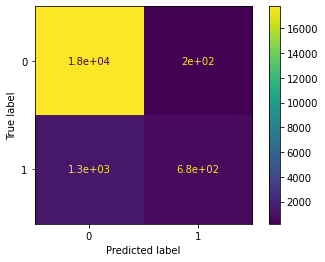

In [685]:
cm_display_cb_full = ConfusionMatrixDisplay(confusion_matrix = resultados_cm.reshape(2,2), display_labels = [0, 1])
cm_display_cb_full.plot()
plt.show()


<br>

<br>

<font size='5' style="color:orange">  <b> MLP Classifier - Default </b> </font>
<a name="mlp_default"></a>

[[ Back to Top ]](#content)

In [272]:
# Multi-layer Perceptron Classifier - Full dataset

# En este caso se definieron los parámetros random_state y max_iter de forma aleatoria, tal que no arrojara un error el modelo.

mlpc = MLPClassifier(random_state = 1, max_iter = 30000)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

mlpc_full_results    = []
mlpc_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    mlpc.fit(X_train, y_train)
    
    y_pred = mlpc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    mlpc_full_results.append(list_results)
    mlpc_full_results_cm.append(list_cm)

In [274]:
filas    = ['MLPClassifier']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(mlpc_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
MLPClassifier,0.56049,0.296374,0.38538


In [276]:
# Tiempo expresado en segundos

resultados['TIEMPO'] = 2115
resultados

,PRECISION,RECALL,F1,TIEMPO
MLPClassifier,0.56049,0.296374,0.38538,2115


In [277]:
resultados.to_pickle("resultados_mlpc_full.pkl")

In [278]:
resultados_cm = gmean(mlpc_full_results_cm)
resultados_cm 

array([[[17785.59555733,   204.21098244],
        [ 1333.56875514,   675.8427233 ]]])

In [279]:
 with open('resultados_mlpc_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Linear Discriminant Analysis - Default </b> </font>
<a name="lda_default"></a>

[[ Back to Top ]](#content)

In [176]:
# Linear Discriminant Analysis - Full dataset

lda = LinearDiscriminantAnalysis()

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lda_full_results    = []
lda_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lda.fit(X_train, y_train)
    
    y_pred = lda.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lda_full_results.append(list_results)
    lda_full_results_cm.append(list_cm)

In [178]:
filas    = ['LinearDiscriminantAnalysis_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lda_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LinearDiscriminantAnalysis_full,0.679732,0.27825,0.394843


In [180]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 46
resultados

,PRECISION,RECALL,F1,TIEMPO
LinearDiscriminantAnalysis_full,0.679732,0.27825,0.394843,46


In [181]:
resultados.to_pickle("resultados_lda_full.pkl")

In [182]:
resultados_cm = gmean(lda_full_results_cm)
resultados_cm 

array([[[17726.69368638,   263.07119206],
        [ 1450.33167718,   559.22620181]]])

In [183]:
with open('resultados_lda_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Calibrated Classifier with GaussianNB - Default </b> </font>
<a name="cccv_default"></a>

[[ Back to Top ]](#content)

In [264]:
# Calibrated Classifier CV usando el GaussianNB como base_estimator - Full dataset


cccv = CalibratedClassifierCV(base_estimator = GaussianNB(), cv=3)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

cccv_full_results    = []
cccv_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    cccv.fit(X_train, y_train)
    
    y_pred = cccv.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    cccv_full_results.append(list_results)
    cccv_full_results_cm.append(list_cm)


In [266]:
filas    = ['CalibratedClassifierCV_GNB_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(cccv_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
CalibratedClassifierCV_GNB_full,0.703706,0.374022,0.488408


In [268]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 23
resultados

,PRECISION,RECALL,F1,TIEMPO
CalibratedClassifierCV_GNB_full,0.703706,0.374022,0.488408,23


In [269]:
resultados.to_pickle("resultados_cccv_full.pkl")

In [270]:
resultados_cm= gmean(cccv_full_results_cm)
resultados_cm 

array([[[17673.58940928,   315.99414586],
        [ 1257.78470333,   751.70959561]]])

In [271]:
with open('resultados_cccv_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> SGD Classifier - Default </b> </font>
<a name="sgdc_default"></a>

[[ Back to Top ]](#content)

In [184]:
# Stochastic Gradient Descent Classifier - Full dataset

sgd = SGDClassifier()

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

sgd_full_results    = []
sgd_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sgd.fit(X_train, y_train)
    
    y_pred = sgd.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    sgd_full_results.append(list_results)
    sgd_full_results_cm.append(list_cm)

In [186]:
filas    = ['SGDClassifier_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(sgd_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
SGDClassifier_full,0.561299,0.142723,0.175951


In [188]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 249
resultados

,PRECISION,RECALL,F1,TIEMPO
SGDClassifier_full,0.561299,0.142723,0.175951,249


In [189]:
resultados.to_pickle("resultados_sgd_full.pkl")

In [190]:
resultados_cm = gmean(sgd_full_results_cm)
resultados_cm 

C:\Users\denun\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:279: RuntimeWarning:

divide by zero encountered in log



array([[[17026.19606039,     0.        ],
        [ 1317.26200083,   286.84415277]]])

In [191]:
with open('resultados_sgd_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Bagging Classifier - Default </b> </font>
<a name="bgc_default"></a>

[[ Back to Top ]](#content)

In [209]:
# Bagging Classifier  - Full dataset

bgc = BaggingClassifier()

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

bgc_full_results    = []
bgc_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    bgc.fit(X_train, y_train)
    
    y_pred = bgc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    bgc_full_results.append(list_results)
    bgc_full_results_cm.append(list_cm)

In [211]:
filas    = ['BaggingClassifier_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(bgc_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
BaggingClassifier_full,0.5046,0.029268,0.055316


In [213]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 11163
resultados

,PRECISION,RECALL,F1,TIEMPO
BaggingClassifier_full,0.5046,0.029268,0.055316,11163


In [214]:
resultados.to_pickle("resultados_bgc_full.pkl")

In [215]:
resultados_cm = gmean(bgc_full_results_cm)
resultados_cm 

array([[[17932.29863349,    57.48015103],
        [ 1950.69121943,    58.82235827]]])

In [216]:
 with open('resultados_bgc_full_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Models with default parameters - Summary </b> </font>
<a name="summary_default"></a>

[[ Back to Top ]](#content)

Se realiza un gráfico que permita comparar el recall y el tiempo de ejecución de cada uno de los modelos.

In [288]:
resultados_lgr_full = pd.read_pickle('resultados_lgr_full.pkl')
resultados_gnb_full = pd.read_pickle("resultados_gnb_full.pkl")
resultados_rfc_full = pd.read_pickle("resultados_rfc_full.pkl")
resultados_knc_full = pd.read_pickle('resultados_knc_full.pkl')
resultados_xgb_full = pd.read_pickle('resultados_xgb_full.pkl')
resultados_cb_full = pd.read_pickle('resultados_cb_full2.pkl')
resultados_mlpc_full = pd.read_pickle('resultados_mlpc_full.pkl')
resultados_lda_full = pd.read_pickle('resultados_lda_full.pkl')
resultados_cccv_full = pd.read_pickle('resultados_cccv_full.pkl')
resultados_sgd_full = pd.read_pickle("resultados_sgd_full.pkl")
resultados_bgc_full = pd.read_pickle("resultados_bgc_full.pkl")

In [289]:
df_resultados_default= pd.concat([resultados_lgr_full,
                                  resultados_gnb_full,
                                  resultados_rfc_full,
                                  resultados_knc_full,
                                  resultados_xgb_full,
                                  resultados_cb_full,
                                  resultados_mlpc_full,
                                  resultados_lda_full,
                                  resultados_cccv_full,
                                  resultados_sgd_full,
                                  resultados_bgc_full])
df_resultados_default

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_full,0.685480,0.269483,0.386856,1081.00
GaussianNB_full,0.647487,0.403787,0.497367,6.07
RandomForestClassifier_full,0.000000,0.000000,0.000000,5978.00
KNeighborsClassifier_full,0.223142,0.003169,0.006247,781.00
XGBoost_full,0.693811,0.247841,0.365173,1493.00
CatboostClassifier_full,0.767672,0.336274,0.467646,631.00
MLPClassifier,0.560490,0.296374,0.385380,2115.00
LinearDiscriminantAnalysis_full,0.679732,0.278250,0.394843,46.00
CalibratedClassifierCV_GNB_full,0.703706,0.374022,0.488408,23.00
SGDClassifier_full,0.561299,0.142723,0.175951,249.00


In [290]:
df_resultados_default.to_pickle('df_resultados_default.pkl')

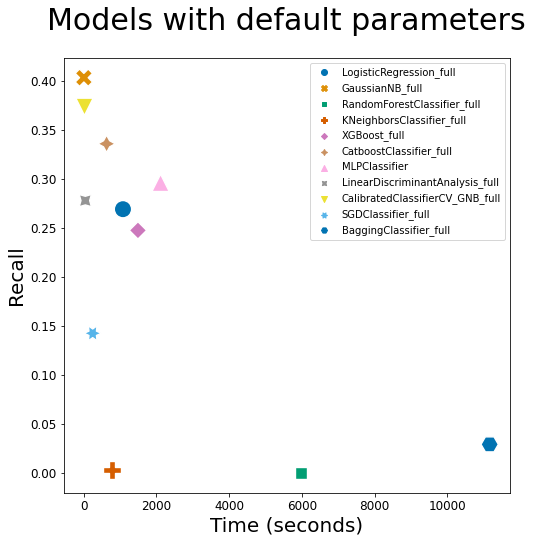

In [420]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = df_resultados_default, x = df_resultados_default['TIEMPO'],y = df_resultados_default['RECALL'], 
                hue = df_resultados_default.index, style = df_resultados_default.index, palette = 'colorblind', s = 300) 
plt.xlabel('Time (seconds)', y = -0.8, fontsize = 20)
plt.ylabel('Recall', x = -1, fontsize = 20)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Models with default parameters', y = 1.05, fontsize = 30)
plt.show()

<br>

<br>

<br>

<br>

<font size='6' style="color:orange">  <b> Models - PCA </b> </font>
<a name="PCA"></a>

[[ Back to Top ]](#content)

A continuación se entrenará nuevamente a los modelos Logistic Regression y K Neighbors Classifier  reduciendo su dimensionalidad a 100, 125, 150 y 175 components utilizando PCA (Principal Component Analysis).

In [12]:
pca_100 = PCA(n_components = 100)
pca_125 = PCA(n_components = 125)
pca_150 = PCA(n_components = 150)
pca_175 = PCA(n_components = 175)

<br>

<font size='5' style="color:orange">  <b> Logistic Regression - PCA </b> </font>
<a name="lgr_pca"></a>

[[ Back to Top ]](#content)

<br>

In [67]:
# Logistic Regression - PCA 100

lgr = LogisticRegression(solver='lbfgs', max_iter=7000)
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_100_results    = []
lgr_100_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = pca_100.fit_transform(X.iloc[train_index]), pca_100.transform(X.iloc[test_index])
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_100_results.append(list_results)
    lgr_100_results_cm.append(list_cm)
    

In [69]:
filas    = ['LogisticRegression_100']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_100_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_100,0.639638,0.084301,0.148939


In [71]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 34
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_100,0.639638,0.084301,0.148939,34


In [72]:
resultados.to_pickle("resultados_lgr_100.pkl")

In [73]:
resultados_cm = gmean(lgr_100_results_cm)
resultados_cm 

array([[[17894.49445006,    94.61878469],
        [ 1840.07616092,   169.42818354]]])

In [74]:
with open('resultados_lgr_100_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

In [75]:
# Logistic Regression - PCA 125

lgr = LogisticRegression(solver='lbfgs', max_iter=7000)
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_125_results    = []
lgr_125_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = pca_125.fit_transform(X.iloc[train_index]), pca_125.transform(X.iloc[test_index])
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_125_results.append(list_results)
    lgr_125_results_cm.append(list_cm)

In [77]:
filas    = ['LogisticRegression_125']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_125_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_125,0.64735,0.124122,0.208257


In [79]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 43
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_125,0.64735,0.124122,0.208257,43


In [80]:
resultados.to_pickle("resultados_lgr_125.pkl")

In [81]:
resultados_cm = gmean(lgr_125_results_cm)
resultados_cm 

array([[[17854.09479855,   135.4514716 ],
        [ 1759.83630043,   249.46007195]]])

In [82]:
with open('resultados_lgr_125_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

In [83]:
# Logistic Regression - PCA 150

lgr = LogisticRegression(solver='lbfgs', max_iter=7000)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_150_results    = []
lgr_150_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = pca_150.fit_transform(X.iloc[train_index]), pca_150.transform(X.iloc[test_index])
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_150_results.append(list_results)
    lgr_150_results_cm.append(list_cm)

In [85]:
filas    = ['LogisticRegression_150']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_150_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_150,0.668582,0.183076,0.287419


In [87]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 53
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_150,0.668582,0.183076,0.287419,53


In [88]:
resultados.to_pickle("resultados_lgr_150.pkl")

In [89]:
resultados_cm = gmean(lgr_150_results_cm)
resultados_cm 

array([[[17807.69342463,   181.85701948],
        [ 1641.66779244,   367.94606223]]])

In [90]:
with open('resultados_lgr_150_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

<br>

In [91]:
# Logistic Regression - PCA 175

lgr = LogisticRegression(solver='lbfgs', max_iter=7000)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_175_results    = []
lgr_175_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_175_results.append(list_results)
    lgr_175_results_cm.append(list_cm)

In [93]:
filas    = ['LogisticRegression_175']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_175_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_175,0.672872,0.212669,0.323155


In [95]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = 43
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_175,0.672872,0.212669,0.323155,43


In [96]:
resultados.to_pickle("resultados_lgr_175.pkl")

In [97]:
resultados_cm = gmean(lgr_175_results_cm)
resultados_cm 

array([[[17782.09007249,   207.24470003],
        [ 1582.27905521,   427.42203455]]])

In [98]:
with open('resultados_lgr_175_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<font size='4' style="color:orange">  <b> Logistic Regression - Summary </b> </font>

In [333]:
resultados_lgr_100 = pd.read_pickle('resultados_lgr_100.pkl')
resultados_lgr_125 = pd.read_pickle('resultados_lgr_125.pkl')
resultados_lgr_150 = pd.read_pickle('resultados_lgr_150.pkl')
resultados_lgr_175 = pd.read_pickle('resultados_lgr_175.pkl')
resultados_lgr_full = pd.read_pickle('resultados_lgr_full.pkl')

In [334]:
df_resultados_lgr_pca= pd.concat([resultados_lgr_100,
                                resultados_lgr_125,
                                resultados_lgr_150,
                                resultados_lgr_175,
                                resultados_lgr_full])
df_resultados_lgr_pca

,PRECISION,RECALL,F1,TIEMPO
,,,,
LogisticRegression_100,0.639638,0.084301,0.148939,34
LogisticRegression_125,0.647350,0.124122,0.208257,43
LogisticRegression_150,0.668582,0.183076,0.287419,53
LogisticRegression_175,0.672872,0.212669,0.323155,43
LogisticRegression_full,0.685480,0.269483,0.386856,1081


In [335]:
df_resultados_lgr_pca.to_pickle('df_resultados_lgr_pca.pkl')

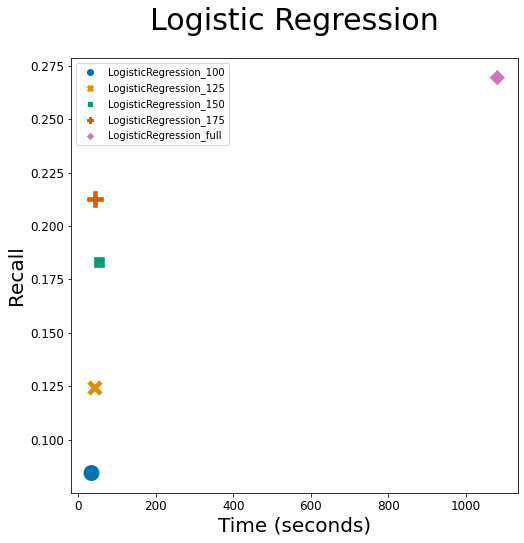

In [421]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = df_resultados_lgr_pca, x = df_resultados_lgr_pca['TIEMPO'],y = df_resultados_lgr_pca['RECALL'], 
                hue = df_resultados_lgr_pca.index, style = df_resultados_lgr_pca.index, palette = 'colorblind', s = 300) 
plt.xlabel('Time (seconds)', y = -0.8, fontsize = 20)
plt.ylabel('Recall', x = -1, fontsize = 20)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Logistic Regression', y = 1.05, fontsize = 30)
plt.show()

<br>

<br>

<font size='5' style="color:orange">  <b> K Neighbors Classifier - PCA </b> </font>
<a name="knc_pca"></a>

[[ Back to Top ]](#content)

In [194]:
# KNeighborsClassifier - PCA 175

knc = KNeighborsClassifier()
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

knc_175_results    = []
knc_175_results_cm = []

tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = pca_175.fit_transform(X.iloc[train_index]),  pca_175.transform(X.iloc[test_index])
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knc.fit(X_train, y_train)
    
    y_pred = knc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    knc_175_results.append(list_results)
    knc_175_results_cm.append(list_cm)

fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [195]:
filas    = ['KNeighborsClassifier_175']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(knc_175_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
KNeighborsClassifier_175,0.220253,0.003159,0.006227


In [196]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
KNeighborsClassifier_175,0.220253,0.003159,0.006227,797.940231


In [197]:
resultados.to_pickle("resultados_knc_175.pkl")

In [198]:
resultados_cm = gmean(knc_175_results_cm)
resultados_cm 

array([[[1.79683994e+04, 2.12055902e+01],
        [2.00229705e+03, 6.34910406e+00]]])

In [199]:
with open('resultados_knc_175_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

Teniendo en cuenta que el recall del K Neighbors Classifier es bajo y su tiempo de ejecución alto, no se buscarán las métricas para los PCA 100, 125 y 150.

<br>

<font size='4' style="color:orange">  <b> K Neighbors Classifier - Summary </b> </font>

In [349]:
resultados_knc_175 = pd.read_pickle('resultados_knc_175.pkl')
resultados_knc_full = pd.read_pickle('resultados_knc_full.pkl')

df_resultados_knc_pca = pd.concat([ resultados_knc_175,
                                   resultados_knc_full])

df_resultados_knc_pca.to_pickle("resultados_knc_pca.pkl")

df_resultados_knc_pca

,PRECISION,RECALL,F1,TIEMPO
,,,,
KNeighborsClassifier_175,0.220253,0.003159,0.006227,797.940231
KNeighborsClassifier_full,0.223142,0.003169,0.006247,781.000000


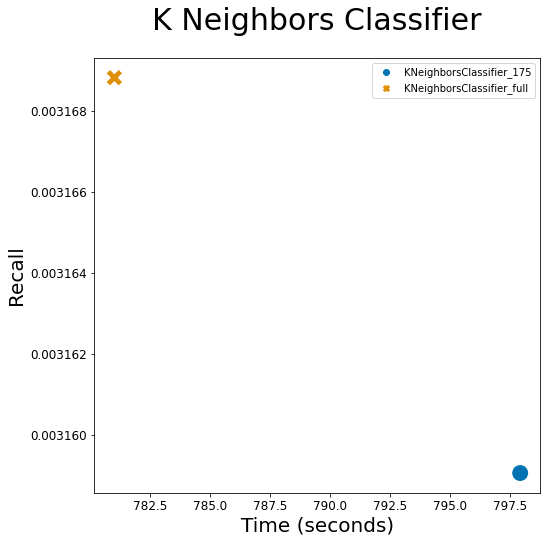

In [423]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = df_resultados_knc_pca, x = df_resultados_knc_pca['TIEMPO'],y = df_resultados_knc_pca['RECALL'], 
                hue = df_resultados_knc_pca.index, style = df_resultados_knc_pca.index, palette = 'colorblind', s = 300) 
plt.xlabel('Time (seconds)', y = -0.8, fontsize = 20)
plt.ylabel('Recall', x = -1, fontsize = 20)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('K Neighbors Classifier', y = 1.05, fontsize = 30)
plt.show()

<br>

<br>

<br>

<font size='6' style="color:orange">  <b> Optuna </b> </font>
<a name="optuna"></a>

[[ Back to Top ]](#content)

<p style='text-align: justify;'> 
Utilizando la libraría Optuna se buscará optimizar los hipermarámetros de los algoritmos Logistic Regression y K Neighbors Classifier, de forma tal que los modelos arrojen mejores resultados que los obtenidos con los hiperparámetros default.

<p style='text-align: justify;'> 
Cabe aclarar que el dataset completo contiene 201 variables y 200 000 registros, motivo por el cual realizar la optimización de hiperparámetros con el dataset completo requiere de mayor tiempo y poder computacional. Es por ello que se buscará optimizar los modelos utilizando un dataset con reducción de dimensionalidad. Luego se comprobará si esos hiperparámetros optimizados pueden ser también utilizados para los modelos que utilizan el fulldataset. 

<br>

<font size='5' style="color:orange">  <b> Logistic Regression - Optuna </b> </font>
<a name="lgr_opt"></a>

[[ Back to Top ]](#content)

Se optimizarán los hiperparámetros del modelo Logistic Regression para PCA 100, PCA 175 y full dataset.

Se debe tener en cuenta que el Recall del modelo Logistic Regression para el full dataset es de 0.269483. Por lo que con la optimización de hiperparámetros se tiene como objetivo el obtener un mejor Recall que el mencionado.

<br>

<font size='4' style="color:orange">  <b> Logistic Regression - PCA 100 </b> </font>
<a name="lgr_opt_100"></a>

[[ Back to Top ]](#content)

<br>

Logistic Regression PCA 100 - Study 1

In [228]:
# Se busca optimizar los hiperparámetros 'solver' y 'max_iter'.

def objective_lgr_100_1(trial):
    solver_trial = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter_trial = trial.suggest_int('max_iter', 5000,35000)

    lgr = LogisticRegression(solver = solver_trial, max_iter = max_iter_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_100_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_100.fit_transform(X.iloc[train_index]), pca_100.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_100_results.append(list_results)
    
        
    return gmean(lgr_100_results)   

In [229]:
study_lgr_100_1 = optuna.create_study(direction='maximize')
study_lgr_100_1.optimize(objective_lgr_100_1, n_trials=200)

[I 2022-11-10 13:14:48,118] A new study created in memory with name: no-name-28f9ce4e-2365-40b3-b469-7e11f17bfb7e
[I 2022-11-10 13:16:16,366] Trial 0 finished with value: 0.08384793266870955 and parameters: {'solver': 'sag', 'max_iter': 8641}. Best is trial 0 with value: 0.08384793266870955.
[I 2022-11-10 13:16:48,639] Trial 1 finished with value: 0.08552246458808954 and parameters: {'solver': 'lbfgs', 'max_iter': 9731}. Best is trial 1 with value: 0.08552246458808954.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\minicon

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

[I 2022-11-10 14:02:41,793] Trial 51 finished with value: 0.0845807213242351 and parameters: {'solver': 'lbfgs', 'max_iter': 34287}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 14:03:15,322] Trial 52 finished with value: 0.08563133625168341 and parameters: {'solver': 'lbfgs', 'max_iter': 20256}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 14:03:48,721] Trial 53 finished with value: 0.08306797227318621 and parameters: {'solver': 'lbfgs', 'max_iter': 22690}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 14:04:22,409] Trial 54 finished with value: 0.08338501874357081 and parameters: {'solver': 'lbfgs', 'max_iter': 20557}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 14:04:55,805] Trial 55 finished with value: 0.08368854280752827 and parameters: {'solver': 'lbfgs', 'max_iter': 25110}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 14:05:58,996] Trial 56 finished with value: 0.08295253310277043 and

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

[I 2022-11-10 14:31:42,198] Trial 87 finished with value: 0.08457368972682006 and parameters: {'solver': 'lbfgs', 'max_iter': 23341}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 14:32:15,127] Trial 88 finished with value: 0.08440213754144776 and parameters: {'solver': 'lbfgs', 'max_iter': 20657}. Best is trial 29 with value: 0.08659027930342719.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

[I 2022-11-10 14:52:45,552] Trial 108 finished with value: 0.08359175772967214 and parameters: {'solver': 'newton-cg', 'max_iter': 7884}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 14:53:57,336] Trial 109 finished with valu

[I 2022-11-10 15:05:39,316] Trial 121 finished with value: 0.08382635764202416 and parameters: {'solver': 'lbfgs', 'max_iter': 18149}. Best is trial 29 with value: 0.08659027930342719.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

[I 2022-11-10 15:38:56,348] Trial 156 finished with value: 0.08275687219112186 and parameters: {'solver': 'newton-cg', 'max_iter': 6162}. Best is trial 29 with value: 0.08659027930342719.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimi

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

[I 2022-11-10 15:46:50,515] Trial 164 finished with value: 0.08499604901298187 and parameters: {'solver': 'newton-cg', 'max_iter': 8505}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 15:47:24,478] Trial 165 finished with valu

[I 2022-11-10 15:59:34,132] Trial 177 finished with value: 0.08367548748830239 and parameters: {'solver': 'saga', 'max_iter': 28786}. Best is trial 29 with value: 0.08659027930342719.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

[I 2022-11-10 16:10:43,045] Trial 195 finished with value: 0.08367795285141925 and parameters: {'solver': 'newton-cg', 'max_iter': 7857}. Best is trial 29 with value: 0.08659027930342719.
[I 2022-11-10 16:11:16,848] Trial 196 finished with value: 0.08481958933526465 and parameters: {'solver': 'lbfgs', 'max_iter': 26857}. Best is trial 29 with value: 0.08659027930342719.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorith

In [230]:
joblib.dump(study_lgr_100_1, "study_lgr100_1.pkl")

['study_lgr100_1.pkl']

In [374]:
study_lgr_100_1 = joblib.load("study_lgr100_1.pkl")

In [231]:
print('Best Value: {}'.format(study_lgr_100_1.best_value))
print('Best Parameters: {}'.format(study_lgr_100_1.best_params))

Best Value: 0.08659027930342719
Best Parameters: {'solver': 'newton-cg', 'max_iter': 7590}


In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_100_1)

In [ ]:
optuna.visualization.plot_param_importances(study_lgr_100_1)

In [ ]:
optuna.visualization.plot_slice(study_lgr_100_1)

<br>

Logistic Regression PCA 100 - Study 2

In [312]:
# Se utiliza 'max_iter' =  7590 obtenido del study 1 y se busca optimizar el hiperparámetro 'solver'.

def objective_lgr_100_2(trial):
    solver_trial = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

    lgr = LogisticRegression(solver = solver_trial, max_iter =  7590)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_100_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_100.fit_transform(X.iloc[train_index]), pca_100.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_100_results.append(list_results)
    
        
    return gmean(lgr_100_results)   

In [313]:
study_lgr_100_2 = optuna.create_study(direction='maximize')
study_lgr_100_2.optimize(objective_lgr_100_2, n_trials=6)

[I 2022-11-12 14:50:53,468] A new study created in memory with name: no-name-8e783b3c-1272-4ba6-93ae-44b909b05212
[I 2022-11-12 14:52:08,164] Trial 0 finished with value: 0.08416825477201041 and parameters: {'solver': 'liblinear'}. Best is trial 0 with value: 0.08416825477201041.
[I 2022-11-12 14:52:40,252] Trial 1 finished with value: 0.08383175878317704 and parameters: {'solver': 'lbfgs'}. Best is trial 0 with value: 0.08416825477201041.
[I 2022-11-12 14:53:48,206] Trial 2 finished with value: 0.08215651349960994 and parameters: {'solver': 'saga'}. Best is trial 0 with value: 0.08416825477201041.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge


In [314]:
joblib.dump(study_lgr_100_2, "study_lgr100_2.pkl")

['study_lgr100_2.pkl']

In [380]:
study_lgr_100_2 = joblib.load("study_lgr100_2.pkl")

In [315]:
print('Best Value: {}'.format(study_lgr_100_2.best_value))
print('Best Parameters: {}'.format(study_lgr_100_2.best_params))

Best Value: 0.08448839539839466
Best Parameters: {'solver': 'liblinear'}


In [ ]:
optuna.visualization.plot_slice(study_lgr_100_2)

<br>

Logistic Regression PCA 100 - Study 3

In [317]:
# Se busca optimizar de nuevo los hiperparámetros 'solver' y 'max_trial' teniendo en cuenta los rangos donde se obtuvo 
# mejores resultados en el study 1.

def objective_lgr_100_3(trial):
    solver_trial = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'saga'])
    max_iter_trial = trial.suggest_int('max_iter', 7000,11000)

    lgr = LogisticRegression(solver = solver_trial, max_iter = max_iter_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_100_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_100.fit_transform(X.iloc[train_index]), pca_100.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_100_results.append(list_results)
    
        
    return gmean(lgr_100_results)  

In [318]:
study_lgr_100_3 = optuna.create_study(direction='maximize')
study_lgr_100_3.optimize(objective_lgr_100_3, n_trials=100)

[I 2022-11-12 15:03:36,366] A new study created in memory with name: no-name-2a682a03-c9f0-4c78-a179-40653060fa9a
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did n

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

[I 2022-11-12 16:15:31,790] Trial 92 finished with value: 0.08314203219455693 and parameters: {'solver': 'saga', 'max_iter': 9699}. Best is trial 51 with value: 0.08621953266938626.
[I 2022-11-12 16:16:33,512] Trial 93 finished with value: 0.08400924496250205 and parameters: {'solver': 'saga', 'max_iter': 10207}. Best is trial 51 with value: 0.08621953266938626.
[I 2022-11-12 16:17:36,542] Trial 94 finished with value: 0.08403206934079979 and parameters: {'solver': 'saga', 'max_iter': 10400}. Best is trial 51 with value: 0.08621953266938626.
[I 2022-11-12 16:18:40,510] Trial 95 finished with value: 0.08283700141402592 and parameters: {'solver': 'saga', 'max_iter': 9961}. Best is trial 51 with value: 0.08621953266938626.
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\min

In [319]:
joblib.dump(study_lgr_100_3, "study_lgr100_3.pkl")

['study_lgr100_3.pkl']

In [382]:
study_lgr_100_3 = joblib.load("study_lgr100_3.pkl")

In [321]:
print('Best Value: {}'.format(study_lgr_100_3.best_value))
print('Best Parameters: {}'.format(study_lgr_100_3.best_params))

Best Value: 0.08621953266938626
Best Parameters: {'solver': 'lbfgs', 'max_iter': 7711}


In [ ]:
optuna.visualization.plot_slice(study_lgr_100_3)

In [ ]:
optuna.visualization.plot_param_importances(study_lgr_100_3)

In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_100_3)

<br>

Se utilizarán en el full dataset los hiperparámetros con los que se obtuvo mejores resultados en la Logistic Regression PCA 100. Dichos hiperparámetros son 'solver' = 'newton-cg' y 'max_iter' = 7590.

In [554]:
# Logistic Regression - Full dataset

lgr = LogisticRegression( max_iter= 7590 , solver = 'newton-cg')


skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_full_results    = []
lgr_full_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_full_results.append(list_results)
    lgr_full_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search failed

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning:

The line search algorithm did not converge

C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning:

Line Search 

In [555]:
filas    = ['LogisticRegression_full_opt(PCA100)']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_full_opt(PCA100),0.685319,0.26778,0.385072


In [556]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_full_opt(PCA100),0.685319,0.26778,0.385072,448.738785


In [557]:
resultados.to_pickle("resultados_lgr_full_opt_PCA100.pkl")

In [558]:
resultados_cm= gmean(lgr_full_results_cm)
resultados_cm 

array([[[17743.09527386,   246.75603909],
        [ 1471.32100098,   538.18511381]]])

In [559]:
with open('LogisticRegression_full_opt_PCA100_cm.pkl','wb') as f:
        pickle.dump(resultados_cm, f)

El resultado obtenido por el modelo que emplea los hiperparámetros 'solver' = 'newton-cg' y 'max_iter' = 7590 en el fulldataset es inferior al obtenido con los hiperparámetros default.

<br>

<font size='4' style="color:orange">  <b> Logistic Regression - PCA 175 </b> </font>
<a name="lgr_opt_175"></a>

[[ Back to Top ]](#content)

<br>

Logistic Regression PCA 175 - Study 1

In [107]:
# Se busca optimizar los hiperparámetros 'solver' y 'max_iter'.

def objective_lgr_175_1(trial):
    solver_trial = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter_trial = trial.suggest_int('max_iter', 5000,35000)

    lgr = LogisticRegression(solver = solver_trial, max_iter = max_iter_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_175_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_175_results.append(list_results)
    
        
    return gmean(lgr_175_results)    

In [108]:
study_lgr_175_1 = optuna.create_study(direction='maximize')
study_lgr_175_1.optimize(objective_lgr_175_1, n_trials=150)

[I 2022-11-08 19:23:26,941] A new study created in memory with name: no-name-30c82a41-4d92-4b76-9dc5-4986b0767b4c
[I 2022-11-08 19:24:29,564] Trial 0 finished with value: 0.21261873260391223 and parameters: {'solver': 'saga', 'max_iter': 11138}. Best is trial 0 with value: 0.21261873260391223.
[I 2022-11-08 19:25:11,554] Trial 1 finished with value: 0.21266894368678335 and parameters: {'solver': 'lbfgs', 'max_iter': 25721}. Best is trial 1 with value: 0.21266894368678335.
[I 2022-11-08 19:26:11,045] Trial 2 finished with value: 0.21266733674707322 and parameters: {'solver': 'saga', 'max_iter': 21922}. Best is trial 1 with value: 0.21266894368678335.
[I 2022-11-08 19:27:48,238] Trial 3 finished with value: 0.21242008752364527 and parameters: {'solver': 'sag', 'max_iter': 30647}. Best is trial 1 with value: 0.21266894368678335.
[I 2022-11-08 19:29:35,681] Trial 4 finished with value: 0.21242008752364527 and parameters: {'solver': 'sag', 'max_iter': 24598}. Best is trial 1 with value: 0.2

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:2

[I 2022-11-08 20:02:03,858] Trial 30 finished with value: 0.21266847382010026 and parameters: {'solver': 'saga', 'max_iter': 10058}. Best is trial 7 with value: 0.21276673741075677.
[I 2022-11-08 20:03:10,911] Trial 31 finished with value: 0.21266733674707322 and parameters: {'solver': 'saga', 'max_iter': 16259}. Best is trial 7 with value: 0.21276673741075677.
[I 2022-11-08 20:04:18,490] Trial 32 finished with value: 0.21271708933398648 and parameters: {'solver': 'saga', 'max_iter': 29333}. Best is trial 7 with value: 0.21276673741075677.
[I 2022-11-08 20:05:24,371] Trial 33 finished with value: 0.21266847382010026 and parameters: {'solver': 'saga', 'max_iter': 23049}. Best is trial 7 with value: 0.21276673741075677.
[I 2022-11-08 20:06:27,752] Trial 34 finished with value: 0.21266847382010026 and parameters: {'solver': 'saga', 'max_iter': 20608}. Best is trial 7 with value: 0.21276673741075677.
[I 2022-11-08 20:08:10,626] Trial 35 finished with value: 0.2123701709017896 and parameter

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:2

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:2

C:\Users\denun\miniconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\denun\miniconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
[I 2022-11-08 21:11:19,147] Trial 87 finished with value: 0.21261873260391223 and parameters: {'solver': 'newton-cg', 'max_iter': 22569}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:12:24,477] Trial 88 finished with value: 0.21256751617754654 and parameters: {'solver': 'saga', 'max_iter': 8430}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:13:29,190] Trial 89 finished with value: 0.21261873260391223 and parameters: {'solver': 'saga', 'max_iter': 10813}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:14:33,617] Trial 90 finished with value: 0.21271869664963308 and parameters

[I 2022-11-08 21:35:46,461] Trial 109 finished with value: 0.21261908574747276 and parameters: {'solver': 'liblinear', 'max_iter': 12460}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:36:47,163] Trial 110 finished with value: 0.21271708933398648 and parameters: {'solver': 'saga', 'max_iter': 32942}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:37:46,225] Trial 111 finished with value: 0.21271708933398648 and parameters: {'solver': 'saga', 'max_iter': 13173}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:38:47,282] Trial 112 finished with value: 0.21266722010744832 and parameters: {'solver': 'saga', 'max_iter': 17241}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:39:51,953] Trial 113 finished with value: 0.21266733674707322 and parameters: {'solver': 'saga', 'max_iter': 11466}. Best is trial 62 with value: 0.2127673236443402.
[I 2022-11-08 21:40:55,637] Trial 114 finished with value: 0.2127673236443402 an

[I 2022-11-08 22:01:22,463] Trial 133 finished with value: 0.21266847382010026 and parameters: {'solver': 'saga', 'max_iter': 14015}. Best is trial 122 with value: 0.21281698344577693.
[I 2022-11-08 22:02:24,789] Trial 134 finished with value: 0.21271708933398648 and parameters: {'solver': 'saga', 'max_iter': 15338}. Best is trial 122 with value: 0.21281698344577693.
[I 2022-11-08 22:03:25,528] Trial 135 finished with value: 0.21276673741075677 and parameters: {'solver': 'saga', 'max_iter': 20260}. Best is trial 122 with value: 0.21281698344577693.
[I 2022-11-08 22:04:26,261] Trial 136 finished with value: 0.21266733674707322 and parameters: {'solver': 'saga', 'max_iter': 20203}. Best is trial 122 with value: 0.21281698344577693.
[I 2022-11-08 22:06:50,679] Trial 137 finished with value: 0.21261908574747276 and parameters: {'solver': 'liblinear', 'max_iter': 20937}. Best is trial 122 with value: 0.21281698344577693.
[I 2022-11-08 22:07:51,537] Trial 138 finished with value: 0.212767323

In [109]:
joblib.dump(study_lgr_175_1, "study_lgr175_1.pkl")

['study_lgr175_1.pkl']

In [386]:
study_lgr_175_1 = joblib.load("study_lgr175_1.pkl")

In [110]:
print('Best Value: {}'.format(study_lgr_175_1.best_value))
print('Best Parameters: {}'.format(study_lgr_175_1.best_params))

Best Value: 0.21281698344577693
Best Parameters: {'solver': 'saga', 'max_iter': 15176}


In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_175_1)

In [ ]:
optuna.visualization.plot_param_importances(study_lgr_175_1)

In [ ]:
optuna.visualization.plot_slice(study_lgr_175_1)

<br>

Logistic Regression PCA 175 - Study 2

In [114]:
# Se utiliza 'solver' = 'saga' obtenido del study 1 y se busca optimizar el hiperparámetro 'max_iter'.

def objective_lgr_175_2(trial):

    max_iter_trial = trial.suggest_int('max_iter', 10000,23000)

    lgr = LogisticRegression(solver = 'saga', max_iter = max_iter_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_175_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_175_results.append(list_results)
    
        
    return gmean(lgr_175_results) 

In [115]:
study_lgr_175_2 = optuna.create_study(direction='maximize')
study_lgr_175_2.optimize(objective_lgr_175_2, n_trials=70)

[I 2022-11-08 22:31:27,961] A new study created in memory with name: no-name-0691a5d1-3a93-4309-a466-fecb0e3ddb31
[I 2022-11-08 22:32:27,349] Trial 0 finished with value: 0.21261873260391223 and parameters: {'max_iter': 14608}. Best is trial 0 with value: 0.21261873260391223.
[I 2022-11-08 22:33:27,968] Trial 1 finished with value: 0.21271755930807992 and parameters: {'max_iter': 20523}. Best is trial 1 with value: 0.21271755930807992.
[I 2022-11-08 22:34:28,210] Trial 2 finished with value: 0.21276673741075677 and parameters: {'max_iter': 16367}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 22:35:32,553] Trial 3 finished with value: 0.21266894368678335 and parameters: {'max_iter': 20314}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 22:36:31,784] Trial 4 finished with value: 0.21266733674707322 and parameters: {'max_iter': 12563}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 22:37:31,889] Trial 5 finished with value: 0.212717089333

[I 2022-11-08 23:17:53,151] Trial 46 finished with value: 0.21266733674707322 and parameters: {'max_iter': 20268}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 23:18:50,593] Trial 47 finished with value: 0.21271708933398648 and parameters: {'max_iter': 12507}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 23:19:49,632] Trial 48 finished with value: 0.21266733674707322 and parameters: {'max_iter': 15910}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 23:20:48,416] Trial 49 finished with value: 0.21261873260391223 and parameters: {'max_iter': 14971}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 23:21:48,333] Trial 50 finished with value: 0.21261747918449223 and parameters: {'max_iter': 17150}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 23:22:47,558] Trial 51 finished with value: 0.21266768997136143 and parameters: {'max_iter': 18279}. Best is trial 2 with value: 0.21276673741075677.
[I 2022-11-08 23

In [116]:
joblib.dump(study_lgr_175_2, "study_lgr175_2.pkl")

['study_lgr175_2.pkl']

In [390]:
study_lgr_175_2 = joblib.load("study_lgr175_2.pkl")

In [117]:
print('Best Value: {}'.format(study_lgr_175_2.best_value))
print('Best Parameters: {}'.format(study_lgr_175_2.best_params))

Best Value: 0.2127673236443402
Best Parameters: {'max_iter': 20968}


In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_175_2)

In [ ]:
optuna.visualization.plot_slice(study_lgr_175_2)

<br>

Logistic Regression PCA 175 - Study 3

In [194]:
# Se utiliza 'solver' = 'saga' obtenido del study 1 y se busca optimizar el hiperparámetro 'max_iter' reduciendo el rango 
# que se había empleado en el study 2 e incrementando la cantidad de trials. 

def objective_lgr_175_3(trial):
    max_iter_trial = trial.suggest_int('max_iter', 15000,22000)

    lgr = LogisticRegression(solver = 'saga', max_iter = max_iter_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_175_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_175_results.append(list_results)
    
        
    return gmean(lgr_175_results) 

In [195]:
study_lgr_175_3 = optuna.create_study(direction='maximize')
study_lgr_175_3.optimize(objective_lgr_175_3, n_trials=150)

[I 2022-11-09 17:20:01,510] A new study created in memory with name: no-name-eb108a76-81b8-45c2-891a-eb8f8982bba6
[I 2022-11-09 17:21:03,058] Trial 0 finished with value: 0.21266847382010026 and parameters: {'max_iter': 17763}. Best is trial 0 with value: 0.21266847382010026.
[I 2022-11-09 17:22:02,708] Trial 1 finished with value: 0.21266733674707322 and parameters: {'max_iter': 15810}. Best is trial 0 with value: 0.21266847382010026.
[I 2022-11-09 17:23:01,301] Trial 2 finished with value: 0.21261873260391223 and parameters: {'max_iter': 16469}. Best is trial 0 with value: 0.21266847382010026.
[I 2022-11-09 17:24:00,976] Trial 3 finished with value: 0.21261747918449223 and parameters: {'max_iter': 20579}. Best is trial 0 with value: 0.21266847382010026.
[I 2022-11-09 17:25:02,003] Trial 4 finished with value: 0.21261873260391223 and parameters: {'max_iter': 19657}. Best is trial 0 with value: 0.21266847382010026.
[I 2022-11-09 17:26:04,000] Trial 5 finished with value: 0.212618615990

[I 2022-11-09 18:06:18,661] Trial 46 finished with value: 0.21266847382010026 and parameters: {'max_iter': 19347}. Best is trial 8 with value: 0.2127673236443402.
[I 2022-11-09 18:07:35,696] Trial 47 finished with value: 0.21261873260391223 and parameters: {'max_iter': 18721}. Best is trial 8 with value: 0.2127673236443402.
[I 2022-11-09 18:08:52,520] Trial 48 finished with value: 0.21266733674707322 and parameters: {'max_iter': 21175}. Best is trial 8 with value: 0.2127673236443402.
[I 2022-11-09 18:10:09,340] Trial 49 finished with value: 0.21266733674707322 and parameters: {'max_iter': 21620}. Best is trial 8 with value: 0.2127673236443402.
[I 2022-11-09 18:11:26,586] Trial 50 finished with value: 0.21271869664963308 and parameters: {'max_iter': 20341}. Best is trial 8 with value: 0.2127673236443402.
[I 2022-11-09 18:12:45,002] Trial 51 finished with value: 0.21271708933398648 and parameters: {'max_iter': 20473}. Best is trial 8 with value: 0.2127673236443402.
[I 2022-11-09 18:14:01

[I 2022-11-09 18:56:09,188] Trial 93 finished with value: 0.21266847382010026 and parameters: {'max_iter': 15698}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 18:57:08,119] Trial 94 finished with value: 0.21261747918449223 and parameters: {'max_iter': 18134}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 18:58:08,227] Trial 95 finished with value: 0.21271869664963308 and parameters: {'max_iter': 17087}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 18:59:07,966] Trial 96 finished with value: 0.21271708933398648 and parameters: {'max_iter': 17044}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 19:00:08,555] Trial 97 finished with value: 0.21271755930807992 and parameters: {'max_iter': 17489}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 19:01:07,406] Trial 98 finished with value: 0.2127673236443402 and parameters: {'max_iter': 17608}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-

[I 2022-11-09 19:42:30,262] Trial 139 finished with value: 0.21266847382010026 and parameters: {'max_iter': 16380}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 19:43:30,703] Trial 140 finished with value: 0.21266847382010026 and parameters: {'max_iter': 21066}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 19:44:32,296] Trial 141 finished with value: 0.21266847382010026 and parameters: {'max_iter': 21626}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 19:45:35,868] Trial 142 finished with value: 0.21266733674707322 and parameters: {'max_iter': 21835}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 19:46:41,121] Trial 143 finished with value: 0.21266733674707322 and parameters: {'max_iter': 21507}. Best is trial 69 with value: 0.21281698344577693.
[I 2022-11-09 19:47:49,233] Trial 144 finished with value: 0.21271708933398648 and parameters: {'max_iter': 21325}. Best is trial 69 with value: 0.21281698344577693.
[I 2

In [196]:
joblib.dump(study_lgr_175_3, "study_lgr175_3.pkl")

['study_lgr175_3.pkl']

In [394]:
study_lgr_175_3 = joblib.load("study_lgr175_3.pkl")

In [197]:
print('Best Value: {}'.format(study_lgr_175_3.best_value))
print('Best Parameters: {}'.format(study_lgr_175_3.best_params))

Best Value: 0.21281698344577693
Best Parameters: {'max_iter': 16186}


In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_175_3)

In [ ]:
optuna.visualization.plot_slice(study_lgr_175_3)

<br>

Logistic Regression PCA 175 - Study 4

In [240]:
# Se utiliza 'solver' = 'saga' obtenido del study 1 y se busca optimizar el hiperparámetro 'max_iter'. 
# A su vez, se incluye el hiperparámetro 'penalty' para optimizar.

def objective_lgr_175_4(trial):
 
    max_iter_trial = trial.suggest_int('max_iter', 16000,22000)
    penalty_trial = trial.suggest_categorical('penalty',['l2', 'none'])

    lgr = LogisticRegression(solver = 'saga', max_iter = max_iter_trial, penalty = penalty_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_175_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_175_results.append(list_results)
    
        
    return gmean(lgr_175_results) 

In [241]:
study_lgr_175_4 = optuna.create_study(direction='maximize')
study_lgr_175_4.optimize(objective_lgr_175_4, n_trials=150)

[I 2022-11-10 17:49:24,429] A new study created in memory with name: no-name-7b6c2d04-8386-4716-98a9-9ccbca74f421
[I 2022-11-10 17:50:31,946] Trial 0 finished with value: 0.21271744264091 and parameters: {'max_iter': 21145, 'penalty': 'none'}. Best is trial 0 with value: 0.21271744264091.
[I 2022-11-10 17:51:37,181] Trial 1 finished with value: 0.21266733674707322 and parameters: {'max_iter': 19086, 'penalty': 'l2'}. Best is trial 0 with value: 0.21271744264091.
[I 2022-11-10 17:52:41,123] Trial 2 finished with value: 0.21256888643604827 and parameters: {'max_iter': 20154, 'penalty': 'none'}. Best is trial 0 with value: 0.21271744264091.
[I 2022-11-10 17:53:50,671] Trial 3 finished with value: 0.21266733674707322 and parameters: {'max_iter': 17177, 'penalty': 'l2'}. Best is trial 0 with value: 0.21271744264091.
[I 2022-11-10 17:54:55,797] Trial 4 finished with value: 0.21266733674707322 and parameters: {'max_iter': 21963, 'penalty': 'l2'}. Best is trial 0 with value: 0.21271744264091.


[I 2022-11-10 18:35:57,596] Trial 42 finished with value: 0.21261747918449223 and parameters: {'max_iter': 16011, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 18:37:02,268] Trial 43 finished with value: 0.21261873260391223 and parameters: {'max_iter': 16293, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 18:38:07,816] Trial 44 finished with value: 0.21266733674707322 and parameters: {'max_iter': 16787, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 18:39:14,620] Trial 45 finished with value: 0.21261873260391223 and parameters: {'max_iter': 17482, 'penalty': 'l2'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 18:40:20,839] Trial 46 finished with value: 0.21271708933398648 and parameters: {'max_iter': 17019, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 18:41:24,991] Trial 47 finished with value: 0.21271869664963308 and 

[I 2022-11-10 19:22:24,181] Trial 84 finished with value: 0.21261873260391223 and parameters: {'max_iter': 19651, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 19:23:32,707] Trial 85 finished with value: 0.21271869664963308 and parameters: {'max_iter': 19192, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 19:24:36,960] Trial 86 finished with value: 0.21266847382010026 and parameters: {'max_iter': 18958, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 19:25:42,096] Trial 87 finished with value: 0.21271708933398648 and parameters: {'max_iter': 19974, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 19:26:50,050] Trial 88 finished with value: 0.21266768997136143 and parameters: {'max_iter': 19515, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 19:27:59,114] Trial 89 finished with value: 0.21271869664963308 an

[I 2022-11-10 20:11:15,288] Trial 126 finished with value: 0.21271755930807992 and parameters: {'max_iter': 16545, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 20:12:23,751] Trial 127 finished with value: 0.21261873260391223 and parameters: {'max_iter': 19198, 'penalty': 'l2'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 20:13:32,532] Trial 128 finished with value: 0.21266847382010026 and parameters: {'max_iter': 16304, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 20:14:41,508] Trial 129 finished with value: 0.21266722010744832 and parameters: {'max_iter': 19802, 'penalty': 'none'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 20:15:51,871] Trial 130 finished with value: 0.21266847382010026 and parameters: {'max_iter': 16787, 'penalty': 'l2'}. Best is trial 16 with value: 0.21281698344577693.
[I 2022-11-10 20:17:04,575] Trial 131 finished with value: 0.21266847382010026 

In [242]:
joblib.dump(study_lgr_175_4, "study_lgr175_4.pkl")

['study_lgr175_4.pkl']

In [398]:
study_lgr_175_4 = joblib.load("study_lgr175_4.pkl")

In [243]:
print('Best Value: {}'.format(study_lgr_175_4.best_value))
print('Best Parameters: {}'.format(study_lgr_175_4.best_params))

Best Value: 0.21281698344577693
Best Parameters: {'max_iter': 16457, 'penalty': 'none'}


In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_175_4)

In [ ]:
optuna.visualization.plot_param_importances(study_lgr_175_4)

In [ ]:
optuna.visualization.plot_slice(study_lgr_175_4)

<br>

Logistic Regression PCA 175 - Study 5

In [563]:
# Se utiliza 'solver' = 'saga' obtenido del study 1 y 'max_iter' = 16457 obtenido del study 4.
# Se busca optimizar el hiperparámetro 'penalty'.

def objective_lgr_175_5(trial):

    penalty_trial = trial.suggest_categorical('penalty',['l2', 'none'])

    lgr = LogisticRegression(solver = 'saga', max_iter = 16457, penalty = penalty_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_175_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_175_results.append(list_results)
    
        
    return gmean(lgr_175_results) 

In [570]:
study_lgr_175_5 = optuna.create_study(direction='maximize')
study_lgr_175_5.optimize(objective_lgr_175_5, n_trials= 6)

[I 2022-11-21 20:25:03,175] A new study created in memory with name: no-name-354eacbc-cbf2-4b2c-a4e2-cb311e25db3f
[I 2022-11-21 20:26:13,436] Trial 0 finished with value: 0.21281698344577693 and parameters: {'penalty': 'none'}. Best is trial 0 with value: 0.21281698344577693.
[I 2022-11-21 20:27:16,484] Trial 1 finished with value: 0.21261747918449223 and parameters: {'penalty': 'none'}. Best is trial 0 with value: 0.21281698344577693.
[I 2022-11-21 20:28:18,362] Trial 2 finished with value: 0.21266894368678335 and parameters: {'penalty': 'none'}. Best is trial 0 with value: 0.21281698344577693.
[I 2022-11-21 20:29:22,337] Trial 3 finished with value: 0.21266847382010026 and parameters: {'penalty': 'none'}. Best is trial 0 with value: 0.21281698344577693.
[I 2022-11-21 20:30:24,570] Trial 4 finished with value: 0.21266894368678335 and parameters: {'penalty': 'l2'}. Best is trial 0 with value: 0.21281698344577693.
[I 2022-11-21 20:31:32,628] Trial 5 finished with value: 0.21266733674707

In [575]:
print('Best Value: {}'.format(study_lgr_175_5.best_value))
print('Best Parameters: {}'.format(study_lgr_175_5.best_params))

Best Value: 0.21281698344577693
Best Parameters: {'penalty': 'none'}


In [571]:
joblib.dump(study_lgr_175_5, "study_lgr175_5.pkl")

['study_lgr175_5.pkl']

In [572]:
study_lgr_175_5 = joblib.load("study_lgr175_5.pkl")

In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_175_5)

In [ ]:
optuna.visualization.plot_slice(study_lgr_175_5)

<br>

Se utilizarán en el full dataset los hiperparámetros con los que se obtuvo mejores resultados en la Logistic Regression PCA 175. Dichos hiperparámetros son 'solver' = 'saga', 'max_iter' = 16457 y 'penalty' = 'none'.

In [576]:
# Logistic Regression - Full dataset

lgr = LogisticRegression( max_iter= 16457 , solver = 'saga', penalty = 'none')


skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_full_results    = []
lgr_full_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_full_results.append(list_results)
    lgr_full_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [577]:
filas    = ['LogisticRegression_full_opt(PCA175)']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_full_opt(PCA175),0.691913,0.257079,0.374857


In [578]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_full_opt(PCA175),0.691913,0.257079,0.374857,462.47266


In [579]:
resultados.to_pickle("resultados_lgr_full_opt_PCA175")

In [580]:
resultados_cm= gmean(lgr_full_results_cm)
resultados_cm 

array([[[17760.09394508,   229.61845735],
        [ 1492.95722629,   516.67663606]]])

In [581]:
with open('LogisticRegression_full_opt_PCA175_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

El resultado obtenido por el modelo que emplea los hiperparámetros 'solver' = 'saga', 'max_iter' = 16457 y penalty = 'none' en el fulldataset es inferior al obtenido con los hiperparámetros default.

<br>

<br>

<font size='4' style="color:orange">  <b> Logistic Regression - Full Dataset </b> </font>
<a name="lgr_opt_full"></a>

[[ Back to Top ]](#content)

Teniendo en cuenta que los hiperparámetros optimizados con PCA 100 y 175 no se pueden extrapolar al fulldataset, se buscará optimizar el dataset completo.

<br>

Logistic Regression Full Dataset - Study 1

In [161]:
# Se busca optimizar los hiperparámetros 'solver' y 'max_iter'.

def objective_lgr_1(trial):
    
    solver_trial = trial.suggest_categorical('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter_trial = trial.suggest_int('max_iter', 7000,30000, 250)


    lgr = LogisticRegression(solver = solver_trial, max_iter = max_iter_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_results.append(list_results)
    
        
    return gmean(lgr_results)  

In [162]:
study_lgr_1 = optuna.create_study(direction='maximize')
study_lgr_1.optimize(objective_lgr_1, n_trials=30)

[I 2022-11-15 22:04:40,622] A new study created in memory with name: no-name-14845ca1-fd6e-4ae8-a38d-0fbb42fbba5f
[I 2022-11-15 22:12:17,471] Trial 0 finished with value: 0.2571786091744804 and parameters: {'solver': 'saga', 'max_iter': 9750}. Best is trial 0 with value: 0.2571786091744804.
[I 2022-11-15 22:42:03,337] Trial 1 finished with value: 0.269193094004635 and parameters: {'solver': 'liblinear', 'max_iter': 20000}. Best is trial 1 with value: 0.269193094004635.
[I 2022-11-15 22:48:03,940] Trial 2 finished with value: 0.26211328355076136 and parameters: {'solver': 'sag', 'max_iter': 18500}. Best is trial 1 with value: 0.269193094004635.
[I 2022-11-15 23:15:17,239] Trial 3 finished with value: 0.269193094004635 and parameters: {'solver': 'liblinear', 'max_iter': 11750}. Best is trial 1 with value: 0.269193094004635.
[I 2022-11-15 23:21:57,701] Trial 4 finished with value: 0.25718269642735475 and parameters: {'solver': 'saga', 'max_iter': 9500}. Best is trial 1 with value: 0.26919

[I 2022-11-16 02:34:45,332] Trial 17 finished with value: 0.26948326587553645 and parameters: {'solver': 'lbfgs', 'max_iter': 8500}. Best is trial 9 with value: 0.26948326587553645.
[I 2022-11-16 02:51:28,581] Trial 18 finished with value: 0.26948326587553645 and parameters: {'solver': 'lbfgs', 'max_iter': 7000}. Best is trial 9 with value: 0.26948326587553645.
[I 2022-11-16 03:08:10,674] Trial 19 finished with value: 0.26948326587553645 and parameters: {'solver': 'lbfgs', 'max_iter': 29750}. Best is trial 9 with value: 0.26948326587553645.
[I 2022-11-16 03:14:02,507] Trial 20 finished with value: 0.2617676429011556 and parameters: {'solver': 'sag', 'max_iter': 12750}. Best is trial 9 with value: 0.26948326587553645.
[I 2022-11-16 03:30:43,024] Trial 21 finished with value: 0.26948326587553645 and parameters: {'solver': 'lbfgs', 'max_iter': 7000}. Best is trial 9 with value: 0.26948326587553645.
[I 2022-11-16 03:47:30,637] Trial 22 finished with value: 0.26948326587553645 and parameter

In [163]:
joblib.dump(study_lgr_1, "study_lgr_1.pkl")

['study_lgr_1.pkl']

In [ ]:
study_lgr_1 = joblib.load("study_lgr_1.pkl")

In [164]:
print('Best Value: {}'.format(study_lgr_1.best_value))
print('Best Parameters: {}'.format(study_lgr_1.best_params))

Best Value: 0.26948326587553645
Best Parameters: {'solver': 'lbfgs', 'max_iter': 18500}


In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_1)

In [ ]:
optuna.visualization.plot_param_importances(study_lgr_1)

In [ ]:
optuna.visualization.plot_slice(study_lgr_1)

<br>

Logistic Regression Full Dataset - Study 2

In [209]:
# Se utiliza 'solver' = 'lbfgs' obtenido del study 1 y se busca optimizar el hiperparámetro 'max_iter'.

def objective_lgr_2(trial):
    
    max_iter_trial = trial.suggest_int('max_iter', 7000,30000)


    lgr = LogisticRegression(solver = 'lbfgs', max_iter = max_iter_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    lgr_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        lgr.fit(X_train, y_train)
    
        y_pred = lgr.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        lgr_results.append(list_results)
    
        
    return gmean(lgr_results)  

In [210]:
study_lgr_2 = optuna.create_study(direction='maximize')
study_lgr_2.optimize(objective_lgr_2, n_trials=30)

[I 2022-11-16 22:04:09,788] A new study created in memory with name: no-name-550f3c9e-2392-476f-bf26-0f6546616aac
[I 2022-11-16 22:20:35,194] Trial 0 finished with value: 0.26948326587553645 and parameters: {'max_iter': 17689}. Best is trial 0 with value: 0.26948326587553645.
[I 2022-11-16 22:37:03,000] Trial 1 finished with value: 0.26948326587553645 and parameters: {'max_iter': 7966}. Best is trial 0 with value: 0.26948326587553645.
[I 2022-11-16 22:53:33,839] Trial 2 finished with value: 0.26948326587553645 and parameters: {'max_iter': 8742}. Best is trial 0 with value: 0.26948326587553645.
[I 2022-11-16 23:09:59,769] Trial 3 finished with value: 0.26948326587553645 and parameters: {'max_iter': 20262}. Best is trial 0 with value: 0.26948326587553645.
[I 2022-11-16 23:26:45,209] Trial 4 finished with value: 0.26948326587553645 and parameters: {'max_iter': 16872}. Best is trial 0 with value: 0.26948326587553645.
[I 2022-11-16 23:43:13,283] Trial 5 finished with value: 0.26948326587553

In [211]:
joblib.dump(study_lgr_2, "study_lgr_2.pkl")

['study_lgr_2.pkl']

In [ ]:
study_lgr_2 = joblib.load("study_lgr_2.pkl")

In [212]:
print('Best Value: {}'.format(study_lgr_2.best_value))
print('Best Parameters: {}'.format(study_lgr_2.best_params))

Best Value: 0.26948326587553645
Best Parameters: {'max_iter': 17689}


In [ ]:
optuna.visualization.plot_optimization_history(study_lgr_2)

In [ ]:
optuna.visualization.plot_slice(study_lgr_2)

<br>

<br>

Se utilizarán en el full dataset los hiperparámetros con los que se obtuvo mejores resultados en la optimización del modelo Logistic Regression fulldataset. Dichos hiperparámetros son 'solver' = 'lbfgs', 'max_iter' = 17689.

In [216]:
# Logistic Regression - Full dataset

lgr = LogisticRegression( max_iter=17689, solver = 'lbfgs')


skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

lgr_full_results    = []
lgr_full_results_cm = []

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgr.fit(X_train, y_train)
    
    y_pred = lgr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    lgr_full_results.append(list_results)
    lgr_full_results_cm.append(list_cm)

In [217]:
filas    = ['LogisticRegression_full']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_full,0.68548,0.269483,0.386856


In [218]:
filas    = ['LogisticRegression_full_opt']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(lgr_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
LogisticRegression_full_opt,0.68548,0.269483,0.386856


In [219]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
LogisticRegression_full_opt,0.68548,0.269483,0.386856,797.940231


In [220]:
resultados.to_pickle("resultados_lgr_full_opt.pkl")

In [226]:
resultados_cm= gmean(lgr_full_results_cm)
resultados_cm= resultados_cm.reshape(2,2)
resultados_cm

array([[17741.69449217,   248.10252564],
       [ 1467.9280316 ,   541.60745703]])

In [245]:
with open('resultados_sgd_full_opt_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

La Regresión Logística fulldataset con sus parámetros default (max_iter = 7000) da el mismo resultado que con los parámetros optimizados. Es por ello que continuaremos utilizando los parámetros default (con max_iter = 7000).

<br>

<br>

<font size='5' style="color:orange">  <b> K Neighbors Classifier - Optuna </b> </font>
<a name="knc_opt"></a>

[[ Back to Top ]](#content)

Se optimizarán los hiperparámetros del modelo K Neighbor Classifier para PCA 175.

Se debe tener en cuenta que el Recall del modelo K Neighbor Classifier para el full dataset es de 0.006247. Por lo que con la optimización de hiperparámetros se tiene como objetivo el obtener un mejor Recall que el mencionado.

<br>

<font size='4' style="color:orange">  <b> K Neighbors Classifier - PCA 175 </b> </font>
<a name="knc_opt_175"></a>

[[ Back to Top ]](#content)

<br>

K Neighbors Classifier PCA 175 - Study 1

In [22]:
# Se busca optimizar los hiperparámetros 'n_neighbors', 'weights' y 'metric'.

def objective_knc_175_1(trial):
    
    n_neighbors_trial = trial.suggest_int('n_neighbors', 2, 10)
    weights_trial = trial.suggest_categorical('weights', ["uniform", "distance"])
    metric_trial = trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])
                                              
    knc = KNeighborsClassifier(n_neighbors = n_neighbors_trial, weights = weights_trial, metric = metric_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    knc_175_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        knc.fit(X_train, y_train)
    
        y_pred = knc.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        knc_175_results.append(list_results)
    
        
    return gmean(knc_175_results) 

In [23]:
study_knc_175_1 = optuna.create_study(direction='maximize')
study_knc_175_1.optimize(objective_knc_175_1, n_trials=30)

[I 2022-11-12 20:36:10,973] A new study created in memory with name: no-name-9b73a776-626a-43d1-b443-d610de70f072
C:\Users\denun\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:279: RuntimeWarning:

divide by zero encountered in log

[I 2022-11-12 20:48:32,779] Trial 0 finished with value: 0.0 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.0.
C:\Users\denun\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:279: RuntimeWarning:

divide by zero encountered in log

[I 2022-11-12 21:00:58,517] Trial 1 finished with value: 0.0 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.0.
C:\Users\denun\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:279: RuntimeWarning:

divide by zero encountered in log

[I 2022-11-12 21:14:09,426] Trial 2 finished with value: 0.0 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0

In [24]:
joblib.dump(study_knc_175_1, "study_knc175_1.pkl")

['study_knc175_1.pkl']

In [ ]:
study_knc_175_1 = joblib.load("study_knc175_1.pkl")

In [25]:
print('Best Value: {}'.format(study_knc_175_1.best_value))
print('Best Parameters: {}'.format(study_knc_175_1.best_params))

Best Value: 0.06593657095568582
Best Parameters: {'n_neighbors': 2, 'weights': 'distance', 'metric': 'euclidean'}


In [ ]:
optuna.visualization.plot_optimization_history(study_knc_175_1)

In [ ]:
optuna.visualization.plot_slice(study_knc_175_1)

In [ ]:
optuna.visualization.plot_param_importances(study_knc_175_1)

<br>

K Neighbors Classifier PCA 175 - Study 2

In [29]:
# Se utiliza 'n_neighbors' =  2 obtenido del study 1 y se busca optimizar los hiperparámetros 'weights' y 'metric'.

def objective_knc_175_2(trial):
    
    weights_trial = trial.suggest_categorical('weights', ["uniform", "distance"])
    metric_trial = trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])
                                              
    knc = KNeighborsClassifier(n_neighbors = 2, weights = weights_trial, metric = metric_trial)

    skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

    knc_175_results    = []
    
    for train_index, test_index in skf.split(X,y):
    
        X_train, X_test = pca_175.fit_transform(X.iloc[train_index]), pca_175.transform(X.iloc[test_index])
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        knc.fit(X_train, y_train)
    
        y_pred = knc.predict(X_test)
    
        recall    = recall_score(y_test, y_pred)

        list_results   = [recall]
        knc_175_results.append(list_results)
    
        
    return gmean(knc_175_results)

In [30]:
study_knc_175_2 = optuna.create_study(direction='maximize')
study_knc_175_2.optimize(objective_knc_175_2, n_trials=10)

[I 2022-11-13 20:22:17,074] A new study created in memory with name: no-name-aae14e6a-1f05-4c7d-908f-3880df751682
[I 2022-11-13 21:52:40,175] Trial 0 finished with value: 0.05530845532828079 and parameters: {'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.05530845532828079.
[I 2022-11-13 22:04:09,547] Trial 1 finished with value: 0.005131470002126095 and parameters: {'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.05530845532828079.
[I 2022-11-13 22:15:10,942] Trial 2 finished with value: 0.06593657095568582 and parameters: {'weights': 'distance', 'metric': 'minkowski'}. Best is trial 2 with value: 0.06593657095568582.
[I 2022-11-13 23:43:08,325] Trial 3 finished with value: 0.0033719345045480735 and parameters: {'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value: 0.06593657095568582.
[I 2022-11-13 23:52:42,219] Trial 4 finished with value: 0.06593657095568582 and parameters: {'weights': 'distance', 'metric'

In [31]:
joblib.dump(study_knc_175_2, "study_knc175_2.pkl")

['study_knc175_2.pkl']

In [ ]:
study_knc_175_2 = joblib.load("study_knc175_2.pkl")

In [200]:
print('Best Value: {}'.format(study_knc_175_2.best_value))
print('Best Parameters: {}'.format(study_knc_175_2.best_params))

Best Value: 0.06593657095568582
Best Parameters: {'weights': 'distance', 'metric': 'minkowski'}


In [ ]:
optuna.visualization.plot_optimization_history(study_knc_175_2)

In [ ]:
optuna.visualization.plot_slice(study_knc_175_2)

In [ ]:
optuna.visualization.plot_param_importances(study_knc_175_2)

<br>

<br>

Se utilizarán en el dataset PCA 175 los hiperparámetros con los que se obtuvo mejores resultados en la optimización del modelo K Neighbors Classifier PCA 175. Dichos hiperparámetros son n_neighbors = 2, weights = 'distance' y metric = 'minkowski'.

In [424]:
knc = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', metric = 'minkowski')
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

knc_175_results    = []
knc_175_results_cm = []

tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = pca_175.fit_transform(X.iloc[train_index]),  pca_175.transform(X.iloc[test_index])
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knc.fit(X_train, y_train)
    
    y_pred = knc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    knc_175_results.append(list_results)
    knc_175_results_cm.append(list_cm)

fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [425]:
filas    = ['KNeighborsClassifier_175_opt']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(knc_175_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
KNeighborsClassifier_175_opt,0.143837,0.065937,0.090416


In [426]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
KNeighborsClassifier_175_opt,0.143837,0.065937,0.090416,659.815858


In [427]:
resultados.to_pickle("resultados_knc_175_opt.pkl")

In [428]:
resultados_cm = gmean(knc_175_results_cm)
resultados_cm 

array([[[17201.27870291,   788.42332739],
        [ 1877.08605376,   132.51931768]]])

In [429]:
with open('resultados_knc_175_cm_opt.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

Se utilizarán en el full dataset los hiperparámetros con los que se obtuvo mejores resultados en la optimización del modelo K Neighbors Classifier PCA 175. Dichos hiperparámetros son n_neighbors = 2, weights = 'distance' y metric = 'minkowski'.

In [352]:
knc = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', metric = 'minkowski')
    
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

knc_full_results    = []
knc_full_results_cm = []
tiempo_ejecucion = []
inicio = time.time()


for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knc.fit(X_train, y_train)
    
    y_pred = knc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    knc_full_results.append(list_results)
    knc_full_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [353]:
filas    = ['KNeighborsClassifier_full_opt']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(knc_full_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
KNeighborsClassifier_full_opt,0.143201,0.065738,0.090104


In [354]:
# Tiempo expresado en segundos
resultados['TIEMPO'] = tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
KNeighborsClassifier_full_opt,0.143201,0.065738,0.090104,681.339257


In [355]:
resultados.to_pickle("resultados_knc_full_opt.pkl")

In [356]:
resultados_cm = gmean(knc_full_results_cm)
resultados_cm 

array([[[17199.57910538,   790.13434095],
        [ 1877.48622971,   132.12061859]]])

In [357]:
with open('resultados_knc_full_cm_opt.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='4' style="color:orange">  <b> K Neighbors Classifier - Summary </b> </font>

In [430]:
resultados_knc_175 = pd.read_pickle('resultados_knc_175.pkl')
resultados_knc_full = pd.read_pickle('resultados_knc_full.pkl')
resultados_knc_175_opt = pd.read_pickle('resultados_knc_175_opt.pkl')
resultados_knc_full_opt = pd.read_pickle('resultados_knc_full_opt.pkl')

In [431]:
df_resultados_knc_opt = pd.concat([resultados_knc_175,
                                  resultados_knc_full,
                                   resultados_knc_175_opt,
                                  resultados_knc_full_opt])
df_resultados_knc_opt

,PRECISION,RECALL,F1,TIEMPO
KNeighborsClassifier_175,0.220253,0.003159,0.006227,797.940231
KNeighborsClassifier_full,0.223142,0.003169,0.006247,781.000000
KNeighborsClassifier_175_opt,0.143837,0.065937,0.090416,659.815858
KNeighborsClassifier_full_opt,0.143201,0.065738,0.090104,681.339257


In [432]:
df_resultados_knc_opt.to_pickle('df_resultados_knc_opt.pkl')

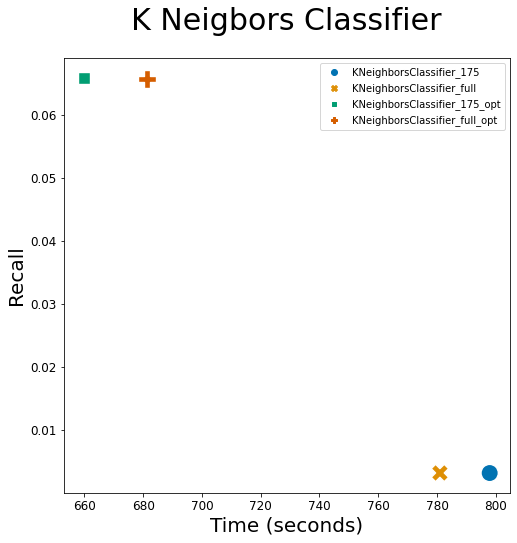

In [436]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = df_resultados_knc_opt, x = df_resultados_knc_opt['TIEMPO'],y = df_resultados_knc_opt['RECALL'], 
                hue = df_resultados_knc_opt.index, style = df_resultados_knc_opt.index, palette = 'colorblind', s = 300) 
plt.xlabel('Time (seconds)', y = -0.8, fontsize = 20)
plt.ylabel('Recall', x = -1, fontsize = 20)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('K Neigbors Classifier', y = 1.05, fontsize = 30)
plt.show()

El modelo K Neighbors Classifier fulldataset con los hiperparámetros optimizados obtiene un mejor resultado que el modelo que utiliza los hiperparámetros default. Es por ello que en la etapa de Model Stacking se utilizarán esos hiperparámetros optimizados. 

<br>

<br>

<br>

<br>


<font size='6' style="color:orange">  <b> Model Stacking </b> </font>
<a name="stacking"></a>

[[ Back to Top ]](#content)

Se realizará stacking de modelos de forma tal que se pueda encontrar un modelo que arroje el mejor resultado, buscando la relación más óptima entre el recall y el tiempo de ejecución del modelo. Para ello se utilizarán tanto modelos optimizados como sin optimizar. 

<br>

In [8]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1 )

<br>

<font size='5' style="color:orange">  <b> GaussianNB x 3</b> </font>
<a name="ensemble_2"></a>

[[ Back to Top ]](#content)

In [12]:
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb_final = GaussianNB()

In [13]:
ensemble_2 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3)], final_estimator = gnb_final)

In [14]:
e2_results    = []
e2_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_2.fit(X_train, y_train)
    
    y_pred = ensemble_2.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e2_results.append(list_results)
    e2_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [15]:
filas    = ['Ensemble GaussianNB x 3 + Final GassianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e2_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB x 3 + Final GassianNB,0.541327,0.561671,0.551273


In [16]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB x 3 + Final GassianNB,0.541327,0.561671,0.551273,137.101123


In [17]:
resultados.to_pickle("resultados_e2.pkl")

In [18]:
resultados_cm= gmean(e2_results_cm)
resultados_cm 

array([[[17033.23701796,   955.79182738],
        [  880.5975707 ,  1128.84563809]]])

In [19]:
with open('resultados_e2_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB x 6</b> </font>
<a name="ensemble_3"></a>

[[ Back to Top ]](#content)

In [20]:
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb_final = GaussianNB()

In [21]:
ensemble_3 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3), 
                                                 ('gnb4',gnb4), ('gnb5',gnb5), ('gnb6',gnb6)], final_estimator = gnb_final)

In [22]:
e3_results    = []
e3_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_3.fit(X_train, y_train)
    
    y_pred = ensemble_3.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e3_results.append(list_results)
    e3_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [23]:
filas    = ['Ensemble GaussianNB x 6 + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e3_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB x 6 + Final GaussianNB,0.51998,0.58331,0.549795


In [24]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB x 6 + Final GaussianNB,0.51998,0.58331,0.549795,276.241724


In [25]:
resultados.to_pickle("resultados_e3.pkl")

In [26]:
resultados_cm= gmean(e3_results_cm)
resultados_cm 

array([[[16907.54416649,  1081.7287435 ],
        [  837.06552723,  1172.33607711]]])

In [27]:
with open('resultados_e3_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB x 12</b> </font>
<a name="ensemble_4"></a>

[[ Back to Top ]](#content)

In [28]:
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()
gnb10 = GaussianNB()
gnb11 = GaussianNB()
gnb12 = GaussianNB()
gnb_final = GaussianNB()

In [29]:
ensemble_4 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3), 
                                                 ('gnb4',gnb4), ('gnb5',gnb5), ('gnb6',gnb6),
                                                 ('gnb7',gnb7), ('gnb8',gnb8), ('gnb9',gnb9), 
                                                 ('gnb10',gnb10), ('gnb11',gnb11), ('gnb12',gnb12)],
                                                 final_estimator = gnb_final)

In [30]:
e4_results    = []
e4_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_4.fit(X_train, y_train)
    
    y_pred = ensemble_4.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e4_results.append(list_results)
    e4_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [31]:
filas    = ['Ensemble GaussianNB x 12 + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e4_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB x 12 + Final GaussianNB,0.508631,0.596489,0.549036


In [32]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB x 12 + Final GaussianNB,0.508631,0.596489,0.549036,534.493685


In [33]:
resultados.to_pickle("resultados_e4.pkl")

In [34]:
resultados_cm= gmean(e4_results_cm)
resultados_cm 

array([[[16831.63950851,  1157.6188637 ],
        [  810.52995485,  1198.82268297]]])

In [35]:
with open('resultados_e4_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB x 24 </b> </font>
<a name="ensemble_5"></a>

[[ Back to Top ]](#content)

In [36]:
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()
gnb10 = GaussianNB()
gnb11 = GaussianNB()
gnb12 = GaussianNB()
gnb13 = GaussianNB()
gnb14 = GaussianNB()
gnb15 = GaussianNB()
gnb16 = GaussianNB()
gnb17 = GaussianNB()
gnb18 = GaussianNB()
gnb19 = GaussianNB()
gnb20 = GaussianNB()
gnb21 = GaussianNB()
gnb22 = GaussianNB()
gnb23 = GaussianNB()
gnb24 = GaussianNB()
gnb_final = GaussianNB()

In [37]:
ensemble_5 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3), ('gnb4',gnb4), ('gnb5',gnb5), 
                                                ('gnb6',gnb6),('gnb7',gnb7), ('gnb8',gnb8), ('gnb9',gnb9), ('gnb10',gnb10), 
                                                ('gnb11',gnb11), ('gnb12',gnb12),('gnb13',gnb13),('gnb14',gnb14), 
                                                ('gnb15',gnb15), ('gnb16',gnb16),('gnb17',gnb17), ('gnb18',gnb18), 
                                                ('gnb19',gnb19), ('gnb20',gnb20), ('gnb21',gnb21), ('gnb22',gnb22),
                                                ('gnb23',gnb23), ('gnb24',gnb24)], final_estimator = gnb_final)

In [38]:
e5_results    = []
e5_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_5.fit(X_train, y_train)
    
    y_pred = ensemble_5.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e5_results.append(list_results)
    e5_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [39]:
filas    = ['Ensemble GaussianNB x 24 + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e5_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB x 24 + Final GaussianNB,0.502216,0.60296,0.547965


In [40]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB x 24 + Final GaussianNB,0.502216,0.60296,0.547965,1013.523686


In [41]:
resultados.to_pickle("resultados_e5.pkl")

In [42]:
resultados_cm = gmean(e5_results_cm)
resultados_cm 

array([[[16788.63481105,  1200.59103611],
        [  797.53005772,  1211.82804684]]])

In [43]:
with open('resultados_e5_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB + Logistic Regression (Final GaussianNB)</b> </font>
<a name="ensemble_6"></a>

[[ Back to Top ]](#content)

In [44]:
gnb = GaussianNB()
lgr = LogisticRegression(max_iter = 7000)
gnb_final = GaussianNB()

In [45]:
ensemble_6 =  StackingClassifier (estimators = [ ('gnb',gnb), ('lgr',lgr)], final_estimator = gnb_final)

In [46]:
e6_results    = []
e6_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_6.fit(X_train, y_train)
    
    y_pred = ensemble_6.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e6_results.append(list_results)
    e6_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [47]:
filas    = ['Ensemble GaussianNB + Logistic Regression + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e6_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB + Logistic Regression + Final GaussianNB,0.541653,0.530205,0.535842


In [48]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB + Logistic Regression + Final GaussianNB,0.541653,0.530205,0.535842,4838.985724


In [49]:
resultados.to_pickle("resultados_e6.pkl")

In [50]:
resultados_cm = gmean(e6_results_cm)
resultados_cm 

array([[[17088.26123245,   901.16013791],
        [  943.77230563,  1065.60619108]]])

In [51]:
with open('resultados_e6_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Logistic Regression + GaussianNB (Final Logistic Regression) </b> </font>
<a name="ensemble_7"></a>

[[ Back to Top ]](#content)

In [52]:
gnb = GaussianNB()
lgr = LogisticRegression(max_iter = 7000)
lgr_final = LogisticRegression(max_iter = 7000)

In [53]:
ensemble_7 =  StackingClassifier (estimators = [ ('gnb',gnb), ('lgr',lgr)], final_estimator = lgr_final)

In [54]:
e7_results    = []
e7_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_7.fit(X_train, y_train)
    
    y_pred = ensemble_7.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e7_results.append(list_results)
    e7_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [55]:
filas    = ['Ensemble GaussianNB + Logistic Regression + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e7_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB + Logistic Regression + Final GaussianNB,0.704308,0.374719,0.489145


In [56]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB + Logistic Regression + Final GaussianNB,0.704308,0.374719,0.489145,4804.446089


In [57]:
resultados.to_pickle("resultados_e7.pkl")

In [78]:
# Renombro el índice ya que por error le había asignado otro nombre
resultados_cb_full = pd.read_pickle('resultados_e7.pkl')
resultados_cb_full.index= ['Ensemble GaussianNB + Logistic Regression + Final Logistic Regression']
resultados_cb_full.to_pickle("resultados_e7.pkl")
resultados_cb_full

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB + Logistic Regression + Final Logistic Regression,0.704308,0.374719,0.489145,4804.446089


In [58]:
resultados_cm= gmean(e7_results_cm)
resultados_cm 

array([[[17673.88954425,   315.69858819],
        [ 1256.38503915,   753.11083107]]])

In [59]:
with open('resultados_e7_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

Para ver cuál de los dos modelos convenía utilizarse como final estimator, se realizaron dos ensambles diferentes. Por un lado uno con los modelos Logistic Regression + GaussianNB con Logistic Regression como final estimator y por el otro un ensamble con los modelos Logistic Regression + GaussianNB con GaussianNB como final estimator. Se puede observar que este útilmo obtuvo un mejor resultado.

<br>

<br>

<font size='5' style="color:orange">  <b> Logistic Regression + Catboost Classifier (Final Catboost Classifier) </b> </font>
<a name="ensemble_8"></a>

[[ Back to Top ]](#content)

In [149]:
lgr = LogisticRegression(max_iter = 7000)
cb = CatBoostClassifier()
cb_final = CatBoostClassifier()

In [150]:
ensemble_8 =  StackingClassifier (estimators = [ ('lgr',lgr), ('cb',cb)], final_estimator = cb_final)


In [ ]:
e8_results    = []
e8_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_8.fit(X_train, y_train)
    
    y_pred = ensemble_8.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e8_results.append(list_results)
    e8_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [132]:
filas    = ['Ensemble Lgr + Catboost (Final Catboost)']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e8_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble Lgr + Catboost (Final Catboost),0.714156,0.392728,0.506712


In [133]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble Lgr + Catboost (Final Catboost),0.714156,0.392728,0.506712,11731.662214


In [134]:
resultados.to_pickle("resultados_e8.pkl")

In [135]:
resultados_cm= gmean(e8_results_cm)
resultados_cm 

array([[[17673.98790785,   315.53104694],
        [ 1220.00911767,   789.30386391]]])

In [136]:
with open('resultados_e8_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Logistic Regression + Catboost Classifier + GaussianNB (Final GaussianNb)</b> </font>
<a name="ensemble_9"></a>

[[ Back to Top ]](#content)

In [152]:
lgr = LogisticRegression(max_iter = 7000)
cb = CatBoostClassifier() 
gnb = GaussianNB()
gnb_final = GaussianNB()

In [154]:
ensemble_9 =  StackingClassifier (estimators = [ ('lgr',lgr), ('cb',cb), ('gnb',gnb)], final_estimator = gnb_final)


In [ ]:
# Cabe aclarar que corrí esta celda pero Catboost Cassifier arroja mucha información sobre su learning rate mientras se 
# procesa que hacían que la notebook fuese más pesada. Es por ello que corte el contenido de la celda que había corrido, 
# pero sin mostrar los resultados parciales del learning rate que va arrojando Catboost Classifier.

e9_results    = []
e9_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_9.fit(X_train, y_train)
    
    y_pred = ensemble_9.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e9_results.append(list_results)
    e9_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [156]:
filas    = ['Ensemble Lgr + Catboost + GaussianNB (Final GaussianNB)']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e9_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble Lgr + Catboost + GaussianNB (Final GaussianNB),0.497075,0.61293,0.548931


In [157]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble Lgr + Catboost + GaussianNB (Final GaussianNB),0.497075,0.61293,0.548931,8581.06651


In [445]:
resultados.to_pickle("resultados_e9.pkl")

In [159]:
resultados_cm= gmean(e9_results_cm)
resultados_cm 

array([[[16743.55451381,  1245.98601968],
        [  777.31861252,  1231.86699111]]])

In [160]:
with open('resultados_e9_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Logistic Regression + Catboost Classifier + GaussianNB + K Neighbors Classifier</b> </font>
<a name="ensemble_10"></a>

[[ Back to Top ]](#content)

In [412]:
lgr = LogisticRegression(max_iter = 7000)
cb = CatBoostClassifier(iterations = 3600, depth = 4, learning_rate = 0.85) # hiperparámetros obtenidos de la notebook de Santiago
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', metric = 'minkowski')
gnb_final = GaussianNB()

In [413]:
ensemble_10 =  StackingClassifier (estimators = [ ('lgr',lgr), ('cb',cb), ('gnb',gnb), ('knc', knc)], final_estimator = gnb_final)

In [ ]:
# Cabe aclarar que corrí esta celda pero Catboost Cassifier arroja mucha información sobre su learning rate mientras se 
# procesa que hacían que la notebook fuese más pesada. Es por ello que corte el contenido de la celda que había corrido, 
# pero sin mostrar los resultados parciales del learning rate que va arrojando Catboost Classifier.

e10_results    = []
e10_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_10.fit(X_train, y_train)
    
    y_pred = ensemble_10.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e10_results.append(list_results)
    e10_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [415]:
filas    = ['Ensemble Opt Lgr + Catboost + GaussianNB + KNC (Final GaussianNB)']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e10_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble Opt Lgr + Catboost + GaussianNB + KNC (Final GaussianNB),0.477716,0.608762,0.535311


In [416]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble Opt Lgr + Catboost + GaussianNB + KNC (Final GaussianNB),0.477716,0.608762,0.535311,18614.442411


In [417]:
resultados.to_pickle("resultados_e10.pkl")

In [418]:
resultados_cm= gmean(e10_results_cm)
resultados_cm 

array([[[16652.24647945,  1337.23284894],
        [  785.75559881,  1223.49053091]]])

In [419]:
with open('resultados_e10_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b>GaussianNB + Logistic Regression + Calibrated Classifier CV (Final GaussianNB)</b> </font>
<a name="ensemble_11"></a>

[[ Back to Top ]](#content)

In [472]:
gnb = GaussianNB()
lgr = LogisticRegression(max_iter = 7000)
cccv = CalibratedClassifierCV(base_estimator = GaussianNB(), cv=3)
gnb_final = GaussianNB()

In [473]:
ensemble_11 =  StackingClassifier (estimators = [ ('gnb',gnb), ('lgr',lgr), ('cccv',cccv)], final_estimator = gnb_final)

In [474]:
e11_results    = []
e11_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_11.fit(X_train, y_train)
    
    y_pred = ensemble_11.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e11_results.append(list_results)
    e11_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [475]:
filas    = ['Ensemble GaussianNB + Lgr + Calibrated Classifier (Final GaussianNB)']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e11_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB + Lgr + Calibrated Classifier (Final GaussianNB),0.508529,0.580394,0.542056


In [476]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB + Lgr + Calibrated Classifier (Final GaussianNB),0.508529,0.580394,0.542056,4851.522139


In [477]:
resultados.to_pickle("resultados_e11.pkl")

In [478]:
resultados_cm= gmean(e11_results_cm)
resultados_cm 

array([[[16862.43371971,  1126.71400253],
        [  842.77999381,  1166.47641845]]])

In [479]:
with open('resultados_e11_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB + Linear Discriminant Analysis (Final GaussianNB)</b> </font>
<a name="ensemble_12"></a>

[[ Back to Top ]](#content)

In [60]:
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
gnb_final = GaussianNB()

In [61]:
ensemble_12 =  StackingClassifier (estimators = [ ('gnb',gnb), ('lda',lda)], final_estimator = gnb_final)

In [62]:
e12_results    = []
e12_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_12.fit(X_train, y_train)
    
    y_pred = ensemble_12.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e12_results.append(list_results)
    e12_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [63]:
filas    = ['Ensemble GaussianNB + Linear Discriminant Analysis + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e12_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB + Linear Discriminant Analysis + Final GaussianNB,0.540601,0.531153,0.535813


In [64]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB + Linear Discriminant Analysis + Final GaussianNB,0.540601,0.531153,0.535813,257.475737


In [65]:
resultados.to_pickle("resultados_e12.pkl")

In [66]:
resultados_cm= gmean(e12_results_cm)
resultados_cm 

array([[[17082.8674622 ,   906.6817171 ],
        [  941.879153  ,  1067.51205715]]])

In [67]:
with open('resultados_e12_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)


<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB + Logistic Regression + Linear Discriminant Analysis (Final GNB)</b> </font>
<a name="ensemble_13"></a>

[[ Back to Top ]](#content)

In [81]:
lda = LinearDiscriminantAnalysis()
lgr = LogisticRegression (max_iter = 7000)
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()
gnb10 = GaussianNB()
gnb11 = GaussianNB()
gnb12 = GaussianNB()
gnb_final = GaussianNB()

In [82]:
ensemble_13 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3),
                                               ('gnb4',gnb4), ('gnb5',gnb5), ('gnb6',gnb6),
                                               ('gnb7',gnb7), ('gnb8',gnb8), ('gnb9',gnb9), 
                                               ('gnb10',gnb10), ('gnb11',gnb11), ('gnb12',gnb12),
                                               ('lda',lda), ('lgr',lgr)], final_estimator = gnb_final)

In [83]:
e13_results    = []
e13_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_13.fit(X_train, y_train)
    
    y_pred = ensemble_13.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e13_results.append(list_results)
    e13_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [84]:
filas    = ['Ensemble GaussianNB + Logistic Regression + Linear Discriminant Analysis + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e13_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB + Logistic Regression + Linear Discriminant Analysis + Final GaussianNB,0.501568,0.599313,0.546071


In [85]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB + Logistic Regression + Linear Discriminant Analysis + Final GaussianNB,0.501568,0.599313,0.546071,5505.319759


In [86]:
resultados.to_pickle("resultados_e13.pkl")

In [87]:
resultados_cm= gmean(e13_results_cm)
resultados_cm 

array([[[16792.84262993,  1196.49645094],
        [  804.79155419,  1204.49950936]]])

In [88]:
with open('resultados_e13_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB + XGBoost Classifier + Logistic Regression (Final GaussianNB)</b> </font>
<a name="ensemble_14"></a>

[[ Back to Top ]](#content)

In [497]:
gnb = GaussianNB()
xgb = XGBClassifier()
lgr = LogisticRegression(max_iter = 7000)
gnb_final = GaussianNB()

In [498]:
ensemble_14 =  StackingClassifier (estimators = [ ('gnb',gnb), ('xgb',xgb), ('lgr',lgr)], final_estimator = gnb_final)

In [499]:
e14_results    = []
e14_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_14.fit(X_train, y_train)
    
    y_pred = ensemble_14.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e14_results.append(list_results)
    e14_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [500]:
filas    = ['Ensemble GaussianNB + Lgr + XGBoost Classifier (Final GaussianNB)']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e14_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB + Lgr + XGBoost Classifier (Final GaussianNB),0.4857,0.6041,0.538443


In [501]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB + Lgr + XGBoost Classifier (Final GaussianNB),0.4857,0.6041,0.538443,11857.672548


In [502]:
resultados.to_pickle("resultados_e14.pkl")

In [503]:
resultados_cm= gmean(e14_results_cm)
resultados_cm 

array([[[16704.35192467,  1285.17677775],
        [  794.96074445,  1214.11998067]]])

In [504]:
with open('resultados_e14_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> GaussianNB X 6 + Linear Discriminant Analysis (Final GaussianNB) </b> </font>
<a name="ensemble_15"></a>

[[ Back to Top ]](#content)

In [68]:
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb_final = GaussianNB()

In [69]:
ensemble_15 =  StackingClassifier (estimators = [ ('lda',lda),('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3), 
                                                 ('gnb4',gnb4), ('gnb5',gnb5), ('gnb6',gnb6)], final_estimator = gnb_final)

In [70]:
e15_results    = []
e15_results_cm = []
tiempo_ejecucion = []
inicio = time.time()

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ensemble_15.fit(X_train, y_train)
    
    y_pred = ensemble_15.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    cm        = confusion_matrix(y_test, y_pred)
    
    list_results   = [precision, recall, f1]
    list_cm = [cm]
    e15_results.append(list_results)
    e15_results_cm.append(list_cm)
    
fin = time.time()
tiempo_ejecucion.append(fin - inicio)

In [71]:
filas    = ['Ensemble GaussianNB X 6 + Linear Discriminant Analysis + Final GaussianNB']
columnas = ["PRECISION", "RECALL", "F1"]
resultados = pd.DataFrame([gmean(e15_results)], columns=columnas, index=filas)
resultados

,PRECISION,RECALL,F1
Ensemble GaussianNB X 6 + Linear Discriminant Analysis + Final GaussianNB,0.511693,0.587918,0.547133


In [72]:
resultados['TIEMPO']= tiempo_ejecucion
resultados

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB X 6 + Linear Discriminant Analysis + Final GaussianNB,0.511693,0.587918,0.547133,457.78031


In [73]:
resultados.to_pickle("resultados_e15.pkl")

In [74]:
resultados_cm= gmean(e15_results_cm)
resultados_cm 

array([[[16862.24544918,  1127.08278639],
        [  827.70149129,  1181.59656847]]])

In [75]:
with open('resultados_e15_cm.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

<br>

<br>

<font size='5' style="color:orange">  <b> Model Stacking - Summary </b> </font>
<a name="summary_stacking"></a>

[[ Back to Top ]](#content)

Se realiza un gráfico que permita comparar el recall y el tiempo de ejecución de cada uno de los modelos con los que se realizó Stacking. A su vez, se incluirán aquellos modelos simples donde se ha obtenido los mejores recall, a un tiempo de ejecución acorde.

In [89]:
# Stacking
resultados_e2 = pd.read_pickle('resultados_e2.pkl')
resultados_e3 = pd.read_pickle('resultados_e3.pkl')
resultados_e4 = pd.read_pickle('resultados_e4.pkl')
resultados_e5 = pd.read_pickle('resultados_e5.pkl')
resultados_e6 = pd.read_pickle('resultados_e6.pkl')
resultados_e7 = pd.read_pickle('resultados_e7.pkl')
resultados_e8 = pd.read_pickle('resultados_e8.pkl')
resultados_e9 = pd.read_pickle('resultados_e9.pkl')
resultados_e10 = pd.read_pickle('resultados_e10.pkl')
resultados_e11 = pd.read_pickle('resultados_e11.pkl')
resultados_e12 = pd.read_pickle('resultados_e12.pkl')
resultados_e13 = pd.read_pickle('resultados_e13.pkl')
resultados_e14 = pd.read_pickle('resultados_e14.pkl')
resultados_e15 = pd.read_pickle('resultados_e15.pkl')

# Models with default parameters
resultados_lgr_full = pd.read_pickle('resultados_lgr_full.pkl')
resultados_gnb_full = pd.read_pickle("resultados_gnb_full.pkl")
resultados_cb_full = pd.read_pickle('resultados_cb_full2.pkl')
resultados_mlpc_full = pd.read_pickle('resultados_mlpc_full.pkl')
resultados_lda_full = pd.read_pickle('resultados_lda_full.pkl')
resultados_cccv_full = pd.read_pickle('resultados_cccv_full.pkl')


In [90]:
df_resultados_finales = pd.concat([resultados_e2,resultados_e3,resultados_e4,resultados_e5,
                        resultados_e6,resultados_e7,resultados_e8, resultados_e9, resultados_e10,
                         resultados_e11,resultados_e12, resultados_e13, resultados_e14, resultados_e15,
                        resultados_lgr_full,resultados_gnb_full, resultados_cb_full, resultados_mlpc_full, resultados_lda_full,resultados_cccv_full ])
df_resultados_finales 

,PRECISION,RECALL,F1,TIEMPO
Ensemble GaussianNB x 3 + Final GassianNB,0.541327,0.561671,0.551273,137.101123
Ensemble GaussianNB x 6 + Final GaussianNB,0.519980,0.583310,0.549795,276.241724
Ensemble GaussianNB x 12 + Final GaussianNB,0.508631,0.596489,0.549036,534.493685
Ensemble GaussianNB x 24 + Final GaussianNB,0.502216,0.602960,0.547965,1013.523686
Ensemble GaussianNB + Logistic Regression + Final GaussianNB,0.541653,0.530205,0.535842,4838.985724
Ensemble GaussianNB + Logistic Regression + Final Logistic Regression,0.704308,0.374719,0.489145,4804.446089
Ensemble Lgr + Catboost (Final Catboost),0.714156,0.392728,0.506712,11731.662214
Ensemble Lgr + Catboost + GaussianNB (Final GaussianNB),0.497075,0.612930,0.548931,8581.066510
Ensemble Opt Lgr + Catboost + GaussianNB + KNC (Final GaussianNB),0.477716,0.608762,0.535311,18614.442411
Ensemble GaussianNB + Lgr + Calibrated Classifier (Final GaussianNB),0.508529,0.580394,0.542056,4851.522139


In [643]:
df_resultados_finales = pd.concat([resultados_e2,resultados_e3,resultados_e4,resultados_e5,
                        resultados_e6,resultados_e7,resultados_e8, resultados_e9, resultados_e10,
                         resultados_e11,resultados_e12, resultados_e13, resultados_e14, resultados_e15,
                        resultados_lgr_full,resultados_gnb_full, resultados_cb_full, resultados_mlpc_full, resultados_lda_full,resultados_cccv_full ])
df_resultados_finales 

,PRECISION,RECALL,F1,TIEMPO
Ensemble Gaussian x4,0.474078,0.599564,0.529461,115.862217
Ensemble Gaussian x7,0.459896,0.614447,0.526031,203.384345
Ensemble Gaussian x13,0.451242,0.623919,0.523695,372.654705
Ensemble Gaussian x25,0.446858,0.629791,0.522764,702.263942
Ensemble Gaussian + Lgr (final GNB),0.488541,0.582881,0.531536,4961.193512
Ensemble Lgr + Gaussian (Final Lgr),0.653212,0.397763,0.494418,9378.001774
Ensemble Lgr + Catboost (Final Catboost),0.714156,0.392728,0.506712,11731.662214
Ensemble Lgr + Catboost + GaussianNB (Final GaussianNB),0.497075,0.612930,0.548931,8581.066510
Ensemble Opt Lgr + Catboost + GaussianNB + KNC (Final GaussianNB),0.477716,0.608762,0.535311,18614.442411
Ensemble GaussianNB + Lgr + Calibrated Classifier (Final GaussianNB),0.508529,0.580394,0.542056,4851.522139


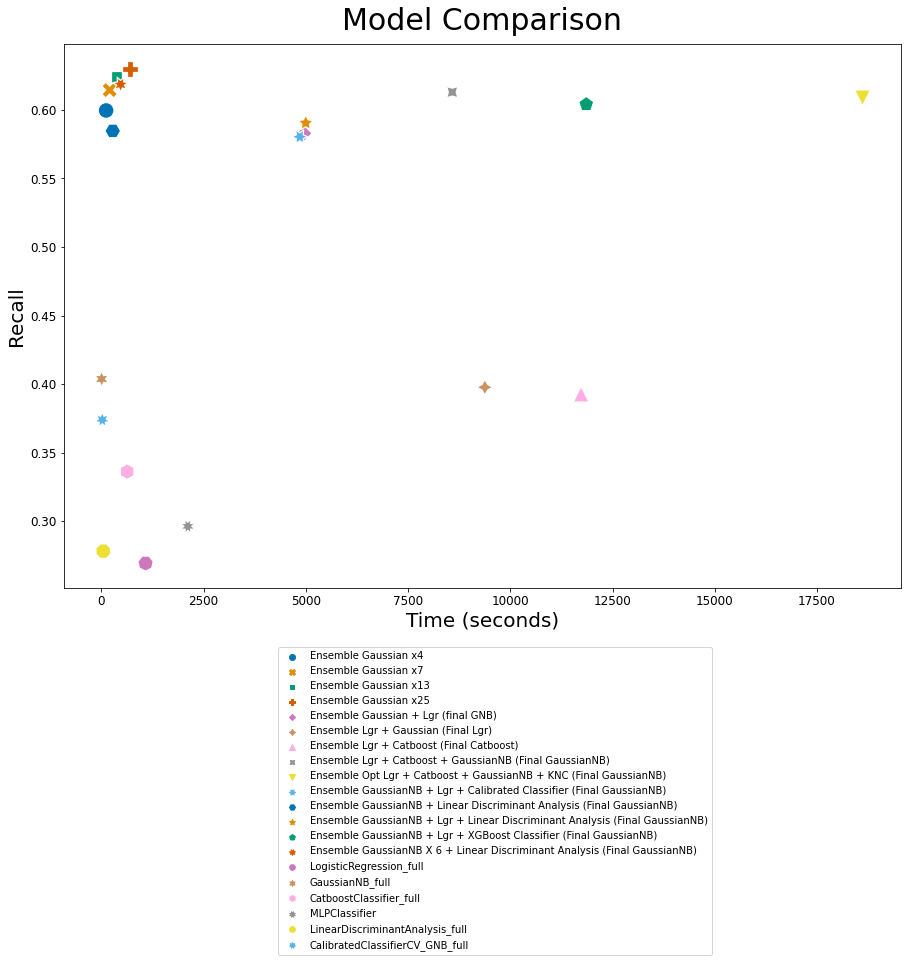

In [644]:
plt.figure(figsize = (15, 10))
ax=sns.scatterplot(data = df_resultados_finales, x = df_resultados_finales['TIEMPO'],y = df_resultados_finales['RECALL'], 
                hue = df_resultados_finales.index, style = df_resultados_finales.index, palette = 'colorblind', s = 250) 
plt.xlabel('Time (seconds)', y = -0.8, fontsize = 20)
plt.ylabel('Recall', x = -1, fontsize = 20)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Model Comparison', y = 1.015, fontsize = 30)
sns.move_legend(ax, "upper left",bbox_to_anchor= (0.25,-0.1))
plt.show()

In [91]:
df_resultados_finales.to_pickle("df_resultados_finales2.pkl")

<br>

<br>